#Introduction to Neural Networks - Rene wind Problem Statement¶

## Problem Statement

Build various classification models, tune them and find the **best one to identify failures** so that the generators can be repaired before failing/breaking to reduce overall maintenance cost.

*Nature of predictions:*

1. True Positives (TP) = Failures correctly predicted by model. Hence this will give repair cost.

2. False Negatives (FN) = Failures not detected by model. Hence the dmaage will be done and it will give replacement cost.

3. False Positives (FP) = Failures that are wrongly detected by model. Hence resulting in unnecessary inspection cost.

In the end, Inspection cost < Repair cost < Replacement cost.


## Data Dictionary


Sensor data split into train and test csv files with 40 predictor variables and 1 target variable.

Target variable 1 - 'failure'
Target variable 0 - 'no failure'

In [1]:
#Installing libraries
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: tensorboard
    Found existing installation: t

#### Importing Libraries

In [2]:
#Import necessary libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Sklearn library imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report, precision_recall_curve

# Time related functions.
import time

#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.initializers import HeNormal, GlorotUniform, RandomNormal
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Set the seed using keras.utils.set_random_seed.
tf.keras.utils.set_random_seed(812)

# To reproduce the same output
tf.config.experimental.enable_op_determinism()

#### Data Overview

In [4]:
#Import the data from drive

from google.colab import drive
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intro_NN_Renewind/Train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intro_NN_Renewind/Test.csv')

In [5]:
# Make a copy of the dataset
df_temp = train_df.copy()

In [6]:
#View a glimpse of the Training and Testing dataset

print(train_df.head())
print(test_df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -4.464606 -4.679129  3.101546  0.506130 -0.221083 -2.032511 -2.910870   
1  3.365912  3.653381  0.909671 -1.367528  0.332016  2.358938  0.732600   
2 -3.831843 -5.824444  0.634031 -2.418815 -1.773827  1.016824 -2.098941   
3  1.618098  1.888342  7.046143 -1.147285  0.083080 -1.529780  0.207309   
4 -0.111440  3.872488 -3.758361 -2.982897  3.792714  0.544960  0.205433   

         V8        V9       V10  ...       V32       V33        V34       V35  \
0  0.050714 -1.522351  3.761892  ...  3.059700 -1.690440   2.846296  2.235198   
1 -4.332135  0.565695 -0.101080  ... -1.795474  3.032780  -2.467514  1.894599   
2 -3.173204 -2.081860  5.392621  ... -0.257101  0.803550   4.086219  2.292138   
3 -2.493629  0.344926  2.118578  ... -3.584425 -2.577474   1.363769  0.622714   
4  4.848994 -1.854920 -6.220023  ...  8.265896  6.629213 -10.068689  1.222987   

        V36       V37       V38       V39       V40  Target  


In [7]:
#View the shape of Training and Testing dataset

print(train_df.shape)
print(test_df.shape)

(20000, 41)
(5000, 41)


In [8]:
# View the datatypes of columns in Training and Testing dataset

print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [9]:
#checking for duplicate values in both Training and Testing dataset

print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

0
0


In [10]:
#Checking for missing values in both Training and Testing dataset

print(train_df.isnull().sum())
print(test_df.isnull().sum())

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64
V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       

In [11]:
#View the rows with missing values in column V1

train_df.loc[train_df['V1'].isnull() == True]

V1        V2        V3        V4        V5        V6        V7  \
89    NaN -3.961403  2.787804 -4.712526 -3.007329 -1.541245 -0.881148   
5941  NaN  1.008391  1.227702  5.397082  0.064230 -2.706919 -2.028368   
6317  NaN -5.205346  1.997652 -3.707913 -1.042200 -1.593126 -2.653309   
6464  NaN  2.146202  5.004415  4.192063  1.427887 -6.438263 -0.931339   
7073  NaN  2.534010  2.762821 -1.673718 -1.942214 -0.029961  0.911323   
8431  NaN -1.398710 -2.008106 -1.750341  0.932279 -1.290327 -0.270476   
8439  NaN -3.840585  0.197220  4.147789  1.151400 -0.993298 -4.732363   
11156 NaN -0.666978  3.715829  4.934000  1.667596 -4.356097 -2.823137   
11287 NaN -2.561519 -0.180836 -7.194814 -1.043832  1.384845  1.306093   
11456 NaN  1.299595  4.382858  1.583219 -0.076564  0.658770 -1.638530   
12221 NaN -2.326319 -0.051978  0.615063 -0.895755 -2.437003  0.349826   
12447 NaN  0.752613 -0.271099  1.301204  2.038697 -1.485203 -0.411939   
13086 NaN  2.056243  3.330642  2.741497  2.783166 -0.444191 -2.015376   
13411 NaN  2.704511  4.587169  1.867930  2.050133 -0.925076 -1.669496   
14202 NaN  7.038653  2.144536 -3.201788  4.112972  3.375972 -1.337179   
15520 NaN  1.382556  3.236896 -3.818363 -1.917264  0.437686  1.347540   
16576 NaN  3.933815 -0.761930  2.651889  1.753614 -0.554092  1.829107   
18104 NaN  1.492173  2.659206  0.222784 -0.303648 -1.347322  0.044309   

             V8        V9       V10  ...       V32       V33        V34  \
89     1.476656  0.574700 -1.100884  ... -8.326069 -5.140552   1.121314   
5941   0.534046  3.006797 -2.362238  ...  1.869502 -3.115298  -0.550197   
6317   0.852280 -1.310489  2.406924  ...  3.074149 -0.067649  -0.277521   
6464   3.794120 -0.683032 -0.738941  ...  5.231472 -5.113312   1.745687   
7073  -3.199743  2.948610 -0.413229  ... -4.887077 -2.611526  -1.500807   
8431   4.458834 -2.776270 -1.211766  ...  4.560244 -0.420834  -2.037313   
8439   0.558966 -0.926683  0.457914  ...  6.818725  3.451213   0.241818   
11156  0.373175 -0.709951  2.177428  ...  6.663446 -2.897697   3.068461   
11287  1.559192 -2.992173  1.274543  ... -2.531655  0.560392  -1.153884   
11456 -4.814763 -0.914819  2.811808  ...  1.772287  5.755242   1.203739   
12221  2.092611 -2.933523  2.291272  ...  0.134995 -5.183424   5.251667   
12447  0.980629  0.810336 -0.065120  ...  4.410397 -2.208567  -1.358706   
13086 -0.887154 -1.110920  0.025289  ...  5.112126  4.675408  -1.709632   
13411 -1.653803 -0.243383 -0.317316  ...  2.527207  3.625279  -1.200200   
14202 -4.546371  1.941427 -5.466593  ...  0.157778  9.768106 -10.258190   
15520 -2.036067  1.155712  0.306502  ... -5.414599 -0.896510  -1.057864   
16576 -0.105409 -3.737081  1.036776  ...  3.486408  1.028094   2.845747   
18104 -0.159095  1.108116 -0.572670  ... -1.007343 -2.229579  -0.870845   

            V35       V36       V37       V38       V39       V40  Target  
89    -0.305907  5.315007  3.750044 -5.631174  2.372485  2.195956       0  
5941   1.713781 -2.256960  0.410992 -3.434400 -1.299388 -1.768734       0  
6317   3.196840  7.016205  1.302334 -4.580096  2.956254 -2.363150       0  
6464   2.587189  3.990777  0.610716 -4.273457  1.864568 -3.599079       0  
7073   2.036186 -0.828979 -1.369591  0.572366 -0.132183 -0.322007       0  
8431   1.109793  1.520594  2.113872 -2.252571 -0.939249  2.542411       0  
8439   3.215765  1.203210  1.274857 -1.921229  0.578890 -2.837521       0  
11156  2.486862  4.808548  0.069305 -1.215784  3.013674 -5.972586       0  
11287 -0.019205  4.065248  0.978880 -0.571288  0.630374  3.919467       0  
11456  5.663939  0.413630 -2.643934  5.529745  2.104536 -4.945350       0  
12221  0.716371  3.210930  1.641985  1.543559  1.805163 -2.039510       0  
12447 -1.725697  1.679060 -0.208564 -2.335547  0.112248 -0.542931       0  
13086  2.429762  0.996644 -1.190509  1.207054  0.511023 -0.884200       0  
13411  2.328028  1.666937 -0.943228  0.946846  1.655145 -1.665439       0  
14202  0.513864 -1.974958 -0.029436  3.127486  0.0094

In [12]:
#To view rows with missing values in column V2

train_df.loc[train_df['V2'].isnull() == True]

V1  V2        V3        V4        V5        V6        V7  \
613   -2.048681 NaN -1.623885 -3.324224  0.152256  0.600157 -1.812802   
2236  -3.760658 NaN  0.194954 -1.637958  1.261479 -1.573947 -3.685700   
2508  -1.430888 NaN  0.659576 -2.876402  1.150137 -0.785760 -1.560174   
4653   5.465769 NaN  4.540947 -2.916550  0.399752  2.798925  0.029477   
6810  -2.631454 NaN  2.330188  1.090080  0.603973 -1.139383 -0.690121   
7788  -4.203459 NaN  2.953868  0.584466  4.103940 -0.639211 -2.810799   
8483  -4.484232 NaN  1.200644 -2.042064  2.779443 -0.801748 -5.403548   
8894   3.263555 NaN  8.446574 -3.253218 -3.417978 -2.995838 -0.669271   
8947  -3.793170 NaN  0.719610  2.306296  0.934728 -0.984321  0.504867   
9362   2.662045 NaN  2.980068  4.430762 -0.237769  0.671919  0.380068   
9425  -2.354134 NaN  2.053893  0.811660  2.540366 -0.924875 -0.208380   
9848  -1.763501 NaN  2.845012 -2.753083 -0.811848 -0.101166 -1.382141   
11637 -2.270541 NaN  1.710061  1.157522 -0.355177 -5.449480 -0.786321   
12339 -1.663687 NaN -0.712286 -4.346935  1.391670 -0.093951 -2.163175   
15913  0.768122 NaN  5.296110  0.043018 -1.173729 -2.248575  0.956395   
18342 -0.928572 NaN  2.375506 -1.236914  3.228744 -2.100088 -2.189908   
18343 -2.377369 NaN -0.009173 -1.471979  1.295482  0.724894 -1.122797   
18907 -0.119181 NaN  3.657612 -1.231802  1.946873 -0.119089  0.652414   

             V8        V9       V10  ...        V32       V33       V34  \
613    0.852194 -1.522600  0.211071  ...   3.264218  2.379064 -2.457084   
2236   1.575651 -0.309823 -0.137656  ...   7.620821  1.695061 -3.956354   
2508   2.898635 -2.346989 -0.217607  ...   6.279266  3.323914 -4.047760   
4653  -7.334071  1.122874  1.695269  ...  -1.535753  4.596212 -4.103525   
6810  -1.358935  0.355568 -1.189176  ...  -0.950215  0.209717  0.448728   
7788  -0.112492 -1.362768 -0.800101  ...  12.522374  9.502488 -7.152953   
8483  -1.225314  1.485831 -0.974382  ...   9.467401  4.281421 -7.588117   
8894  -0.161283 -0.666870  3.133527  ...  -4.242730 -3.122680  2.522415   
8947  -0.441008 -2.767177  1.734671  ...   1.527720 -0.496910  3.789736   
9362  -7.646684  4.434754 -0.746393  ...  -5.493590 -1.104656  1.224987   
9425  -0.562864 -0.140210 -2.146916  ...  -0.621103 -0.896509 -1.181480   
9848  -1.105042 -0.054339  0.159742  ...  -2.158880  1.859682 -0.337278   
11637  3.936176 -1.576138  0.800881  ...   2.651480 -8.429332  3.511387   
12339 -0.380573  0.031191 -0.658845  ...   0.306588 -2.690990 -3.111879   
15913 -0.089941 -0.241678 -1.061413  ...  -7.720265 -4.518617  3.182253   
18342  0.588644  1.955973 -5.008491  ...   1.613181 -1.820569 -6.664808   
18343 -3.190475  3.250575 -4.861648  ...  -5.093149  0.439355 -3.167241   
18907 -1.490208 -0.033631 -2.556604  ...  -4.670353 -0.593916 -1.650592   

            V35       V36       V37       V38       V39       V40  Target  
613    1.719365  2.537010  1.701780 -1.434535  0.597365  0.739238       0  
2236   2.707644  4.657387  1.619307 -5.537285  1.246650 -1.162793       0  
2508   3.119220  3.336260  0.603524 -3.781725 -0.157478  1.503298       0  
4653   4.295524  0.152672 -3.726700  6.562692  0.706452 -0.461696       0  
6810   1.046063  0.536937  0.763187  1.728621  1.885821 -1.701774       0  
7788   5.668769  1.249833 -2.158520 -0.954461 -0.002385 -1.546808       0  
8483   3.266825  5.232311  1.278590 -5.370513  1.984130 -1.643391       0  
8894   5.283805  7.291310 -0.867555 -4.315230  3.124488 -2.393239       0  
8947   1.130689  0.618278 -0.111146  5.708912  1.542366 -2.481019       0  
9362   0.975596 -4.794411 -2.269039  7.670648  0.824983 -3.929104       0  
9425  -1.236617  1.237120  1.228277  2.073727  1.223874  1.472175       0  
9848   1.509300  3.408411  0.922594 -1.502959  2.514666 -0.793574       0  
11637  1.500102  5.552380  2.588580 -3.453418  2.324339 -2.760081       0  
12339 -1.596402  5.821108  3.462033 -1.736752  2.291092  2.240769       0  
15913  0.453452  2.175494  1.261707  0.892630  2.026732  0.

In [13]:
#since the rows where values are missing are in random order and also the total number of rows where data is missing = 36 which is 0.18 % of total rows (20,000). hence drop the rows that have missing data in column V1 and V2

train_df = train_df.dropna(subset=['V1','V2'])
train_df.isnull().sum()
train_df.shape

(19964, 41)

In [14]:
#since the rows where values are missing are in random order and also the total number of rows where data is missing = 11 which is 0.22 % of total rows (5,000).
#hence drop the rows that have missing data in column V1 and V2 in testing dataset

test_df = test_df.dropna(subset=['V1','V2'])
test_df.isnull().sum()
test_df.shape

(4989, 41)

In [15]:
#To get a statistical summary of the dataset

train_df.describe().T

count      mean       std        min       25%       50%       75%  \
V1      19964.0 -0.271156  3.442155 -11.876451 -2.737380 -0.746118  1.841050   
V2      19964.0  0.440507  3.150895 -12.319951 -1.640580  0.470788  2.544489   
V3      19964.0  2.485454  3.390736 -10.708139  0.207329  2.255786  4.569975   
V4      19964.0 -0.082647  3.432260 -15.082052 -2.345815 -0.135241  2.130757   
V5      19964.0 -0.055028  2.105122  -8.603361 -1.537210 -0.103365  1.339176   
V6      19964.0 -0.995463  2.041211 -10.227147 -2.347919 -1.000852  0.380444   
V7      19964.0 -0.879029  1.761840  -7.949681 -2.031207 -0.917179  0.223695   
V8      19964.0 -0.548384  3.296765 -15.657561 -2.647433 -0.390276  1.726303   
V9      19964.0 -0.016578  2.161033  -8.596313 -1.495193 -0.066895  1.409579   
V10     19964.0 -0.012416  2.193498  -9.853957 -1.412478  0.102264  1.477754   
V11     19964.0 -1.894280  3.124513 -14.832058 -3.922404 -1.920594  0.119336   
V12     19964.0  1.603980  2.930702 -12.948007 -0.396660  1.507160  3.571182   
V13     19964.0  1.580054  2.875043 -13.228247 -0.224047  1.636446  3.459854   
V14     19964.0 -0.950604  1.789884  -7.738593 -2.170457 -0.957426  0.270452   
V15     19964.0 -2.413627  3.355168 -16.416606 -4.413297 -2.382285 -0.358942   
V16     19964.0 -2.925148  4.223953 -20.374158 -5.638282 -2.683801 -0.092976   
V17     19964.0 -0.134968  3.345533 -14.091184 -2.215393 -0.015050  2.066289   
V18     19964.0  1.187689  2.592117 -11.643994 -0.405252  0.881894  2.569720   
V19     19964.0  1.183252  3.396921 -13.491784 -1.047863  1.281276  3.492482   
V20     19964.0  0.023871  3.669621 -13.922659 -2.433116  0.033415  2.513245   
V21     19964.0 -3.611479  3.569582 -17.956231 -5.932277 -3.532459 -1.265252   
V22     19964.0  0.951407  1.651725 -10.122095 -0.118339  0.974687  2.025396   
V23     19964.0 -0.367829  4.032946 -14.866128 -3.102770 -0.263199  2.450676   
V24     19964.0  1.133309  3.912658 -16.387147 -1.468354  0.965578  3.544004   
V25     19964.0 -0.001582  2.017157  -8.228266 -1.364949  0.026305  1.397890   
V26     19964.0  1.873105  3.434893 -11.834271 -0.337863  1.950531  4.128337   
V27     19964.0 -0.610981  4.369482 -14.904939 -3.650416 -0.878398  2.189664   
V28     19964.0 -0.882974  1.917511  -9.269489 -2.170332 -0.891073  0.375977   
V29     19964.0 -0.985055  2.684795 -12.579469 -2.787329 -1.177999  0.629773   
V30     19964.0 -0.015346  3.006321 -14.796047 -1.866374  0.184650  2.037034   
V31     19964.0  0.486920  3.462907 -13.722760 -1.818319  0.491126  2.731102   
V32     19964.0  0.302523  5.501439 -19.876502 -3.421328  0.049207  3.760799   
V33     19964.0  0.049735  3.574591 -16.898353 -2.242489 -0.064830  2.254949   
V34     19964.0 -0.461671  3.183388 -17.985094 -2.136799 -0.253433  1.437620   
V35     19964.0  2.230852  2.938409 -15.349803  0.336096  2.101516  4.068591   
V36     19964.0  1.513850  3.802518 -14.833178 -0.948662  1.566526  3.983750   
V37     19964.0  0.010491  1.788173  -5.478350 -1.257895 -0.130650  1.173907   
V38     19964.0 -0.344184  3.948539 -17.375002 -2.987116 -0.315217  2.280863   
V39     19964.0  0.890116  1.753959  -6.438880 -0.273597  0.919204  2.057540   
V40     19964.0 -0.876240  3.013024 -11.023935 -2.943705 -0.921977  1.119780   
Target  19964.0  0.055600  0.229154   0.000000  0.000000  0.000000  0.000000   

              max  
V1      15.493002  
V2      13.089269  
V3      17.090919  
V4      13.236381  
V5       8.133797  
V6       6.975847  
V7       8.006091  
V8      11.679495  
V9       8.137580  
V10      8.108472  
V11     11.826433  
V12     15.080698  
V13     15.419616  
V14      5.670664  
V15     12.246455  
V16     13.583212  
V17     16.756432  
V18     13.179863  
V19     13.237742  
V20     16.052339  
V21     13.840473  
V22      7.409856  
V23     14.458734  
V24     17.163291  
V25      8.223389  
V26     16.836410  
V27     17.560404  
V28      6.527643  
V29     10.722055  
V30     12.505812  
V31     17.255090  
V32     2

In [16]:
# Check for class distribution of the target variable by looking at the count of observations for each class in Training Dataset

class_distribution = train_df['Target'].value_counts(normalize=True) * 100
print(class_distribution)

Target
0    94.439992
1     5.560008
Name: proportion, dtype: float64


In [17]:
# Check for class distribution of the target variable by looking at the count of observations for each class in Testing Dataset

class_distribution = test_df['Target'].value_counts(normalize=True) * 100
print(class_distribution)

Target
0    94.347565
1     5.652435
Name: proportion, dtype: float64


**Observations:**

*Dataset Size:*

1.   The training set contains 20,000 observations, each with 41 columns (40 predictors and 1 target variable).
2.   The test set includes 5,000 observations, also with 41 columns (40 predictors and 1 target variable).

*Data Types:*

1.   Both datasets primarily consist of numerical features (float64), with the target variable being an integer (int64).

*Missing Values:*

1.   In the training set, two variables (V1 and V2) have 18 missing values each.
2.   In the test set, V1 has 5 missing values, and V2 has 6 missing values.
3.   No missing values are present in the target variable of both datasets.
4.   Since the rows where values are missing are in random order and also the total number of rows where data is missing = 36 which is 0.18 % of total rows (20,000). Hence dropped the rows that have missing data in column V1 and V2 in Traning dataset.

*Data Integrity:*

1.   There are no duplicate rows in either the training or the test dataset,indicating good data integrity.

*Class Imbalance:*

Both training and testing target variables have imbalanced distribution of the target variables classes where:

1.   About 94% of the observations belong to the negative class (0), which represents "Non-failure" cases.
2.   About 5% of the observations belong to the positive class (1), representing "Failure" cases.

#### EDA - Univariate Analysis

In [18]:
#define a function to plot the boxplot and histogram for all numerical columns

def histogram_boxplot(data, feature, figsize=(15,10), kde =True):
  fig,(axis_box,axis_hist) = plt.subplots(nrows=2,sharex=True,gridspec_kw={'height_ratios':(0.25,0.75)},figsize=figsize)
  #creating 2 subplots
  sns.boxplot(data=data,x=feature,ax=axis_box,showmeans=True,color='violet')
  sns.histplot(data=data,x=feature,kde=kde,ax=axis_hist,color='red')
  axis_hist.axvline(data[feature].mean(),color='green',linestyle='dotted')
  axis_hist.axvline(data[feature].median(),color='black',linestyle='dashed')

In [19]:
#Create the plots for all the independant columns

for col in train_df.columns:
  if col != 'Target':
    histogram_boxplot(train_df,col)


Output hidden; open in https://colab.research.google.com to view.

In [20]:
#Code to explain the skewness of the data in detail
from scipy.stats import skew

# Skewness
skewness = train_df.apply(skew)
for column in train_df.columns[:-1]:  # Exclude target column
    skew_val = skewness[column]
    if skew_val < -1:
        skew_type = "highly negatively skewed"
    elif -1 <= skew_val < -0.5:
        skew_type = "moderately negatively skewed"
    elif -0.5 <= skew_val < 0.5:
        skew_type = "approximately symmetric"
    elif 0.5 <= skew_val < 1:
        skew_type = "moderately positively skewed"
    else:
        skew_type = "highly positively skewed"

    print(f'The distribution of {column} is {skew_type} with a skewness of {skew_val:.2f}.')

The distribution of V1 is moderately positively skewed with a skewness of 0.54.
The distribution of V2 is approximately symmetric with a skewness of -0.04.
The distribution of V3 is approximately symmetric with a skewness of 0.32.
The distribution of V4 is approximately symmetric with a skewness of 0.10.
The distribution of V5 is approximately symmetric with a skewness of 0.13.
The distribution of V6 is approximately symmetric with a skewness of -0.03.
The distribution of V7 is approximately symmetric with a skewness of 0.18.
The distribution of V8 is approximately symmetric with a skewness of -0.26.
The distribution of V9 is approximately symmetric with a skewness of 0.10.
The distribution of V10 is approximately symmetric with a skewness of -0.25.
The distribution of V11 is approximately symmetric with a skewness of 0.04.
The distribution of V12 is approximately symmetric with a skewness of 0.09.
The distribution of V13 is approximately symmetric with a skewness of -0.18.
The distrib

**Observations:**

*Independent variables:*

The histograms indicate that the data for these variables is approximately normally distributed with mean and median fairly close for most, further suggesting a normal distribution.
The boxplots show dots outside of the whiskers, which represent outliers. These are observations that fall significantly higher or lower than the majority of the data.

#### EDA - Bivariate Analysis

<Axes: >

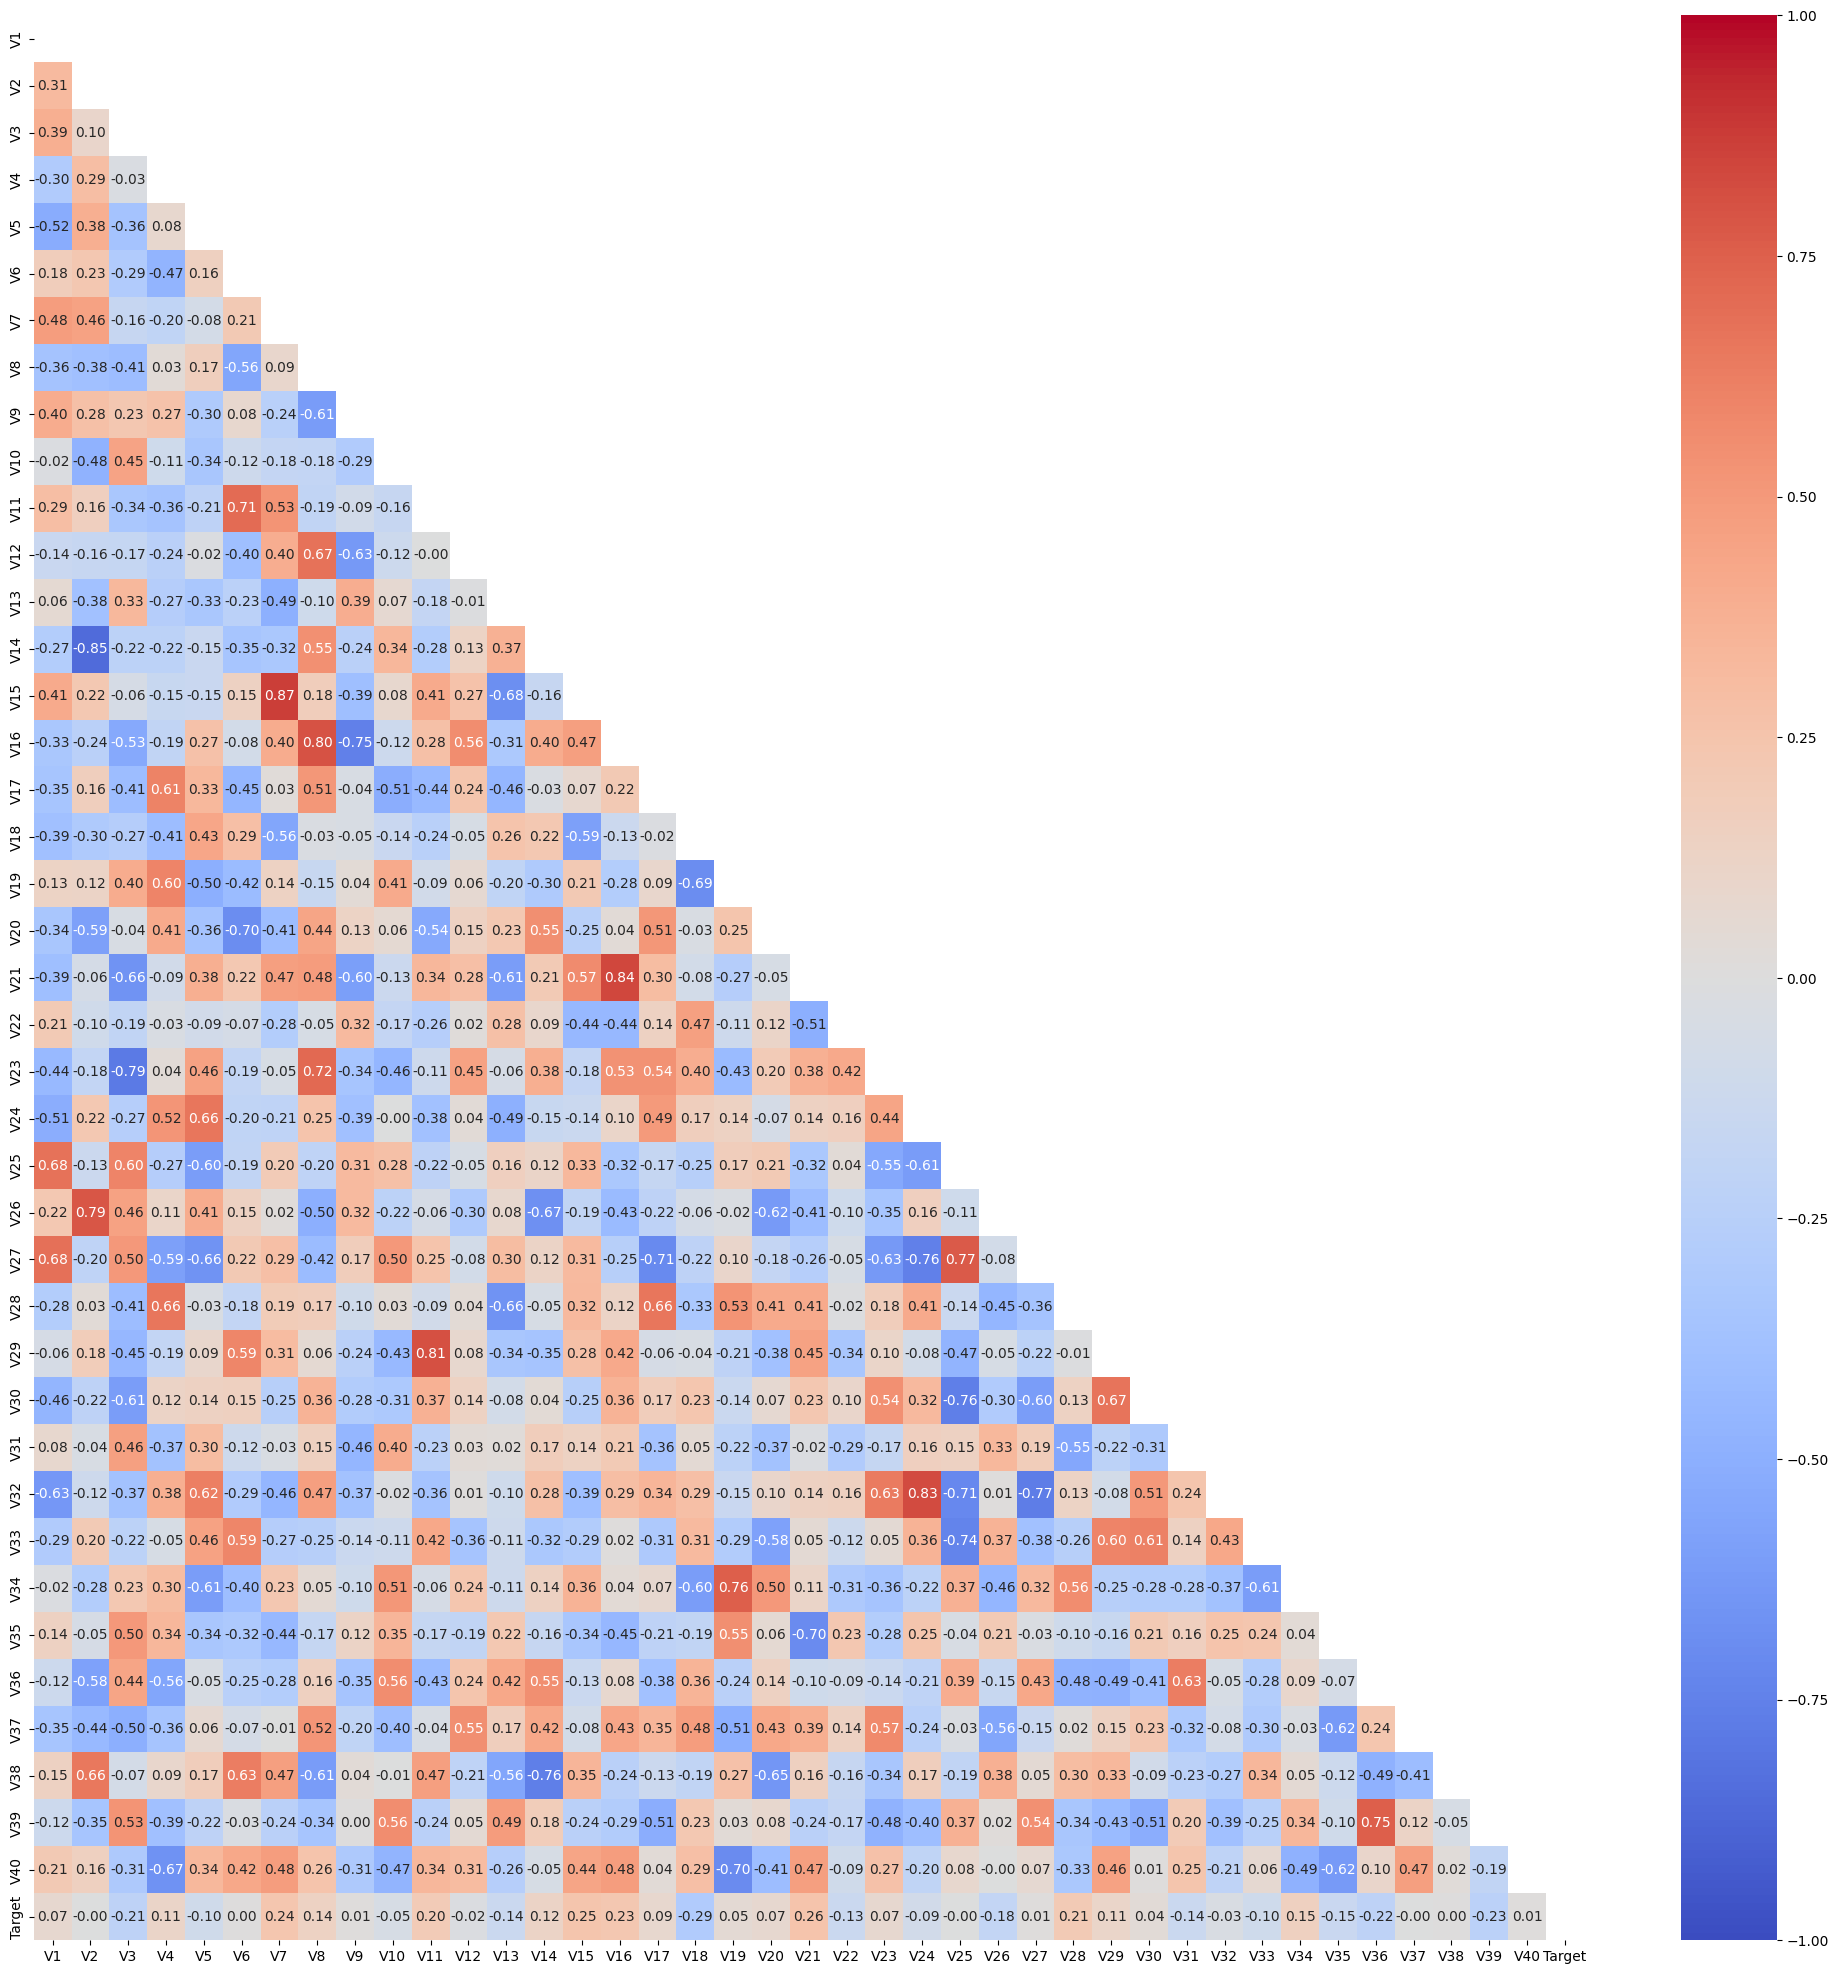

In [21]:
# Heatmap to visualise the correlation of numerical variables

plt.figure(figsize=(25,25))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(train_df.corr(), dtype=bool))
sns.heatmap(train_df.corr(),mask=mask,annot=True,cmap='coolwarm',vmax=1,vmin=-1,fmt=".2f")

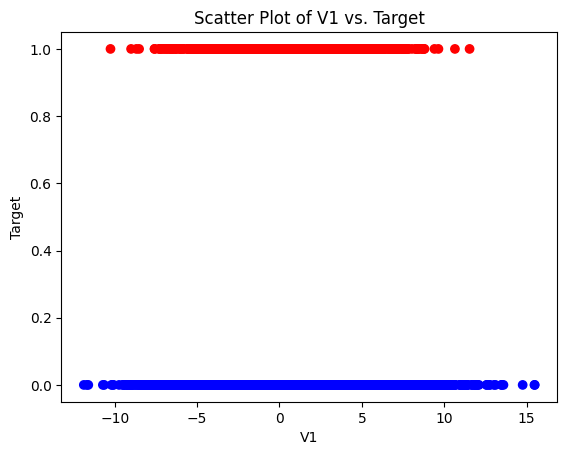

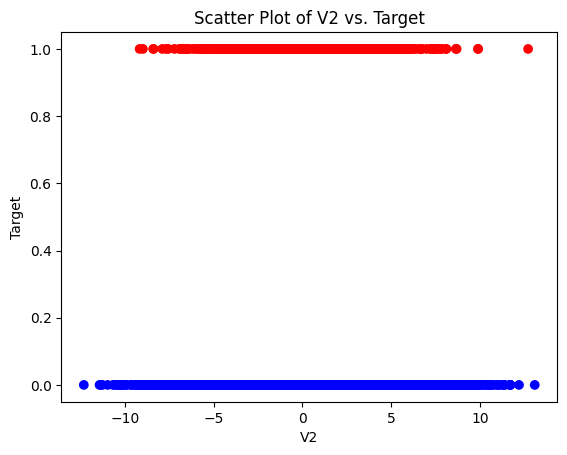

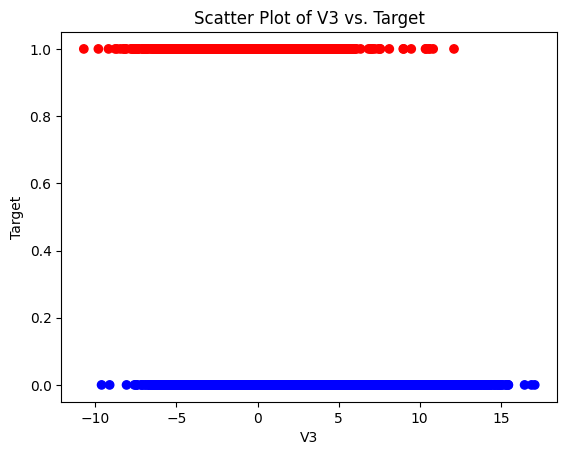

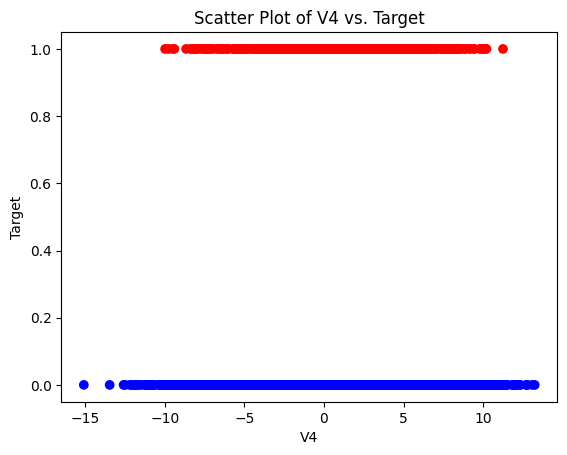

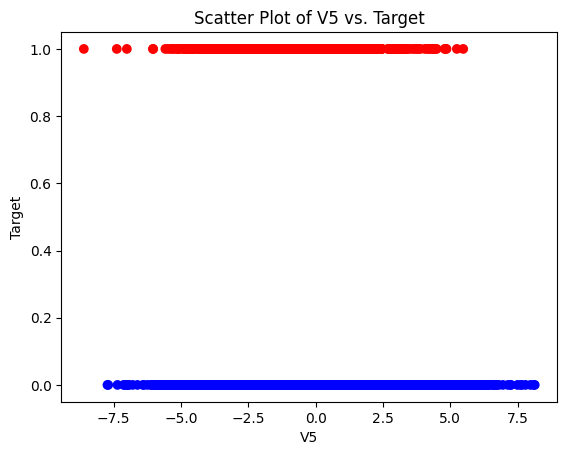

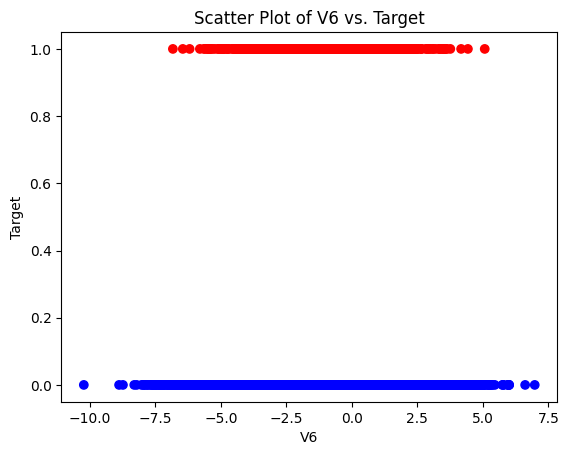

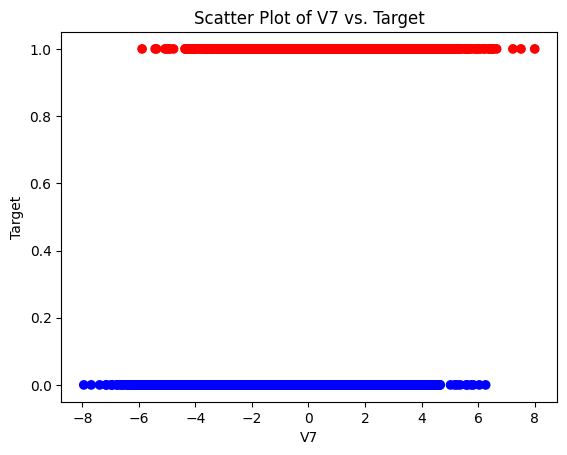

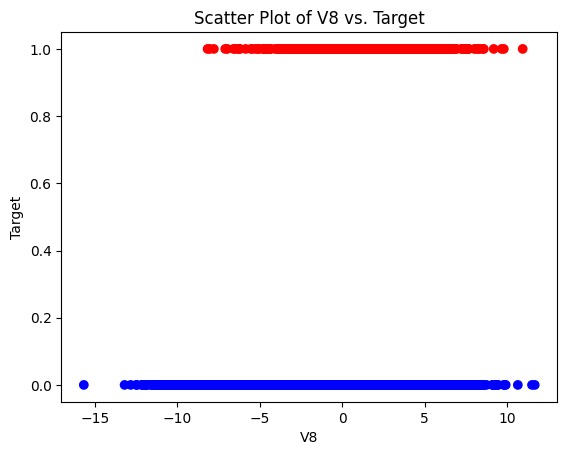

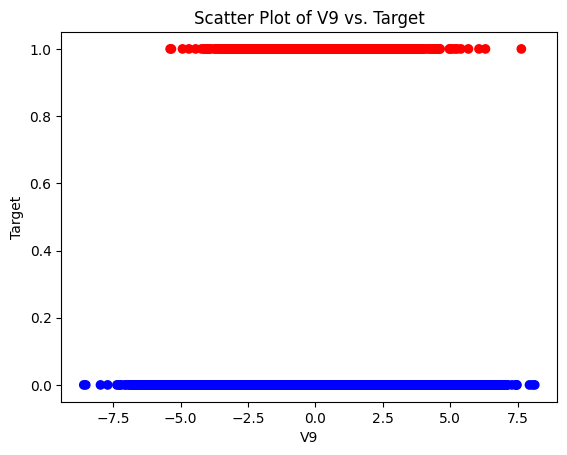

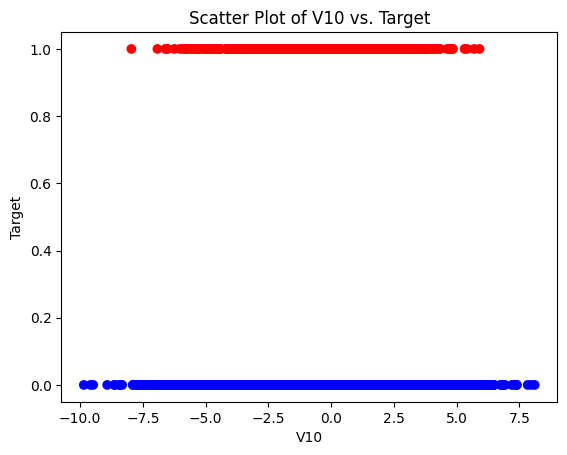

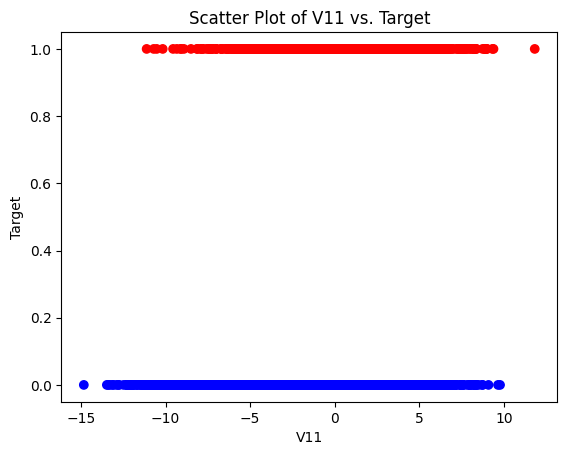

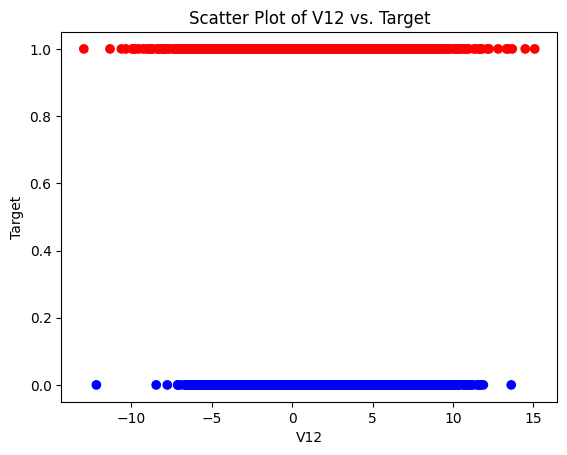

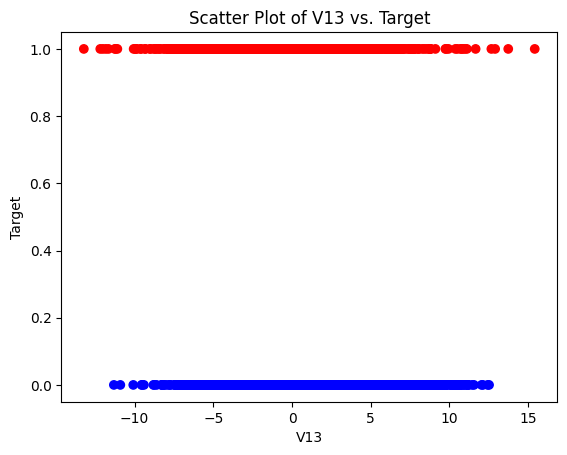

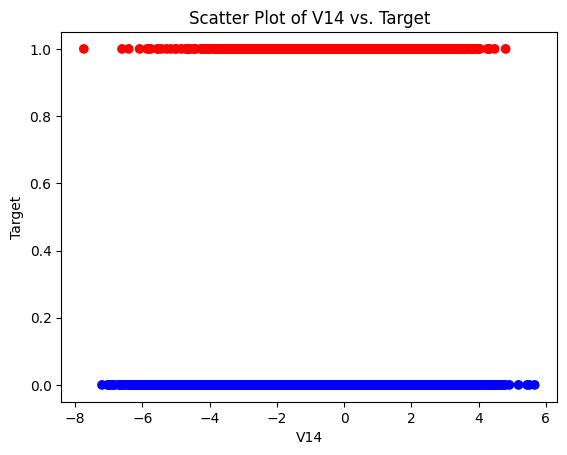

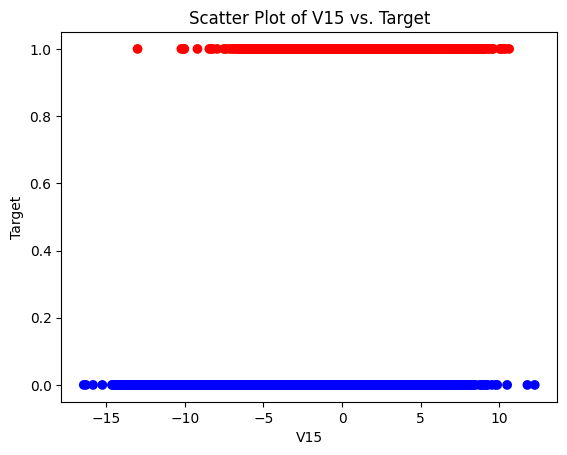

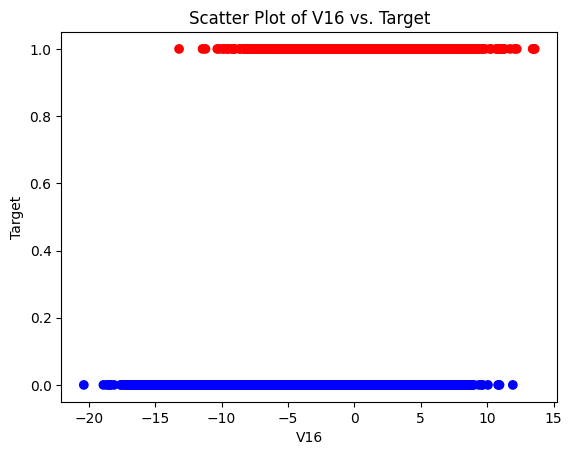

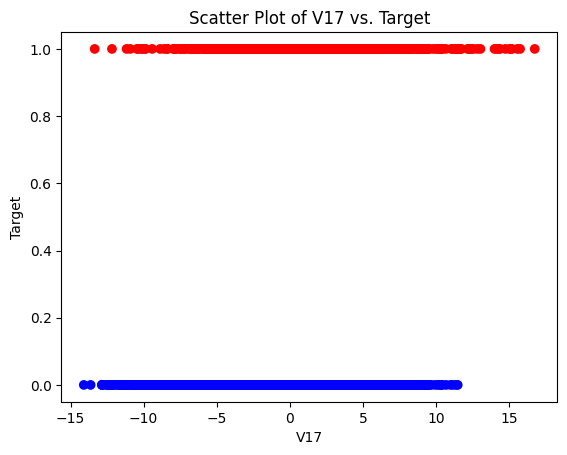

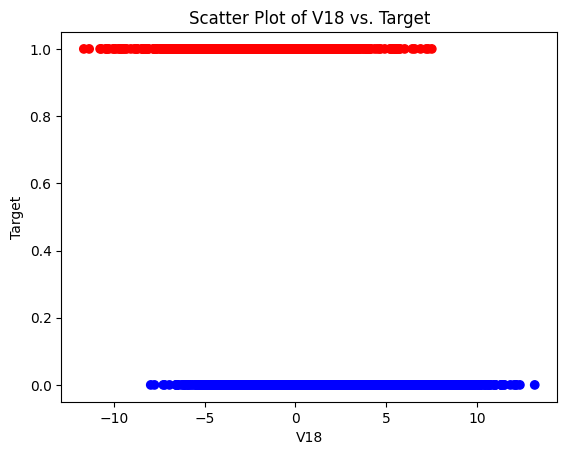

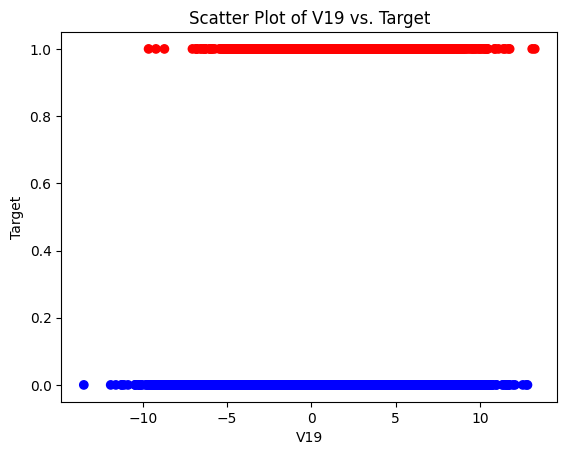

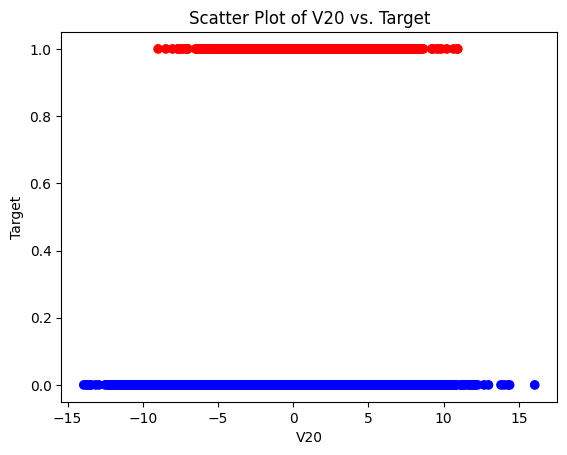

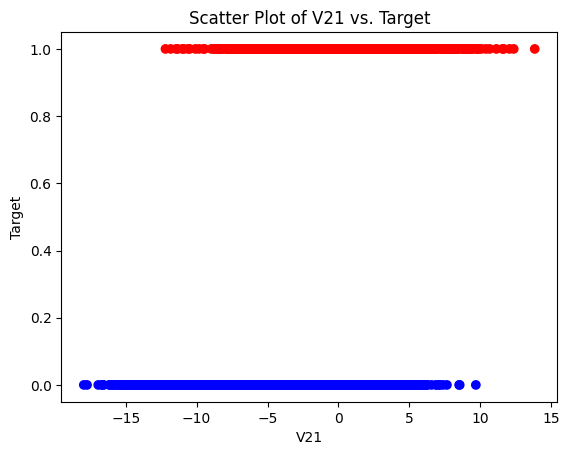

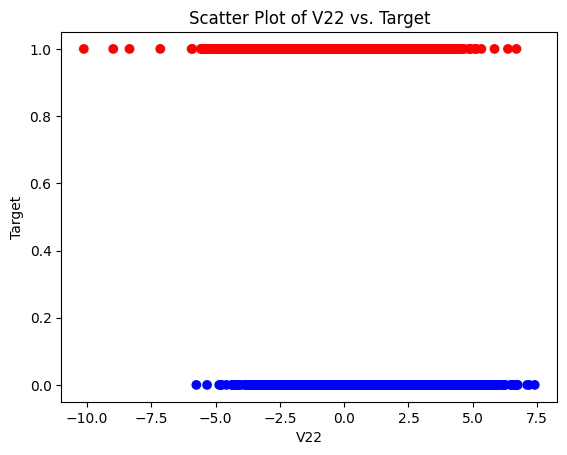

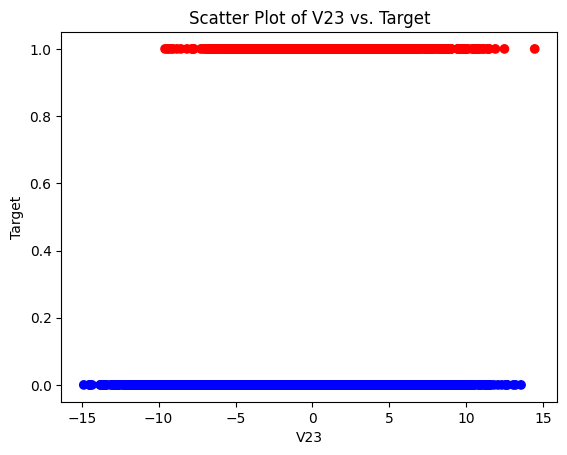

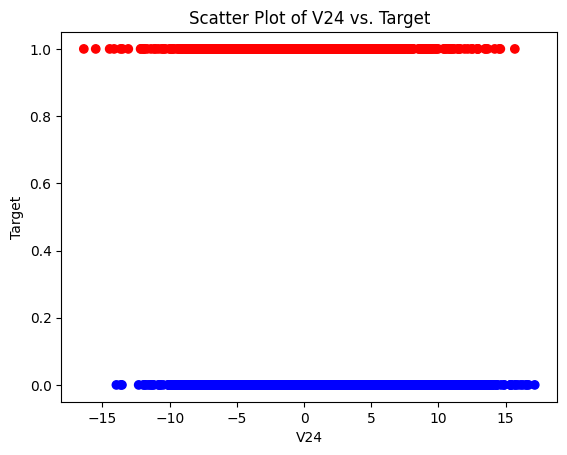

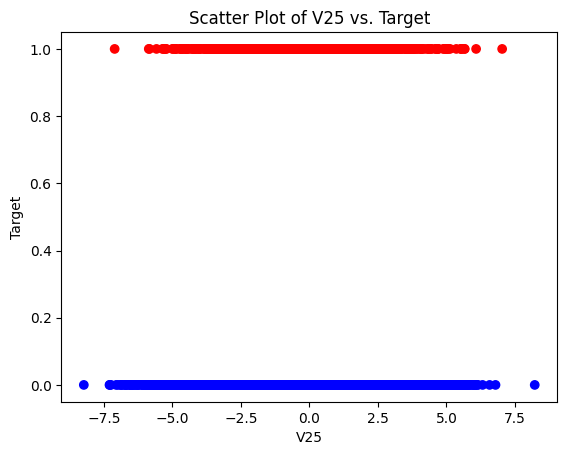

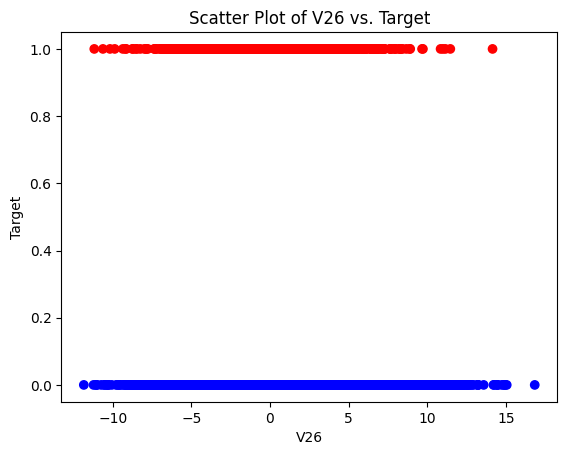

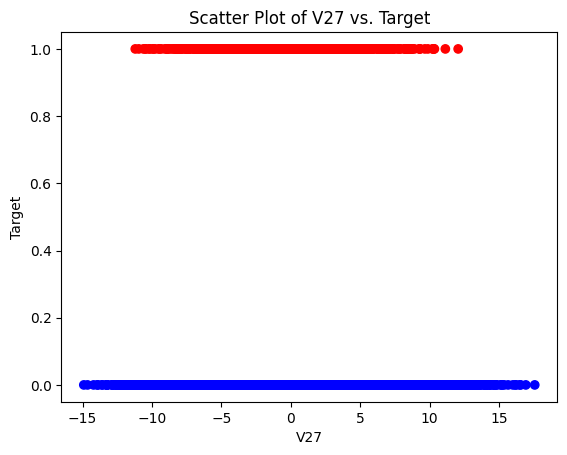

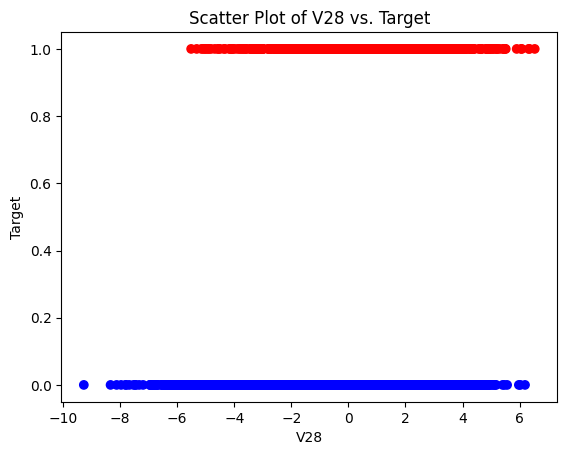

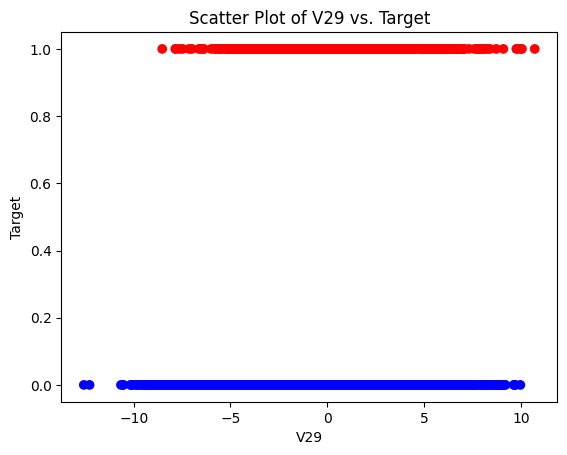

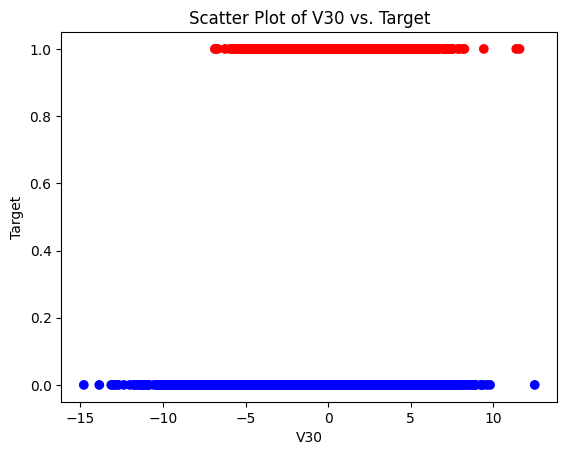

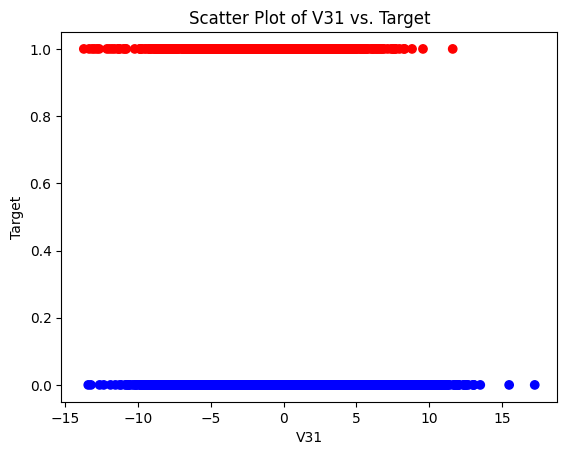

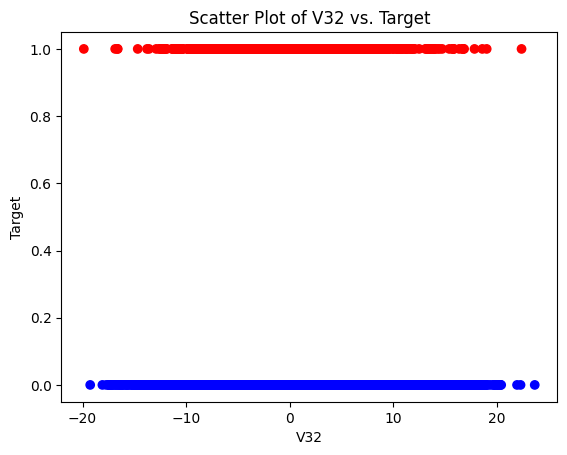

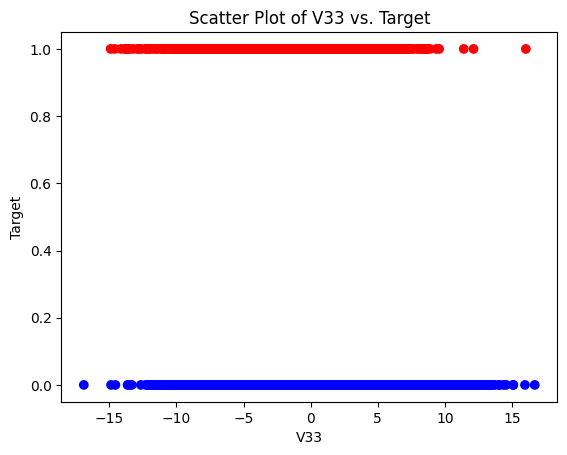

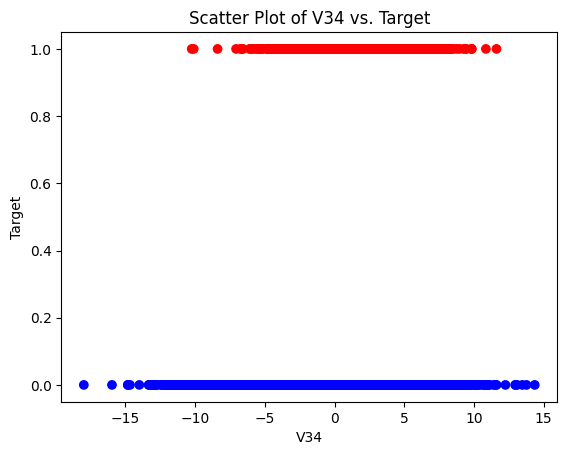

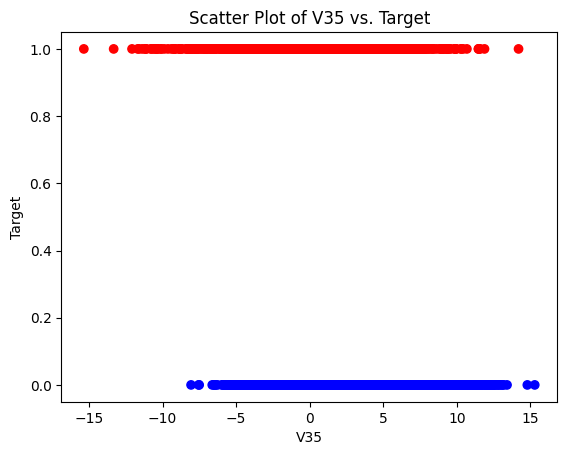

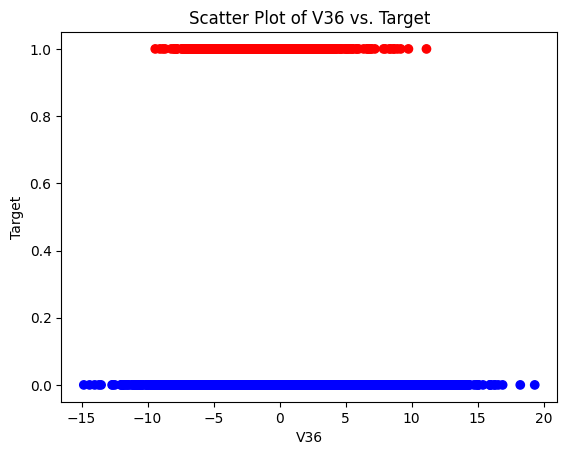

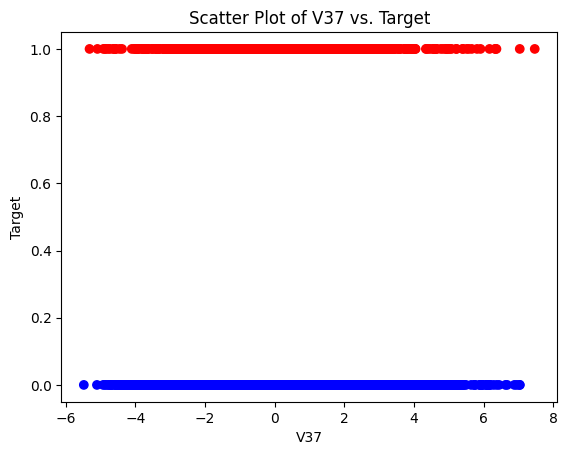

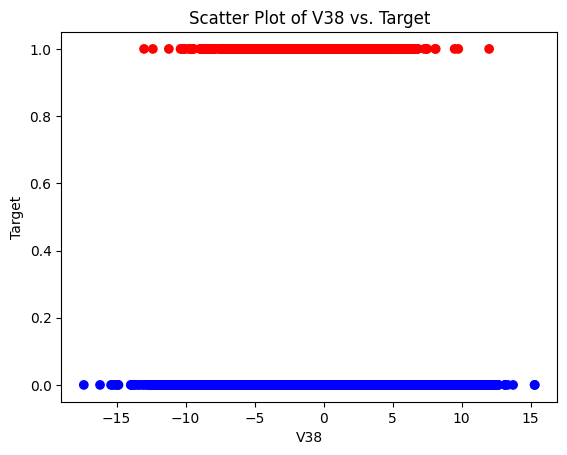

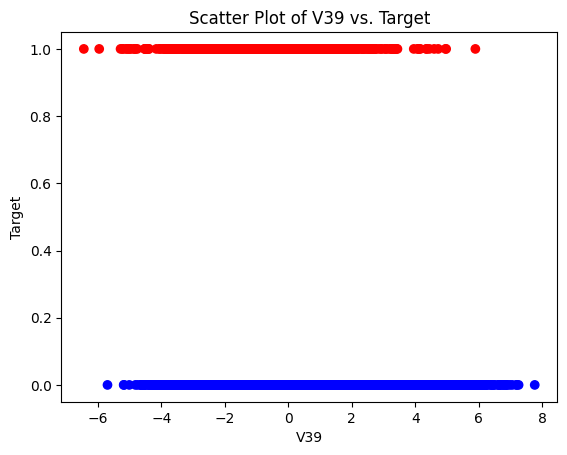

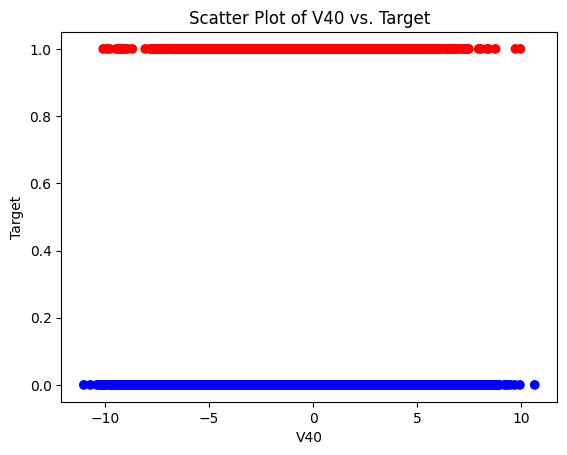

In [22]:
#Create the scatter plots for all the 40 columns

target_variable = 'Target'
for column in train_df.columns:
    if column != target_variable:
        plt.figure()
        plt.scatter(train_df[column], train_df[target_variable], c=train_df[target_variable], cmap='bwr', marker='o')
        plt.xlabel(column)
        plt.ylabel(target_variable)
        plt.title(f'Scatter Plot of {column} vs. {target_variable}')
        plt.show()

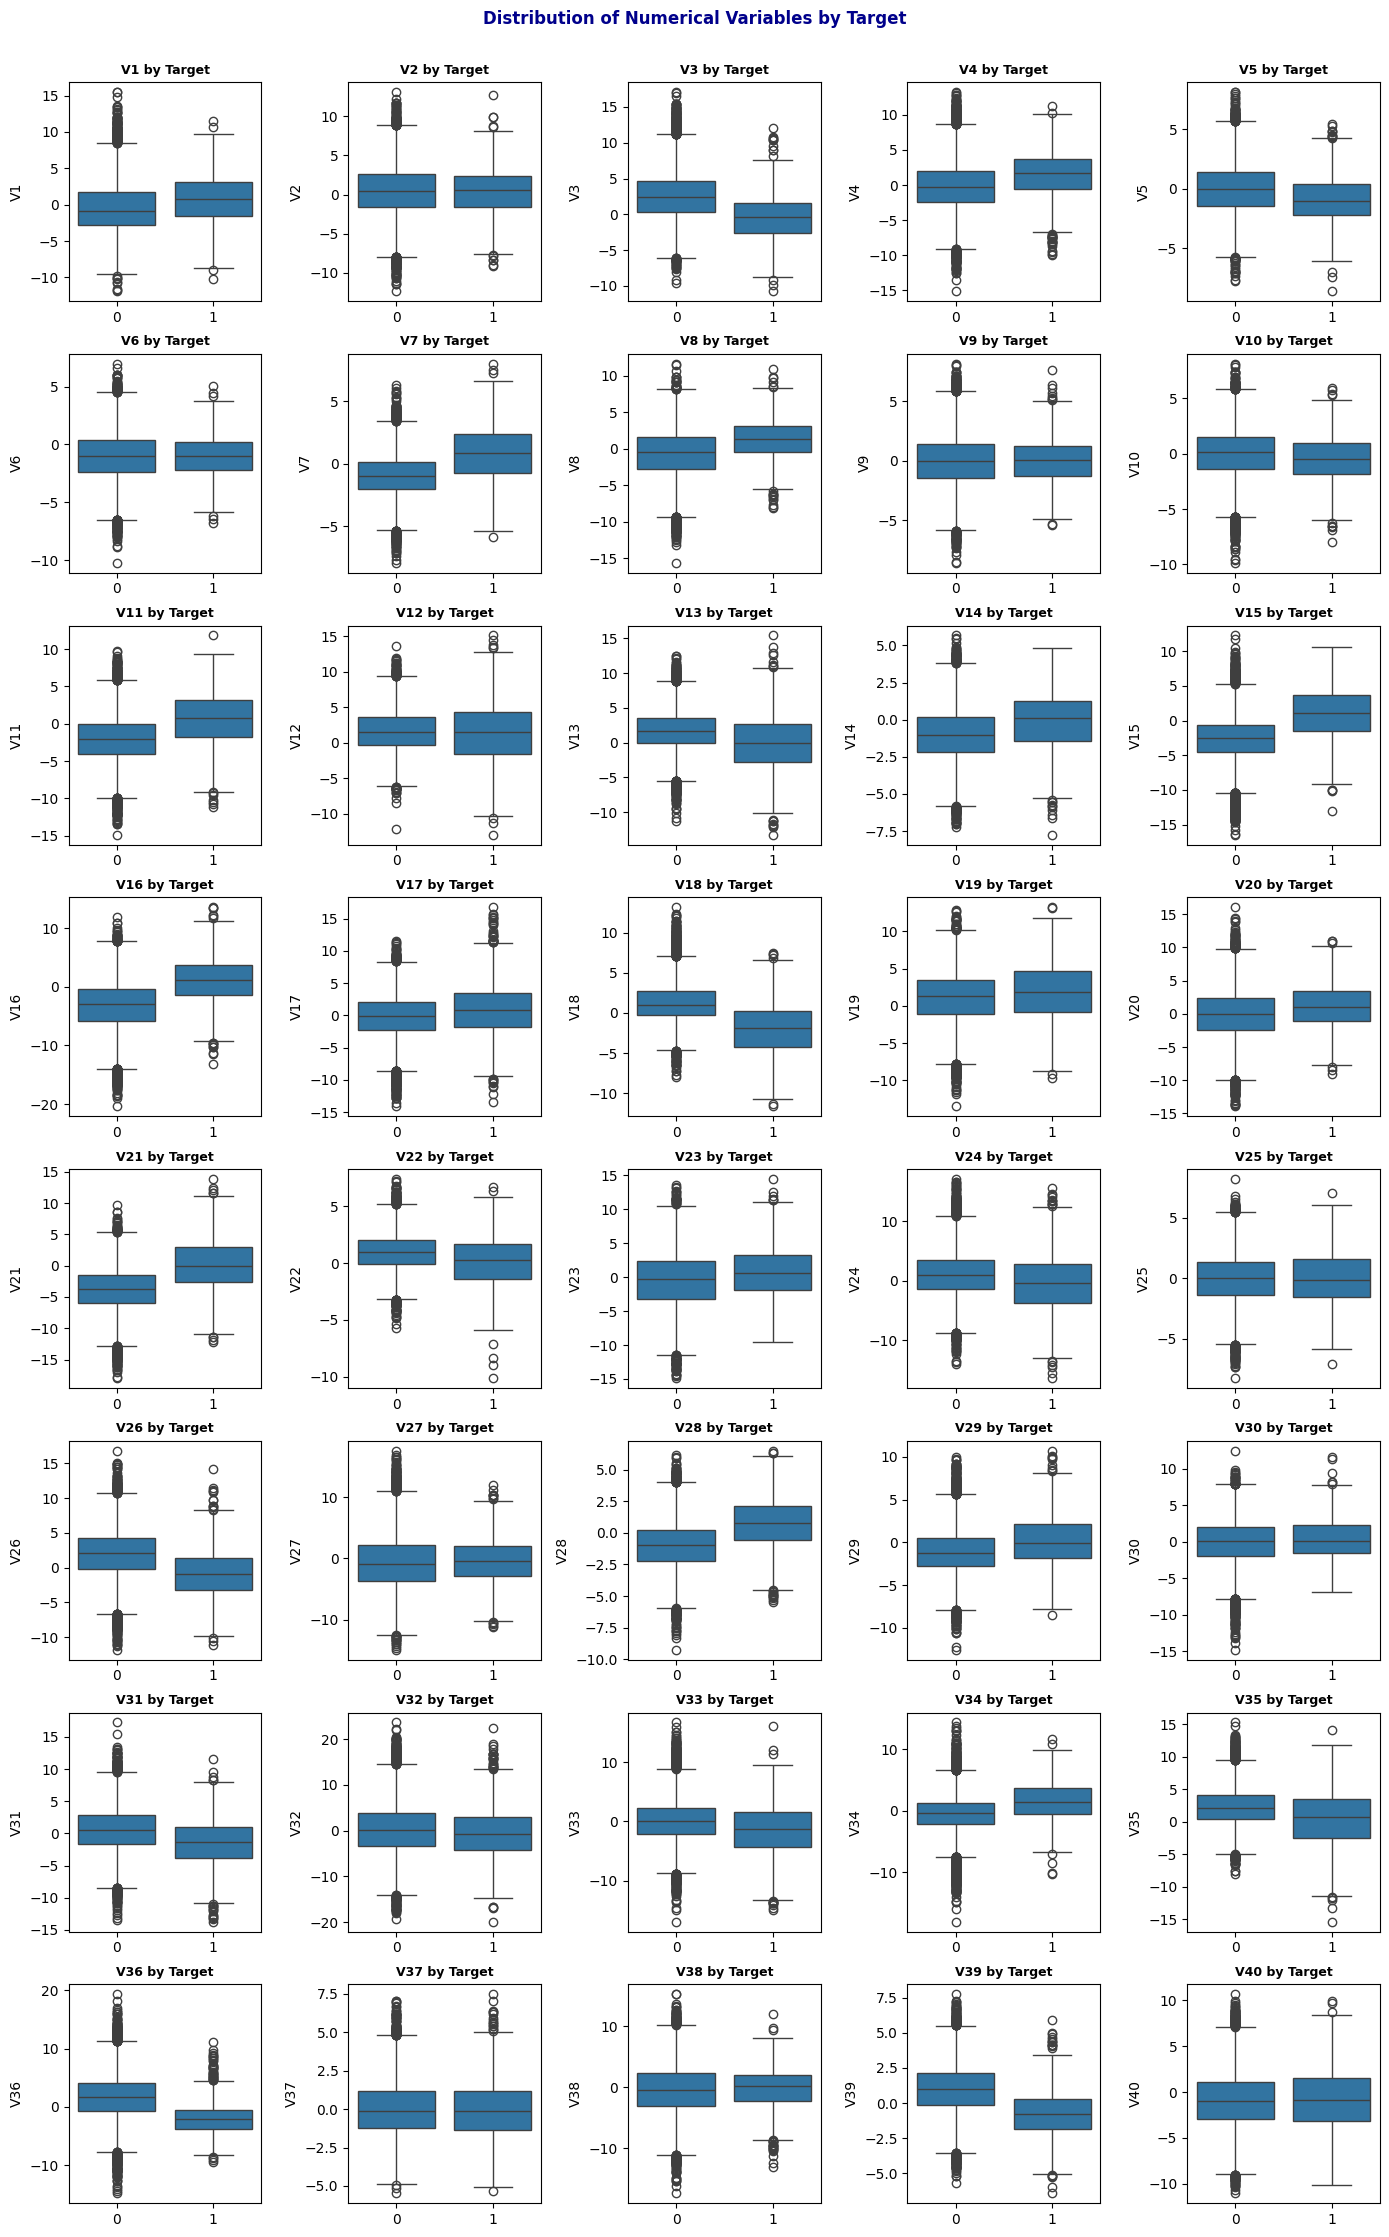

In [23]:
#Box plot to see the distribution of columns w.r.t classes in target column

fig, axes = plt.subplots(nrows = 8, ncols = 5, figsize = (14, 24))
axes = axes.flat

for i,col in enumerate(train_df.columns[:-1]):
    sns.boxplot(train_df, x = 'Target', y = col, ax = axes[i])

    axes[i].set_title(f'{col} by Target', fontsize = 9, fontweight = 'bold', color = 'black')
    axes[i].set_xlabel('')

fig.suptitle('Distribution of Numerical Variables by Target', fontsize = 12, fontweight = 'bold', color = 'darkblue', y = 0.93)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

Observations:

Lots of Highly Correlated Features are there both positive and negative. These may represent redundancy within the dataset which means that one feature can be predicted from the other with a high degree of accuracy. In other words, these features carry similar information or signals about the data.

1. Some of the strong correlations are seen between - (V11,V6), (V12,V8), (V15,V7), (V16,V8), (V36,V39), (V19,V34), (V24,V32), (V11,V29), (V26,V2)

2. Columns with strong correlation w.r.t Target variable are - V7, V11, V15, V16, V21, V28, V34.


#### Data preprocessing

In [24]:
#checking the split of target column

train_df.shape
train_df['Target'].value_counts()
#test_df['Target'].value_counts()

Target
0    18854
1     1110
Name: count, dtype: int64

In [25]:
#separate the Dependant and Independant variables in Train and Test Dataframe

# Separate features and target for training data
X_train_temp = train_df.drop(columns=['Target'])
y_train_temp = train_df['Target']

# Separate features and target for testing data
X_test = test_df.drop(columns=['Target'])
y_test = test_df['Target']

In [26]:
#Split Training Data into Training and Validation Sets

X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.5, random_state=42)

In [27]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 9982
Number of rows in validation data = 9982
Number of rows in test data = 4989


In [28]:
X_train.shape

(9982, 40)

In [29]:
#Normalising the data using standard scalar
#Transform numerical columns in x_train, x_val, and x_test using the fitted scaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [30]:
#compute class weights
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)
class_weights = dict(enumerate(class_weights))

#### Utility Functions

In [31]:
#Define a function to compute the different metrics to check the performance of the Neural Network model

def model_performance(model, predictors, target, threshold=0.5):

  predictions = model.predict(predictors) > threshold

  accuracy = accuracy_score(target, predictions)
  recall= recall_score(target, predictions, average = 'weighted')
  precision = precision_score(target, predictions, average = 'weighted')
  f1 = f1_score(target, predictions, average = 'weighted')

  #creating a dataframe of metrics
  perf_metrics_df = pd.DataFrame({'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}, index=[0])

  return perf_metrics_df

columns = ["hidden_layers","neurons_HL","activation_ftn_HL","epochs","batch_size","Batch_Norm","Weight_Ini","dropout","optimizer",
           "time(secs)","Train_loss","Validation_loss",
           "Train_Precision","Validation_Precision","Train_Recall","Validation_Recall",
           "Test_Precision","Test_Recall"]
results = pd.DataFrame(columns=columns)

In [32]:
#Define a fucntion to plot the metric chosen for training and validation data

def plot_training_history(history, metric):

  if metric not in history.history or f"val_{metric}" not in history.history:
    print(f"The metric {metric} is not available in the history.")
    return

  plt.figure(figsize=(12, 6))
  plt.plot(history.history[metric], label=f"Training {metric}")
  plt.plot(history.history[f'val_{metric}'], label=f"Validation {metric}")
  plt.title(f"Training and Validation {metric} over Epochs")
  plt.xlabel('Epochs')
  plt.ylabel(metric.capitalize())
  plt.legend(loc='best')
  plt.grid(True)
  plt.show()

#### Model Building

In [33]:
#Defining the list of metrics to be used for all the models

metrics = [tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name="recall")]

##### Model 0 - Shallow Neural Network to check the linearity of the model

1. No Hidden layers
2. SGD
3. Loss function - Binary Cross entropy
4. Epochs - 10
5. Batch size - Input rows

In [34]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model0 = Sequential()
model0.add(Dense(1,input_dim = X_train.shape[1]))
model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
#Add the necessary configurations and fit the model

optimizer = keras.optimizers.SGD()
model0.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=metrics)
epochs = 10
batch_size = X_train.shape[0]
start = time.time()
history = model0.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_val,y_val))
end = time.time()

Epoch 1/10
1/1 [==============================] - 1s 724ms/step - loss: 4.6068 - precision: 0.0319 - recall: 0.2228 - val_loss: 4.5683 - val_precision: 0.0339 - val_recall: 0.2170
Epoch 2/10
1/1 [==============================] - 0s 49ms/step - loss: 4.4507 - precision: 0.0298 - recall: 0.2041 - val_loss: 4.3926 - val_precision: 0.0347 - val_recall: 0.2170
Epoch 3/10
1/1 [==============================] - 0s 39ms/step - loss: 4.2698 - precision: 0.0310 - recall: 0.2060 - val_loss: 4.2258 - val_precision: 0.0357 - val_recall: 0.2170
Epoch 4/10
1/1 [==============================] - 0s 34ms/step - loss: 4.1031 - precision: 0.0314 - recall: 0.2041 - val_loss: 4.0429 - val_precision: 0.0367 - val_recall: 0.2170
Epoch 5/10
1/1 [==============================] - 0s 49ms/step - loss: 3.9199 - precision: 0.0320 - recall: 0.2022 - val_loss: 3.7776 - val_precision: 0.0391 - val_recall: 0.2222
Epoch 6/10
1/1 [==============================] - 0s 48ms/step - loss: 3.6104 - precision: 0.0331 - reca

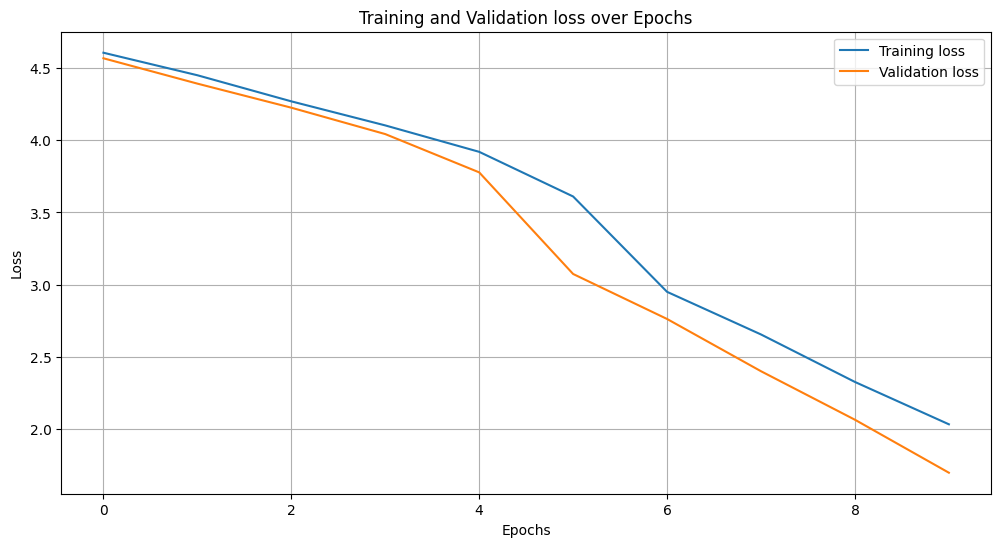

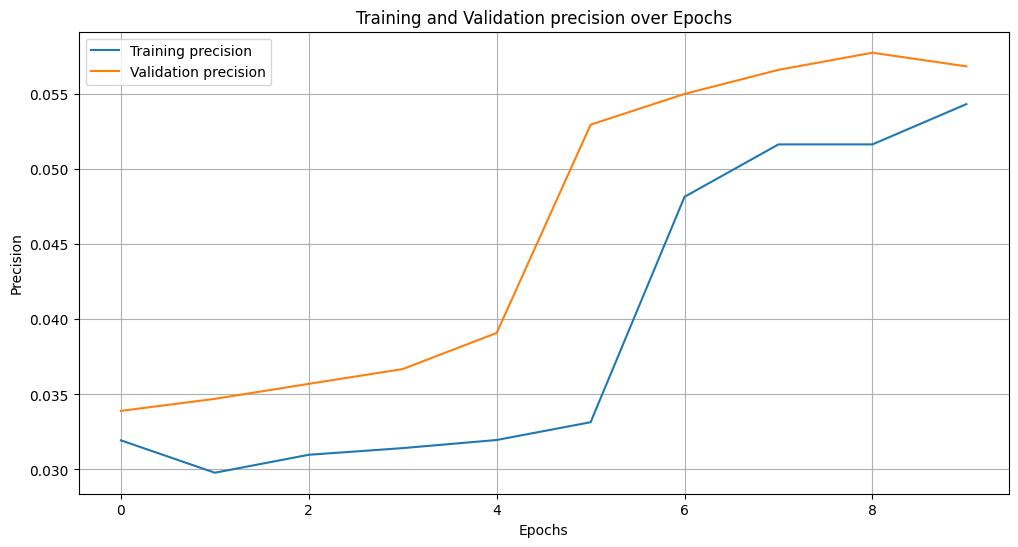

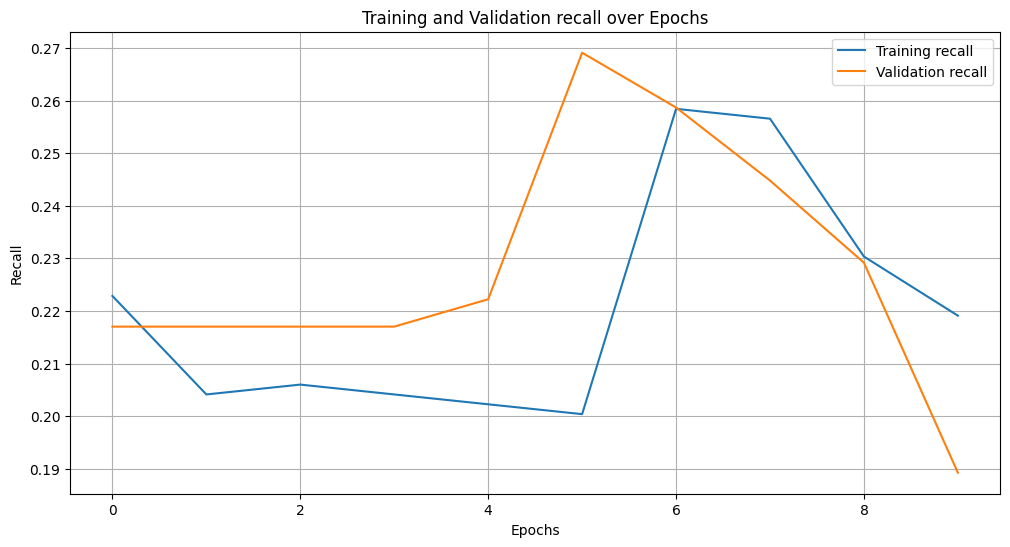

In [36]:
plot_training_history(history,'loss')
plot_training_history(history,'precision')
plot_training_history(history,'recall')

In [37]:
output = model_performance(model0, X_test, y_test)
output

156/156 [==============================] - 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.764682  0.764682   0.890782  0.820497

In [38]:
results.loc[0] = ['-','-','-',epochs,batch_size,'-','-','-',"SGD",end-start,history.history['loss'][-1],history.history['val_loss'][-1],history.history['precision'][-1],history.history['val_precision'][-1],history.history['recall'][-1],history.history['val_recall'][-1]
                  ,output['Precision'][0],output['Recall'][0]]
results

hidden_layers neurons_HL activation_ftn_HL  epochs  batch_size Batch_Norm  \
0             -          -                 -      10        9982          -   

  Weight_Ini dropout optimizer  time(secs)  Train_loss  Validation_loss  \
0          -       -       SGD    1.234703    2.031547         1.695963   

   Train_Precision  Validation_Precision  Train_Recall  Validation_Recall  \
0         0.054343               0.05686      0.219101           0.189236   

   Test_Precision  Test_Recall  
0        0.890782     0.764682

##### Model 1  - Shallow Network

1. No Hidden layers
2. SGD with learning rate - 0.01
3. Loss function - Binary Cross entropy
4. Epochs - 25
5. Batch size - Input rows

In [39]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model1 = Sequential()
model1.add(Dense(1,input_dim = X_train.shape[1]))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
#Add the necessary configurations and fit the model

optimizer = keras.optimizers.SGD(learning_rate=0.01)
model1.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=metrics)
epochs = 25
batch_size = X_train.shape[0]
start = time.time()
history = model1.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_val,y_val))
end = time.time()

Epoch 1/25
1/1 [==============================] - 1s 651ms/step - loss: 4.3678 - precision: 0.0436 - recall: 0.2054 - val_loss: 4.1789 - val_precision: 0.0357 - val_recall: 0.1979
Epoch 2/25
1/1 [==============================] - 0s 45ms/step - loss: 4.0851 - precision: 0.0299 - recall: 0.1760 - val_loss: 3.9125 - val_precision: 0.0370 - val_recall: 0.1962
Epoch 3/25
1/1 [==============================] - 0s 32ms/step - loss: 3.7993 - precision: 0.0306 - recall: 0.1723 - val_loss: 3.6912 - val_precision: 0.0390 - val_recall: 0.1979
Epoch 4/25
1/1 [==============================] - 0s 48ms/step - loss: 3.6145 - precision: 0.0339 - recall: 0.1835 - val_loss: 3.4839 - val_precision: 0.0387 - val_recall: 0.1892
Epoch 5/25
1/1 [==============================] - 0s 48ms/step - loss: 3.4107 - precision: 0.0352 - recall: 0.1835 - val_loss: 3.2554 - val_precision: 0.0397 - val_recall: 0.1858
Epoch 6/25
1/1 [==============================] - 0s 48ms/step - loss: 3.1711 - precision: 0.0357 - reca

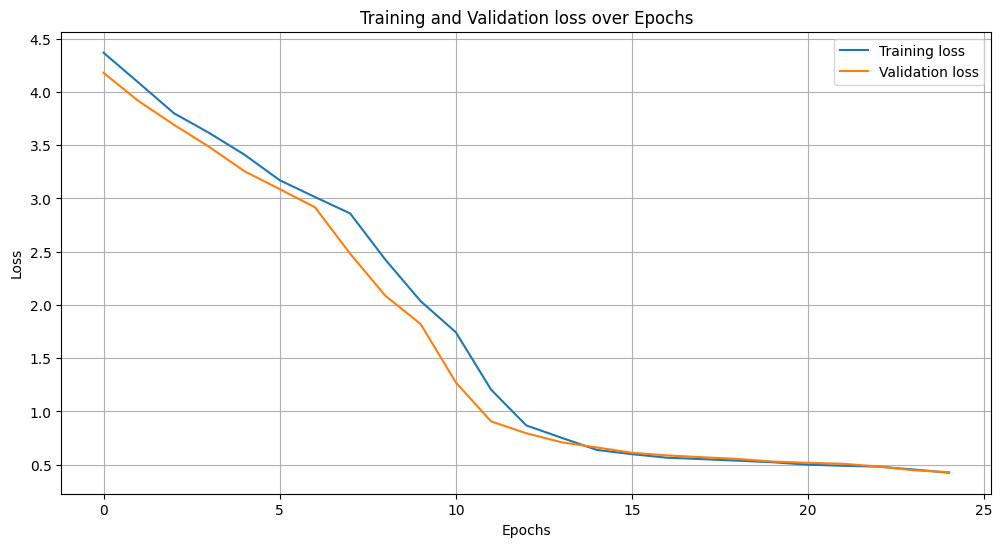

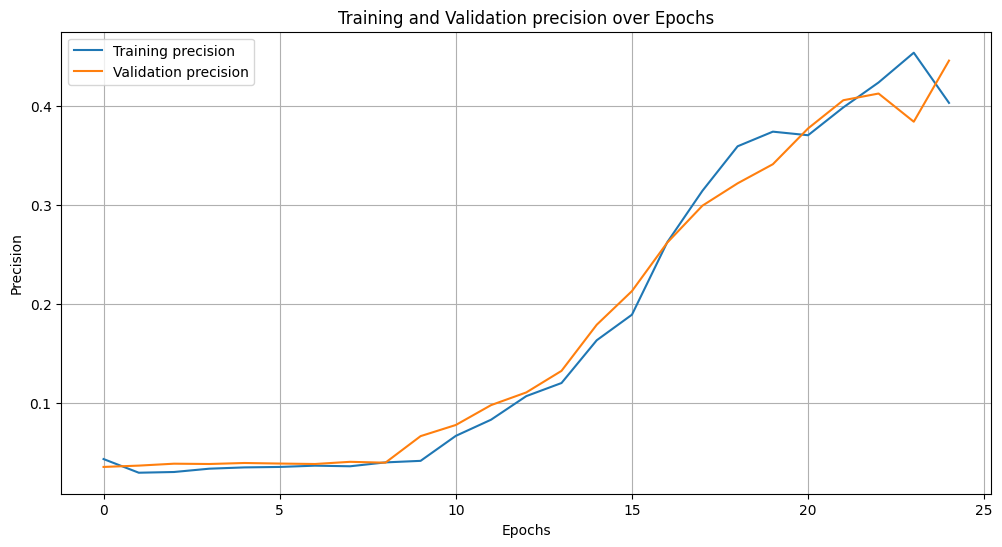

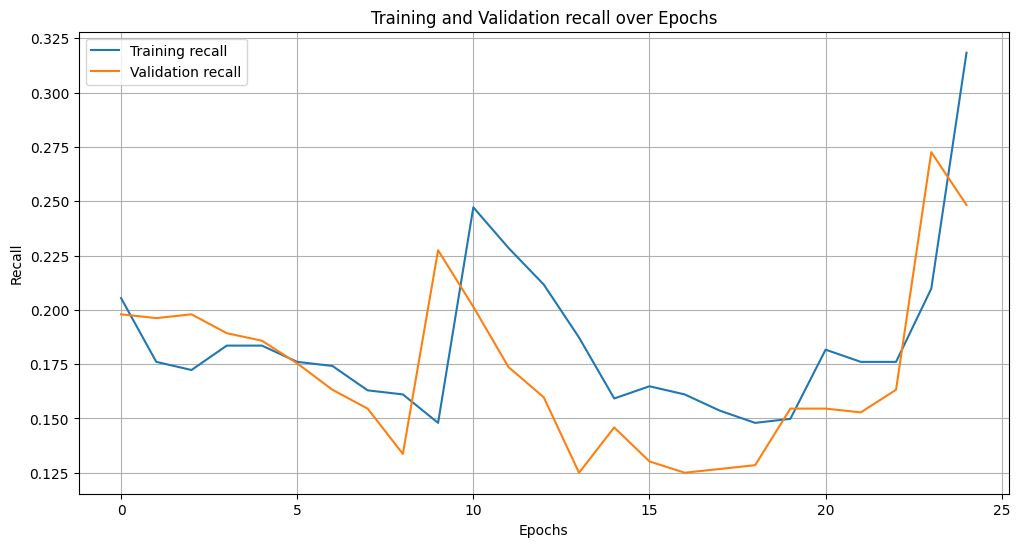

In [41]:
plot_training_history(history,'loss')
plot_training_history(history,'precision')
plot_training_history(history,'recall')

In [42]:
output = model_performance(model1, X_test, y_test)
output

156/156 [==============================] - 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.940469  0.940469   0.928051  0.932551

In [43]:
results.loc[1] = ['-','-','-',epochs,batch_size,'-','-','-',"SGD_LR(0.01)",end-start,history.history['loss'][-1],history.history['val_loss'][-1],
history.history['precision'][-1],history.history['val_precision'][-1],history.history['recall'][-1],history.history['val_recall'][-1]
                  ,output['Precision'][0],output['Recall'][0]]
results

hidden_layers neurons_HL activation_ftn_HL  epochs  batch_size Batch_Norm  \
0             -          -                 -      10        9982          -   
1             -          -                 -      25        9982          -   

  Weight_Ini dropout     optimizer  time(secs)  Train_loss  Validation_loss  \
0          -       -           SGD    1.234703    2.031547         1.695963   
1          -       -  SGD_LR(0.01)    3.018212    0.425082         0.430649   

   Train_Precision  Validation_Precision  Train_Recall  Validation_Recall  \
0         0.054343              0.056860      0.219101           0.189236   
1         0.402844              0.445483      0.318352           0.248264   

   Test_Precision  Test_Recall  
0        0.890782     0.764682  
1        0.928051     0.940469

##### Model 2 - Shallow Network

1. No Hidden layers
2. SGD with learning rate - 0.01
3. Loss function - Binary Cross entropy
4. Epochs - 50
5. Batch size - Input rows

In [44]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model2 = Sequential()
model2.add(Dense(1,input_dim = X_train.shape[1]))
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
#Add the necessary configurations and fit the model

optimizer = keras.optimizers.SGD(learning_rate=0.01)
model2.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=metrics)
epochs = 50
batch_size = X_train.shape[0]
start = time.time()
history = model2.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_val,y_val))
end = time.time()

Epoch 1/50
1/1 [==============================] - 1s 662ms/step - loss: 3.3087 - precision: 0.1083 - recall: 0.3550 - val_loss: 3.0946 - val_precision: 0.0786 - val_recall: 0.4306
Epoch 2/50
1/1 [==============================] - 0s 34ms/step - loss: 3.0992 - precision: 0.0772 - recall: 0.4588 - val_loss: 2.8564 - val_precision: 0.0818 - val_recall: 0.4253
Epoch 3/50
1/1 [==============================] - 0s 34ms/step - loss: 2.8604 - precision: 0.0783 - recall: 0.4457 - val_loss: 2.5182 - val_precision: 0.0859 - val_recall: 0.4045
Epoch 4/50
1/1 [==============================] - 0s 48ms/step - loss: 2.4603 - precision: 0.0867 - recall: 0.4513 - val_loss: 2.0985 - val_precision: 0.0795 - val_recall: 0.3281
Epoch 5/50
1/1 [==============================] - 0s 51ms/step - loss: 2.0346 - precision: 0.0785 - recall: 0.3577 - val_loss: 1.7005 - val_precision: 0.0802 - val_recall: 0.2847
Epoch 6/50
1/1 [==============================] - 0s 40ms/step - loss: 1.6505 - precision: 0.0802 - reca

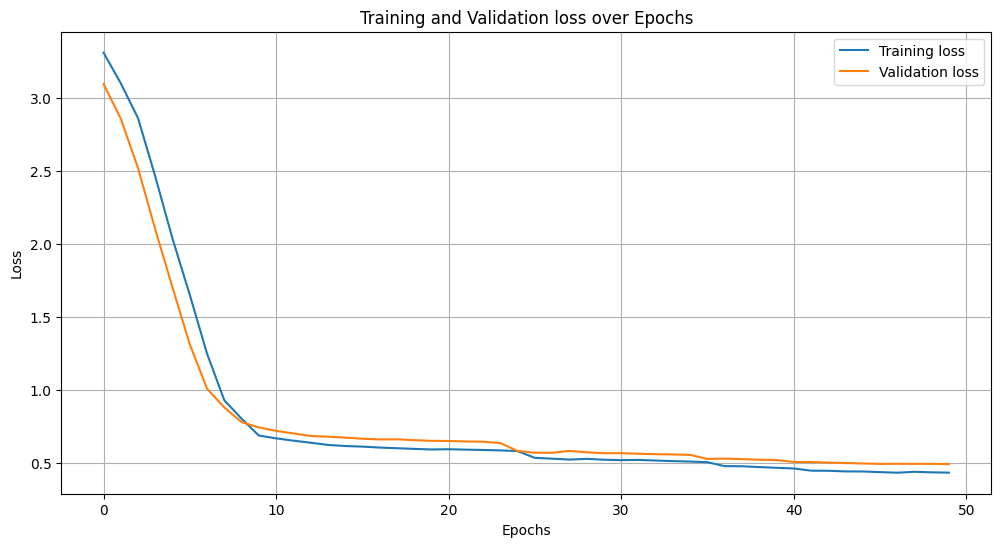

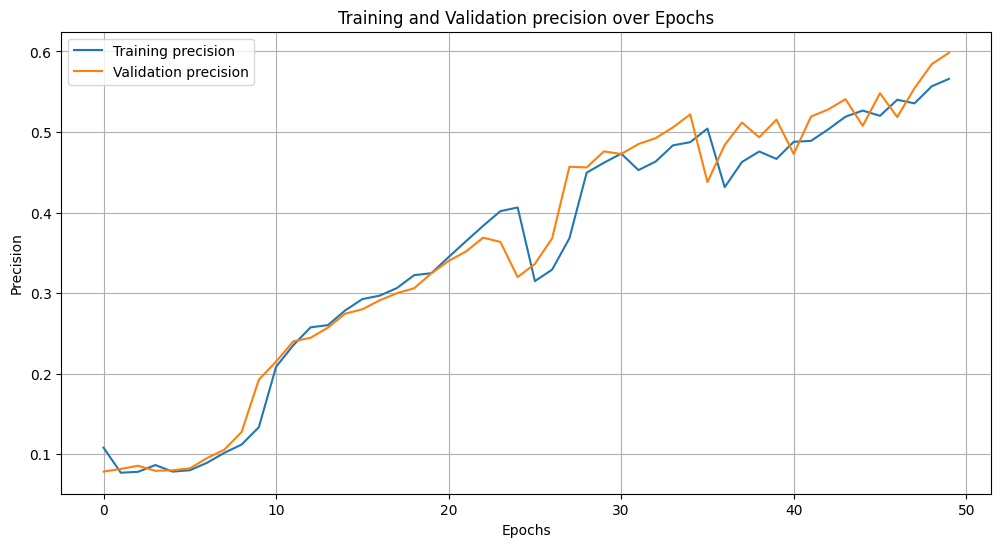

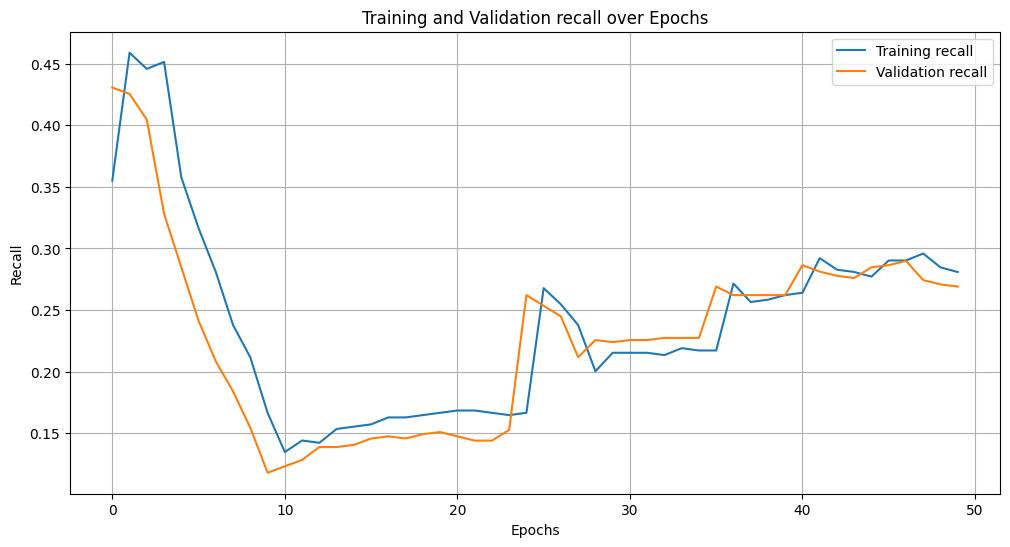

In [46]:
plot_training_history(history,'loss')
plot_training_history(history,'precision')
plot_training_history(history,'recall')

In [47]:
output = model_performance(model2, X_test, y_test)
output

156/156 [==============================] - 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.951694  0.951694   0.942613  0.943551

In [48]:
results.loc[2] = ['-','-','-',epochs,batch_size,'-','-','-',"SGD-LR(0.01)",end-start,history.history['loss'][-1],history.history['val_loss'][-1],
history.history['precision'][-1],history.history['val_precision'][-1],history.history['recall'][-1],history.history['val_recall'][-1]
                  ,output['Precision'][0],output['Recall'][0]]

results

hidden_layers neurons_HL activation_ftn_HL  epochs  batch_size Batch_Norm  \
0             -          -                 -      10        9982          -   
1             -          -                 -      25        9982          -   
2             -          -                 -      50        9982          -   

  Weight_Ini dropout     optimizer  time(secs)  Train_loss  Validation_loss  \
0          -       -           SGD    1.234703    2.031547         1.695963   
1          -       -  SGD_LR(0.01)    3.018212    0.425082         0.430649   
2          -       -  SGD-LR(0.01)    2.985321    0.434529         0.493189   

   Train_Precision  Validation_Precision  Train_Recall  Validation_Recall  \
0         0.054343              0.056860      0.219101           0.189236   
1         0.402844              0.445483      0.318352           0.248264   
2         0.566038              0.598456      0.280899           0.269097   

   Test_Precision  Test_Recall  
0        0.890782     0.764682  
1        0.928051     0.940469  
2        0.942613     0.951694

##### Model 3 - Shallow Network

1. No Hidden layers
2. SGD with learning rate - 0.01
3. Loss function - Binary Cross entropy
4. Epochs - 25
5. Batch size - 32


In [49]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model3 = Sequential()
model3.add(Dense(1,input_dim = X_train.shape[1]))
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
#Add the necessary configurations and fit the model

optimizer = keras.optimizers.SGD(learning_rate=0.01)
model3.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=metrics)
epochs = 25
batch_size = 32
start = time.time()
history = model3.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_val,y_val))
end = time.time()

Epoch 1/25
312/312 [==============================] - 2s 4ms/step - loss: 3.5195 - precision: 0.1445 - recall: 0.3946 - val_loss: 1.1456 - val_precision: 0.3056 - val_recall: 0.5747
Epoch 2/25
312/312 [==============================] - 1s 4ms/step - loss: 0.7386 - precision: 0.3907 - recall: 0.3446 - val_loss: 0.5384 - val_precision: 0.7912 - val_recall: 0.3420
Epoch 3/25
312/312 [==============================] - 1s 4ms/step - loss: 0.4587 - precision: 0.6930 - recall: 0.4438 - val_loss: 0.6193 - val_precision: 0.5840 - val_recall: 0.2413
Epoch 4/25
312/312 [==============================] - 1s 4ms/step - loss: 0.4201 - precision: 0.7864 - recall: 0.4345 - val_loss: 0.5043 - val_precision: 0.8421 - val_recall: 0.3611
Epoch 5/25
312/312 [==============================] - 1s 4ms/step - loss: 3.8959 - precision: 0.0889 - recall: 0.4213 - val_loss: 5.9308 - val_precision: 0.0569 - val_recall: 0.3767
Epoch 6/25
312/312 [==============================] - 1s 4ms/step - loss: 5.6630 - precisi

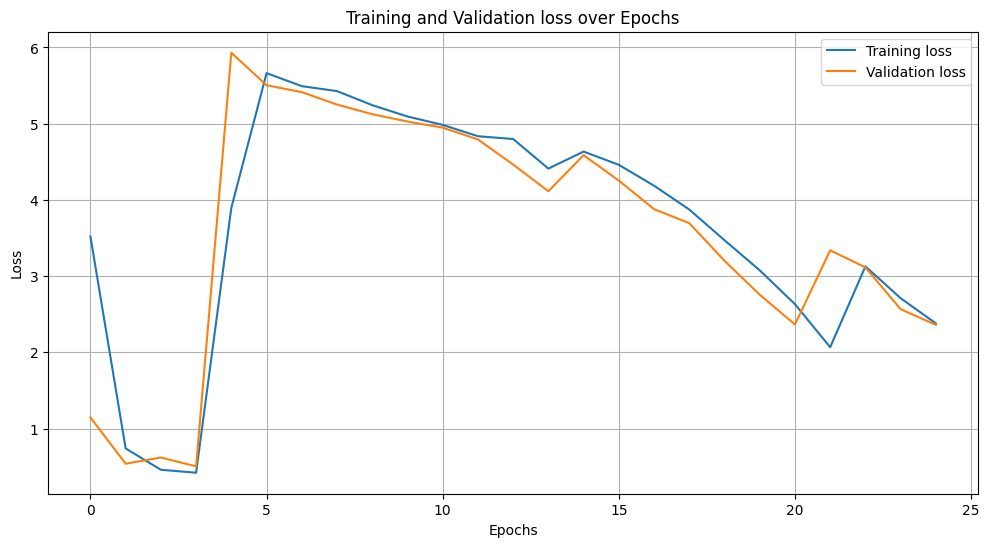

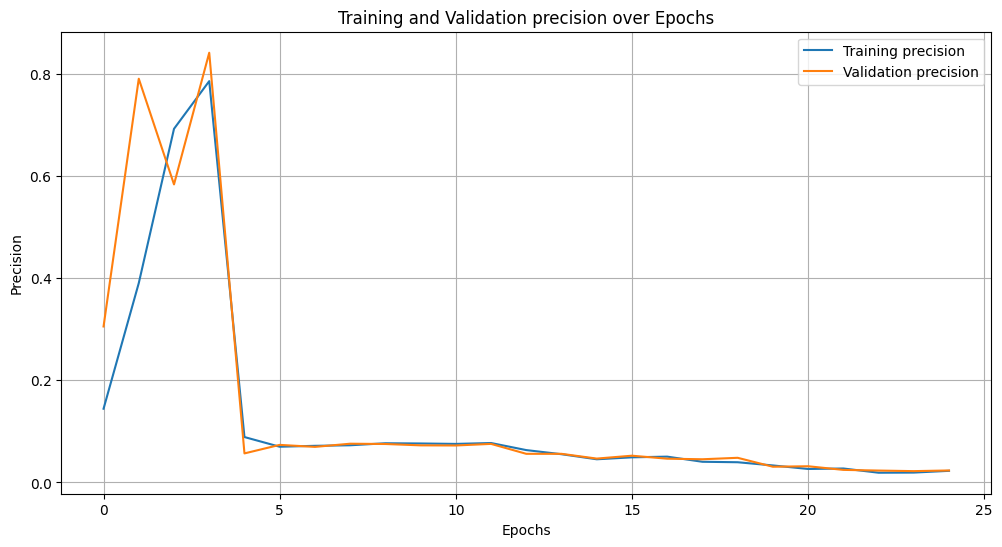

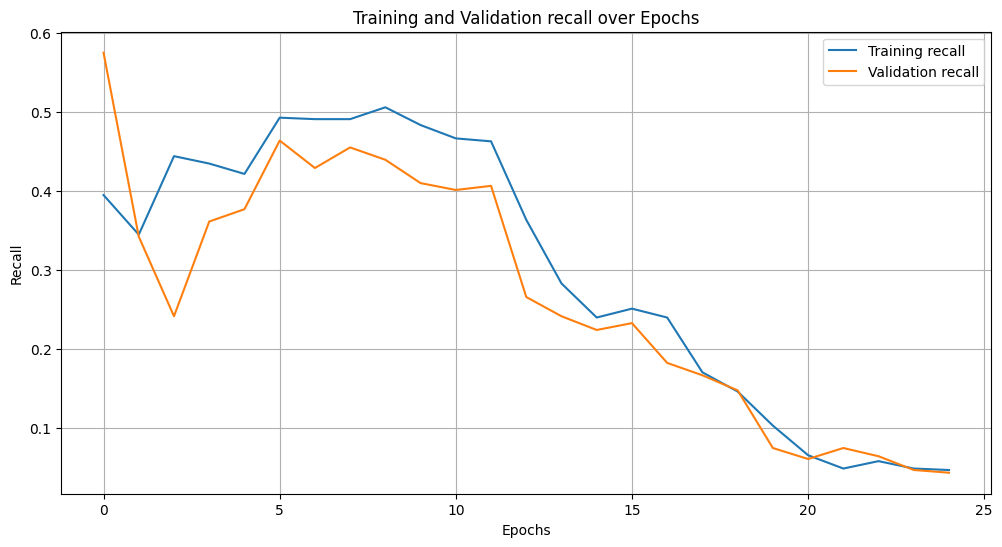

In [51]:
plot_training_history(history,'loss')
plot_training_history(history,'precision')
plot_training_history(history,'recall')

In [52]:
output = model_performance(model3, X_test, y_test)
output

156/156 [==============================] - 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.844257  0.844257   0.888372  0.865524

In [53]:
results.loc[3] = ['-','-','-',epochs,batch_size,'-','-','-',"SGD-LR(0.01)",end-start,history.history['loss'][-1],history.history['val_loss'][-1],
history.history['precision'][-1],history.history['val_precision'][-1],history.history['recall'][-1],history.history['val_recall'][-1]
                  ,output['Precision'][0],output['Recall'][0]]

results

hidden_layers neurons_HL activation_ftn_HL  epochs  batch_size Batch_Norm  \
0             -          -                 -      10        9982          -   
1             -          -                 -      25        9982          -   
2             -          -                 -      50        9982          -   
3             -          -                 -      25          32          -   

  Weight_Ini dropout     optimizer  time(secs)  Train_loss  Validation_loss  \
0          -       -           SGD    1.234703    2.031547         1.695963   
1          -       -  SGD_LR(0.01)    3.018212    0.425082         0.430649   
2          -       -  SGD-LR(0.01)    2.985321    0.434529         0.493189   
3          -       -  SGD-LR(0.01)   27.868973    2.379025         2.360701   

   Train_Precision  Validation_Precision  Train_Recall  Validation_Recall  \
0         0.054343              0.056860      0.219101           0.189236   
1         0.402844              0.445483      0.318352           0.248264   
2         0.566038              0.598456      0.280899           0.269097   
3         0.022727              0.023452      0.046816           0.043403   

   Test_Precision  Test_Recall  
0        0.890782     0.764682  
1        0.928051     0.940469  
2        0.942613     0.951694  
3        0.888372     0.844257

##### Model 4

1. one Hidden layer - ReLu activation function - 80 nodes
2. SGD with learning rate - 0.01
3. Loss function - Binary Cross entropy
4. Epochs - 25
5. Batch size - 32
6. Class weights taken into account
7. Output layer - Sigmoid Activaion Function

In [54]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model4 = Sequential()
model4.add(Dense(80,activation="relu",input_dim=X_train.shape[1]))
model4.add(Dense(1,activation="sigmoid"))
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3280      
                                                                 
 dense_1 (Dense)             (None, 1)                 81        
                                                                 
Total params: 3361 (13.13 KB)
Trainable params: 3361 (13.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
#Add the necessary configurations and fit the model

optimizer = keras.optimizers.SGD(learning_rate=0.01)
model4.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=metrics)
epochs = 25
batch_size = 32
start = time.time()
history = model4.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_val,y_val),class_weight=class_weights)
end = time.time()

Epoch 1/25
312/312 [==============================] - 2s 4ms/step - loss: 0.4483 - precision: 0.1280 - recall: 0.4261 - val_loss: 0.3979 - val_precision: 0.2378 - val_recall: 0.8889
Epoch 2/25
312/312 [==============================] - 1s 3ms/step - loss: 0.3613 - precision: 0.2605 - recall: 0.8727 - val_loss: 0.3351 - val_precision: 0.3088 - val_recall: 0.9028
Epoch 3/25
312/312 [==============================] - 1s 4ms/step - loss: 0.3284 - precision: 0.3142 - recall: 0.8839 - val_loss: 0.2721 - val_precision: 0.4046 - val_recall: 0.9097
Epoch 4/25
312/312 [==============================] - 1s 4ms/step - loss: 0.3068 - precision: 0.3636 - recall: 0.8858 - val_loss: 0.2523 - val_precision: 0.4454 - val_recall: 0.9062
Epoch 5/25
312/312 [==============================] - 1s 4ms/step - loss: 0.2905 - precision: 0.4041 - recall: 0.8764 - val_loss: 0.2433 - val_precision: 0.4815 - val_recall: 0.9062
Epoch 6/25
312/312 [==============================] - 1s 3ms/step - loss: 0.2775 - precisi

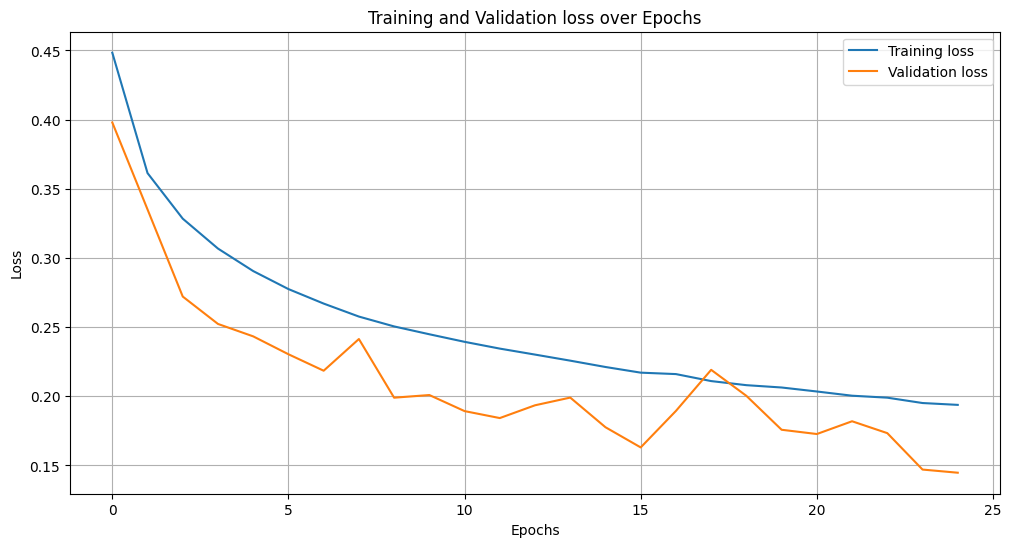

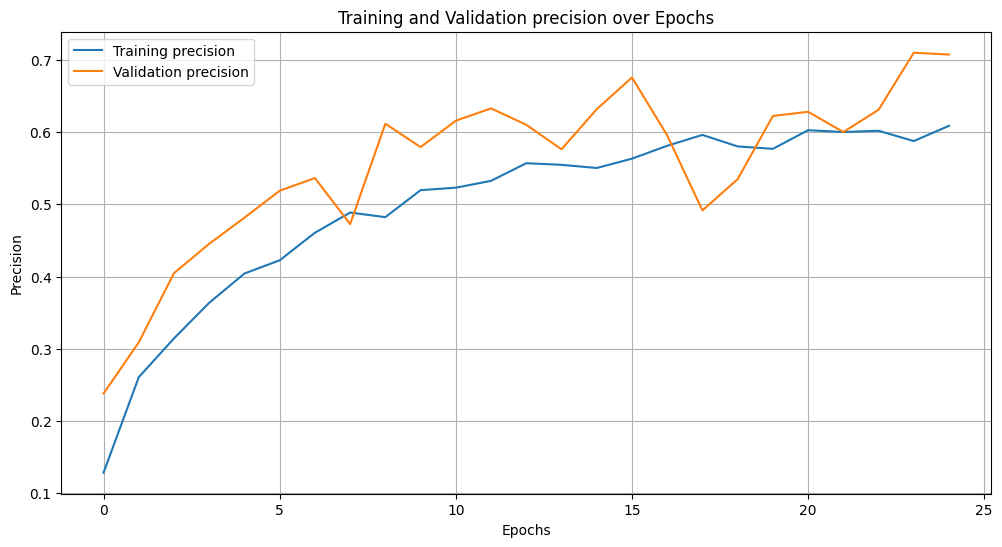

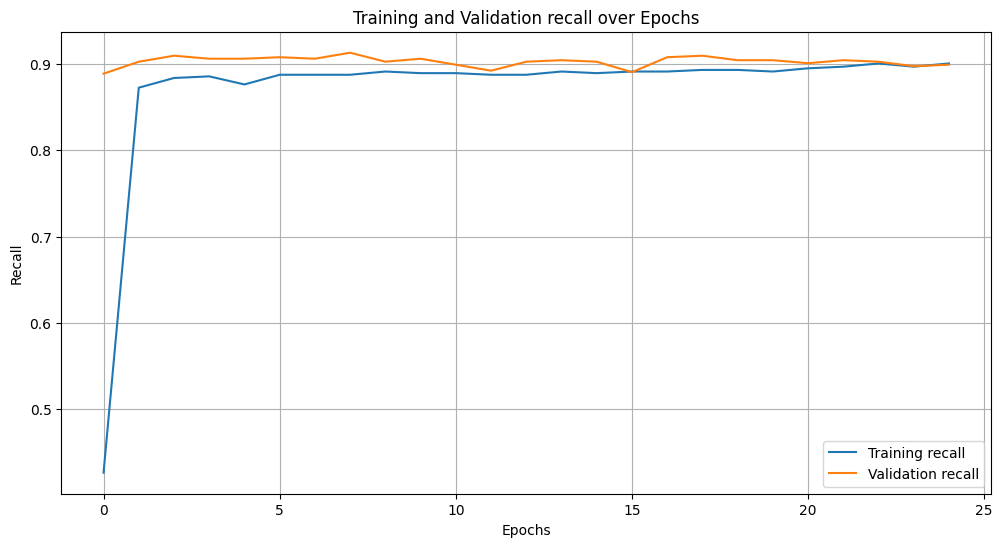

In [56]:
plot_training_history(history,'loss')
plot_training_history(history,'precision')
plot_training_history(history,'recall')

In [57]:
output = model_performance(model4, X_test, y_test)
output

156/156 [==============================] - 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.970134  0.970134   0.973761  0.971494

In [58]:
results.loc[4] = ['1','80','relu',epochs,batch_size,'-','-','-',"SGD_LR(0.01)",end-start,history.history['loss'][-1],history.history['val_loss'][-1],
history.history['precision'][-1],history.history['val_precision'][-1],history.history['recall'][-1],history.history['val_recall'][-1]
                  ,output['Precision'][0],output['Recall'][0]]

results

hidden_layers neurons_HL activation_ftn_HL  epochs  batch_size Batch_Norm  \
0             -          -                 -      10        9982          -   
1             -          -                 -      25        9982          -   
2             -          -                 -      50        9982          -   
3             -          -                 -      25          32          -   
4             1         80              relu      25          32          -   

  Weight_Ini dropout     optimizer  time(secs)  Train_loss  Validation_loss  \
0          -       -           SGD    1.234703    2.031547         1.695963   
1          -       -  SGD_LR(0.01)    3.018212    0.425082         0.430649   
2          -       -  SGD-LR(0.01)    2.985321    0.434529         0.493189   
3          -       -  SGD-LR(0.01)   27.868973    2.379025         2.360701   
4          -       -  SGD_LR(0.01)   41.567311    0.193805         0.144769   

   Train_Precision  Validation_Precision  Train_Recall  Validation_Recall  \
0         0.054343              0.056860      0.219101           0.189236   
1         0.402844              0.445483      0.318352           0.248264   
2         0.566038              0.598456      0.280899           0.269097   
3         0.022727              0.023452      0.046816           0.043403   
4         0.608861              0.707650      0.900749           0.899306   

   Test_Precision  Test_Recall  
0        0.890782     0.764682  
1        0.928051     0.940469  
2        0.942613     0.951694  
3        0.888372     0.844257  
4        0.973761     0.970134

##### Model 5

1. Two Hidden layer - ReLu activation function - 80 nodes, 160 nodes
2. SGD with learning rate - 0.01
3. Loss function - Binary Cross entropy
4. Epochs - 25
5. Batch size - 32
6. Class weights taken into account
7. Output layer - Sigmoid Activaion Function

In [59]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model5 = Sequential()
model5.add(Dense(80,activation="relu",input_dim=X_train.shape[1]))
model5.add(Dense(160,activation="relu"))
model5.add(Dense(1,activation="sigmoid"))
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3280      
                                                                 
 dense_1 (Dense)             (None, 160)               12960     
                                                                 
 dense_2 (Dense)             (None, 1)                 161       
                                                                 
Total params: 16401 (64.07 KB)
Trainable params: 16401 (64.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
#Add the necessary configurations and fit the model

optimizer = keras.optimizers.SGD(learning_rate=0.01)
model5.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=metrics)
epochs = 25
batch_size = 32
start = time.time()
history = model5.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_val,y_val),class_weight=class_weights)
end = time.time()

Epoch 1/25
312/312 [==============================] - 3s 6ms/step - loss: 0.4797 - precision: 0.2748 - recall: 0.8523 - val_loss: 0.4100 - val_precision: 0.2544 - val_recall: 0.8715
Epoch 2/25
312/312 [==============================] - 1s 4ms/step - loss: 0.3524 - precision: 0.2733 - recall: 0.8633 - val_loss: 0.3081 - val_precision: 0.3529 - val_recall: 0.8854
Epoch 3/25
312/312 [==============================] - 1s 4ms/step - loss: 0.3108 - precision: 0.3436 - recall: 0.8801 - val_loss: 0.2498 - val_precision: 0.4376 - val_recall: 0.8941
Epoch 4/25
312/312 [==============================] - 1s 4ms/step - loss: 0.2837 - precision: 0.4012 - recall: 0.8858 - val_loss: 0.2195 - val_precision: 0.5010 - val_recall: 0.8906
Epoch 5/25
312/312 [==============================] - 1s 4ms/step - loss: 0.2648 - precision: 0.4500 - recall: 0.8839 - val_loss: 0.2139 - val_precision: 0.5321 - val_recall: 0.9062
Epoch 6/25
312/312 [==============================] - 1s 4ms/step - loss: 0.2475 - precisi

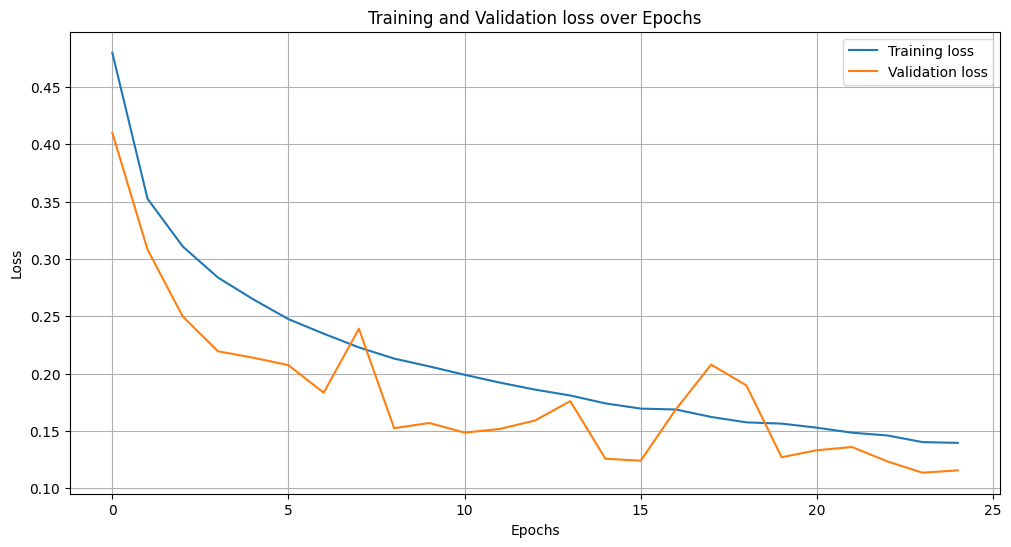

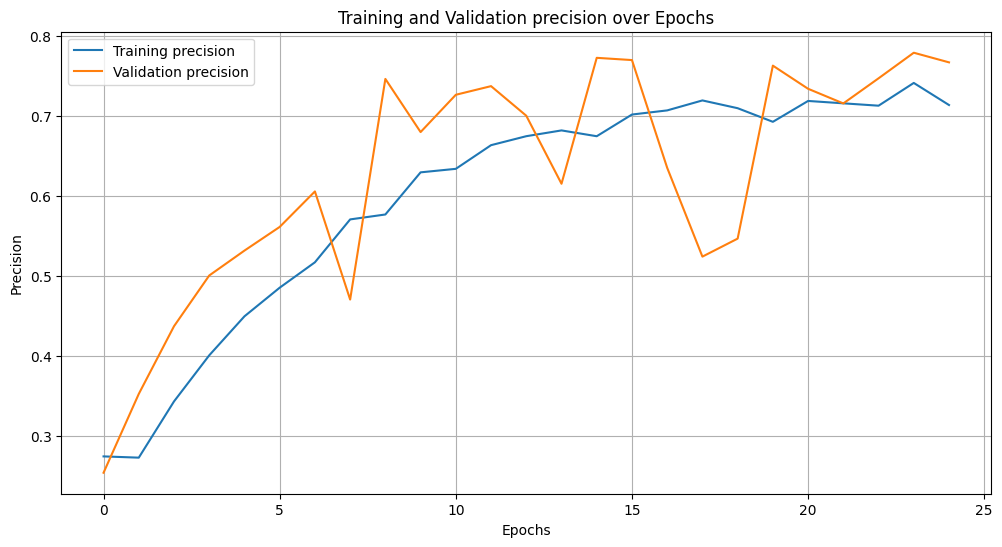

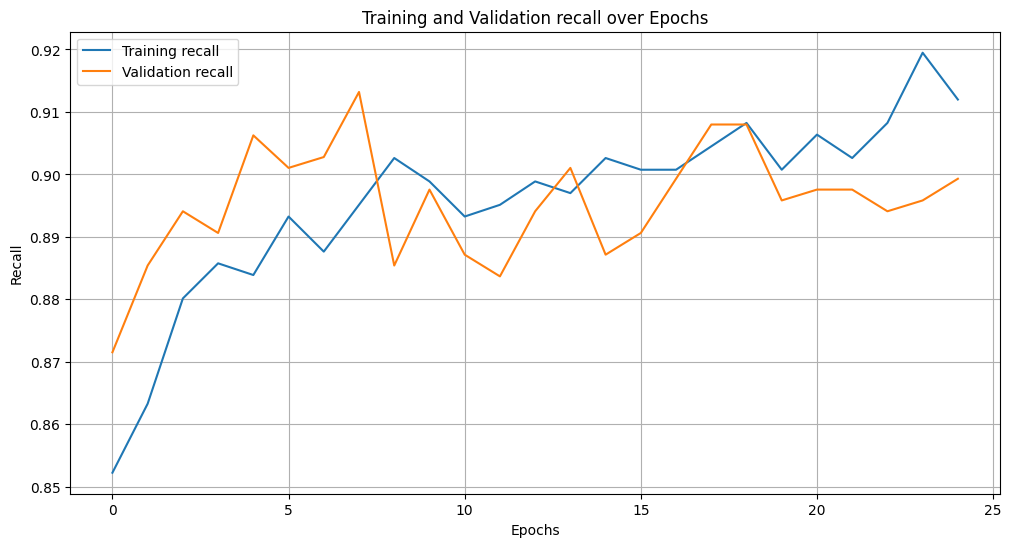

In [61]:
plot_training_history(history,'loss')
plot_training_history(history,'precision')
plot_training_history(history,'recall')

In [62]:
output = model_performance(model5, X_test, y_test)
output

156/156 [==============================] - 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.977551  0.977551    0.97848  0.977946

In [63]:
results.loc[5] = ['2','80,160','relu,relu',epochs,batch_size,'-','-','-',"SGD_LR(0.01)",end-start,history.history['loss'][-1],history.history['val_loss'][-1],
history.history['precision'][-1],history.history['val_precision'][-1],history.history['recall'][-1],history.history['val_recall'][-1]
                  ,output['Precision'][0],output['Recall'][0]]

results

hidden_layers neurons_HL activation_ftn_HL  epochs  batch_size Batch_Norm  \
0             -          -                 -      10        9982          -   
1             -          -                 -      25        9982          -   
2             -          -                 -      50        9982          -   
3             -          -                 -      25          32          -   
4             1         80              relu      25          32          -   
5             2     80,160         relu,relu      25          32          -   

  Weight_Ini dropout     optimizer  time(secs)  Train_loss  Validation_loss  \
0          -       -           SGD    1.234703    2.031547         1.695963   
1          -       -  SGD_LR(0.01)    3.018212    0.425082         0.430649   
2          -       -  SGD-LR(0.01)    2.985321    0.434529         0.493189   
3          -       -  SGD-LR(0.01)   27.868973    2.379025         2.360701   
4          -       -  SGD_LR(0.01)   41.567311    0.193805         0.144769   
5          -       -  SGD_LR(0.01)   41.894305    0.139635         0.115674   

   Train_Precision  Validation_Precision  Train_Recall  Validation_Recall  \
0         0.054343              0.056860      0.219101           0.189236   
1         0.402844              0.445483      0.318352           0.248264   
2         0.566038              0.598456      0.280899           0.269097   
3         0.022727              0.023452      0.046816           0.043403   
4         0.608861              0.707650      0.900749           0.899306   
5         0.714076              0.767407      0.911985           0.899306   

   Test_Precision  Test_Recall  
0        0.890782     0.764682  
1        0.928051     0.940469  
2        0.942613     0.951694  
3        0.888372     0.844257  
4        0.973761     0.970134  
5        0.978480     0.977551

##### Model 6

1. Two Hidden layer - ReLu activation function - 80 nodes, 160 nodes
2. Adam Optimizer - learning_rate=0.01
3. Loss function - Binary Cross entropy
4. Epochs - 25
5. Batch size - 32
6. Class weights taken into account
7. Output layer - Sigmoid Activaion Function

In [64]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model6 = Sequential()
model6.add(Dense(80,activation="relu",input_dim=X_train.shape[1]))
model6.add(Dense(160,activation="relu"))
model6.add(Dense(1,activation="sigmoid"))
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3280      
                                                                 
 dense_1 (Dense)             (None, 160)               12960     
                                                                 
 dense_2 (Dense)             (None, 1)                 161       
                                                                 
Total params: 16401 (64.07 KB)
Trainable params: 16401 (64.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
#Add the necessary configurations and fit the model

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model6.compile(optimizer=adam_optimizer,loss='binary_crossentropy',metrics=metrics)
epochs = 25
batch_size = 32
start = time.time()
history = model6.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_val,y_val),class_weight=class_weights)
end = time.time()

Epoch 1/25
312/312 [==============================] - 2s 5ms/step - loss: 0.4154 - precision: 0.4503 - recall: 0.8685 - val_loss: 0.3027 - val_precision: 0.4393 - val_recall: 0.8854
Epoch 2/25
312/312 [==============================] - 1s 3ms/step - loss: 0.3012 - precision: 0.5477 - recall: 0.8708 - val_loss: 0.2881 - val_precision: 0.5471 - val_recall: 0.8767
Epoch 3/25
312/312 [==============================] - 1s 4ms/step - loss: 0.2393 - precision: 0.6182 - recall: 0.8764 - val_loss: 0.0978 - val_precision: 0.9396 - val_recall: 0.8646
Epoch 4/25
312/312 [==============================] - 1s 3ms/step - loss: 0.2321 - precision: 0.7253 - recall: 0.8951 - val_loss: 0.0745 - val_precision: 0.9221 - val_recall: 0.8837
Epoch 5/25
312/312 [==============================] - 1s 4ms/step - loss: 0.2299 - precision: 0.6547 - recall: 0.8914 - val_loss: 0.1423 - val_precision: 0.8907 - val_recall: 0.8628
Epoch 6/25
312/312 [==============================] - 1s 3ms/step - loss: 0.2875 - precisi

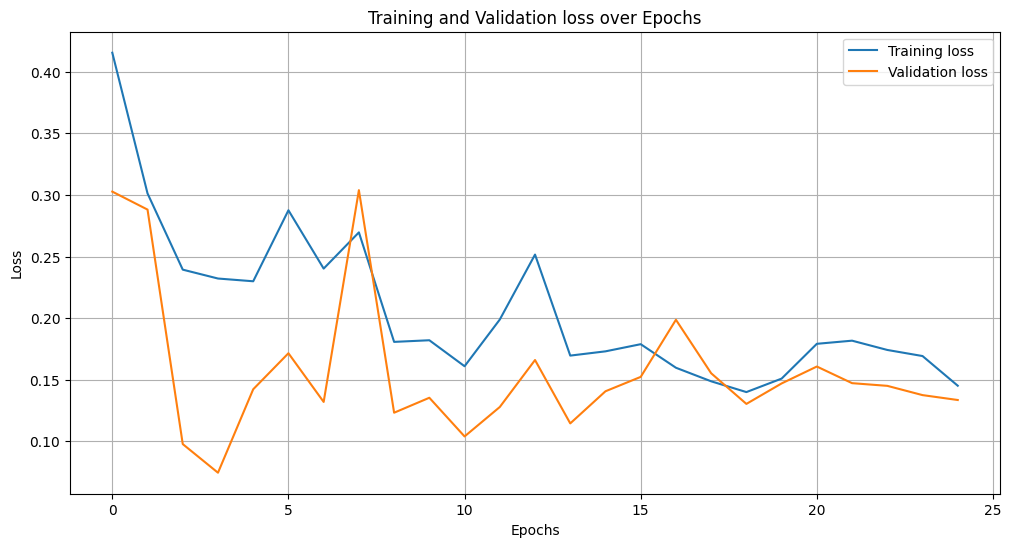

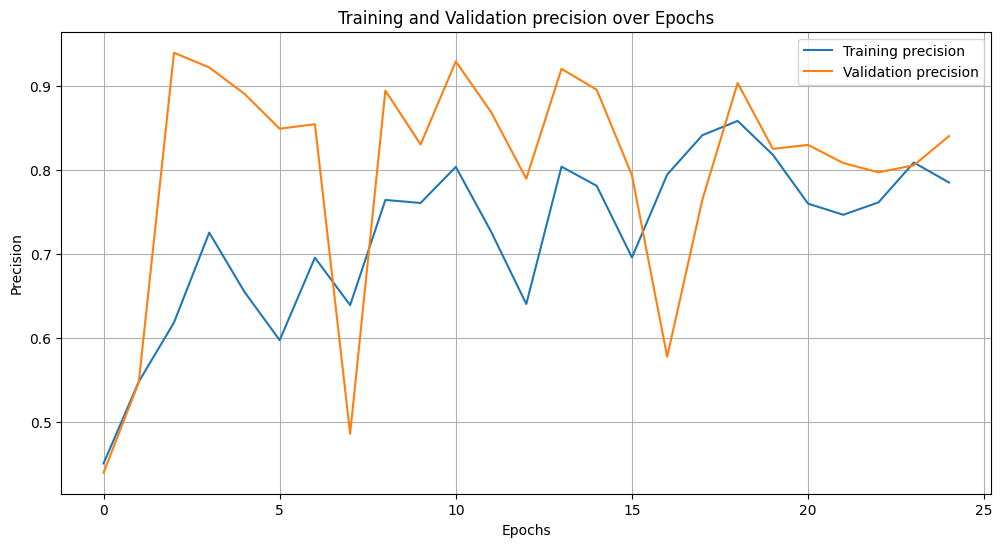

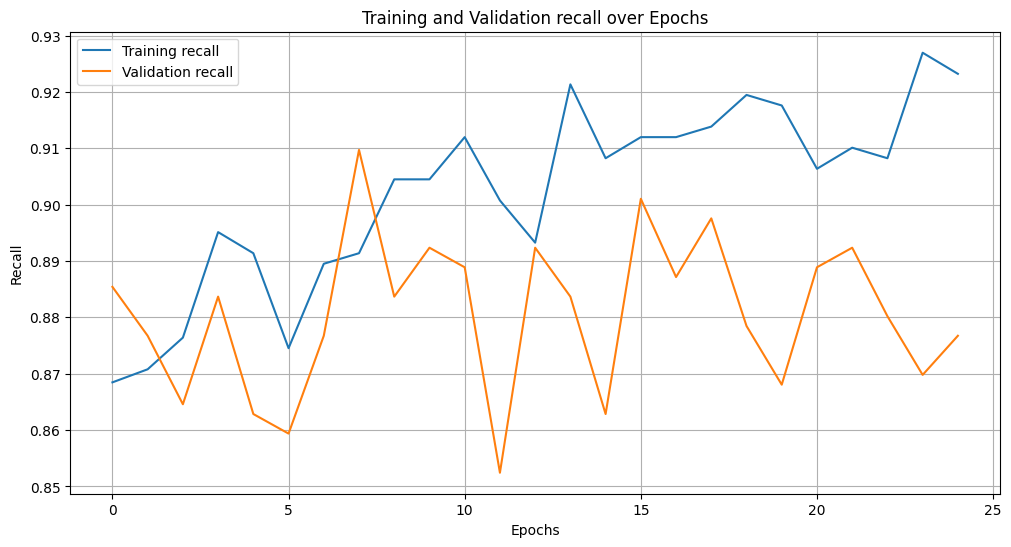

In [66]:
plot_training_history(history,'loss')
plot_training_history(history,'precision')
plot_training_history(history,'recall')

In [67]:
output = model_performance(model6, X_test, y_test)
output

156/156 [==============================] - 0s 1ms/step


Accuracy   Recall  Precision  F1 Score
0   0.98176  0.98176   0.982125  0.981924

In [68]:
results.loc[6] = ['2','80,160','relu,relu',epochs,batch_size,'-','-','-',"Adam_LR(0.01)",end-start,history.history['loss'][-1],history.history['val_loss'][-1],
history.history['precision'][-1],history.history['val_precision'][-1],history.history['recall'][-1],history.history['val_recall'][-1]
                  ,output['Precision'][0],output['Recall'][0]]

results

hidden_layers neurons_HL activation_ftn_HL  epochs  batch_size Batch_Norm  \
0             -          -                 -      10        9982          -   
1             -          -                 -      25        9982          -   
2             -          -                 -      50        9982          -   
3             -          -                 -      25          32          -   
4             1         80              relu      25          32          -   
5             2     80,160         relu,relu      25          32          -   
6             2     80,160         relu,relu      25          32          -   

  Weight_Ini dropout      optimizer  time(secs)  Train_loss  Validation_loss  \
0          -       -            SGD    1.234703    2.031547         1.695963   
1          -       -   SGD_LR(0.01)    3.018212    0.425082         0.430649   
2          -       -   SGD-LR(0.01)    2.985321    0.434529         0.493189   
3          -       -   SGD-LR(0.01)   27.868973    2.379025         2.360701   
4          -       -   SGD_LR(0.01)   41.567311    0.193805         0.144769   
5          -       -   SGD_LR(0.01)   41.894305    0.139635         0.115674   
6          -       -  Adam_LR(0.01)   42.051322    0.145135         0.133539   

   Train_Precision  Validation_Precision  Train_Recall  Validation_Recall  \
0         0.054343              0.056860      0.219101           0.189236   
1         0.402844              0.445483      0.318352           0.248264   
2         0.566038              0.598456      0.280899           0.269097   
3         0.022727              0.023452      0.046816           0.043403   
4         0.608861              0.707650      0.900749           0.899306   
5         0.714076              0.767407      0.911985           0.899306   
6         0.785032              0.840266      0.923221           0.876736   

   Test_Precision  Test_Recall  
0        0.890782     0.764682  
1        0.928051     0.940469  
2        0.942613     0.951694  
3        0.888372     0.844257  
4        0.973761     0.970134  
5        0.978480     0.977551  
6        0.982125     0.981760

##### Model 7

1. Two Hidden layer - ReLu activation function - 80 nodes, 160 nodes
2. Adam Optimizer - learning_rate = 1e-5
3. Loss function - Binary Cross entropy
4. Epochs - 25
5. Batch size - 32
6. Class weights taken into account
7. Output layer - Sigmoid Activaion Function

In [69]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model7 = Sequential()
model7.add(Dense(80,activation="relu",input_dim=X_train.shape[1]))
model7.add(Dense(160,activation="relu"))
model7.add(Dense(1,activation="sigmoid"))
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3280      
                                                                 
 dense_1 (Dense)             (None, 160)               12960     
                                                                 
 dense_2 (Dense)             (None, 1)                 161       
                                                                 
Total params: 16401 (64.07 KB)
Trainable params: 16401 (64.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
#Add the necessary configurations and fit the model

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
model7.compile(optimizer=adam_optimizer,loss='binary_crossentropy',metrics=metrics)
epochs = 25
batch_size = 32
start = time.time()
history = model7.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_val,y_val),class_weight=class_weights)
end = time.time()

Epoch 1/25
312/312 [==============================] - 2s 4ms/step - loss: 0.6800 - precision: 0.1310 - recall: 0.8162 - val_loss: 0.7437 - val_precision: 0.0772 - val_recall: 0.8229
Epoch 2/25
312/312 [==============================] - 1s 3ms/step - loss: 0.6111 - precision: 0.0810 - recall: 0.8596 - val_loss: 0.6941 - val_precision: 0.0943 - val_recall: 0.8733
Epoch 3/25
312/312 [==============================] - 1s 3ms/step - loss: 0.5609 - precision: 0.0976 - recall: 0.8876 - val_loss: 0.6429 - val_precision: 0.1190 - val_recall: 0.8750
Epoch 4/25
312/312 [==============================] - 1s 4ms/step - loss: 0.5231 - precision: 0.1218 - recall: 0.8745 - val_loss: 0.5984 - val_precision: 0.1495 - val_recall: 0.8628
Epoch 5/25
312/312 [==============================] - 1s 4ms/step - loss: 0.4934 - precision: 0.1468 - recall: 0.8689 - val_loss: 0.5612 - val_precision: 0.1705 - val_recall: 0.8594
Epoch 6/25
312/312 [==============================] - 2s 5ms/step - loss: 0.4699 - precisi

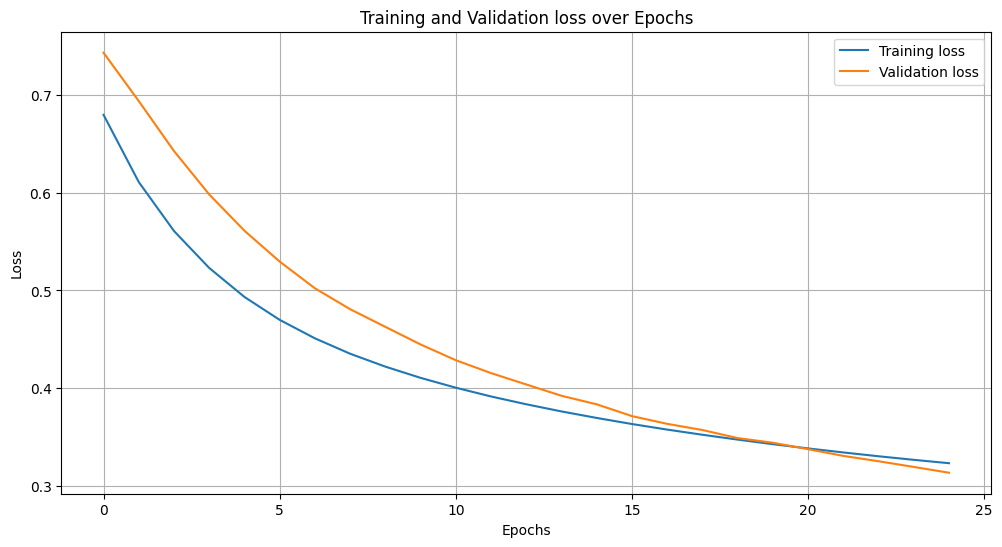

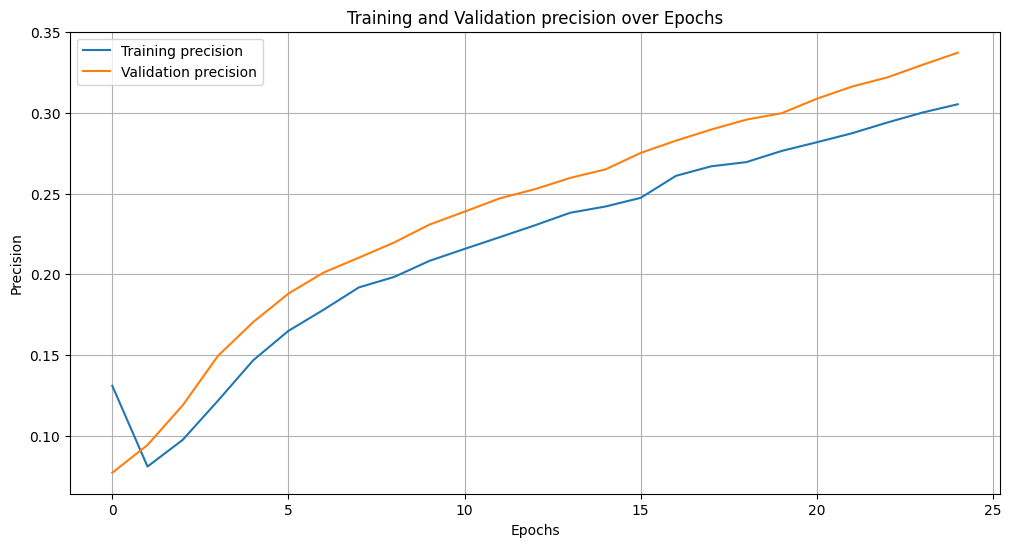

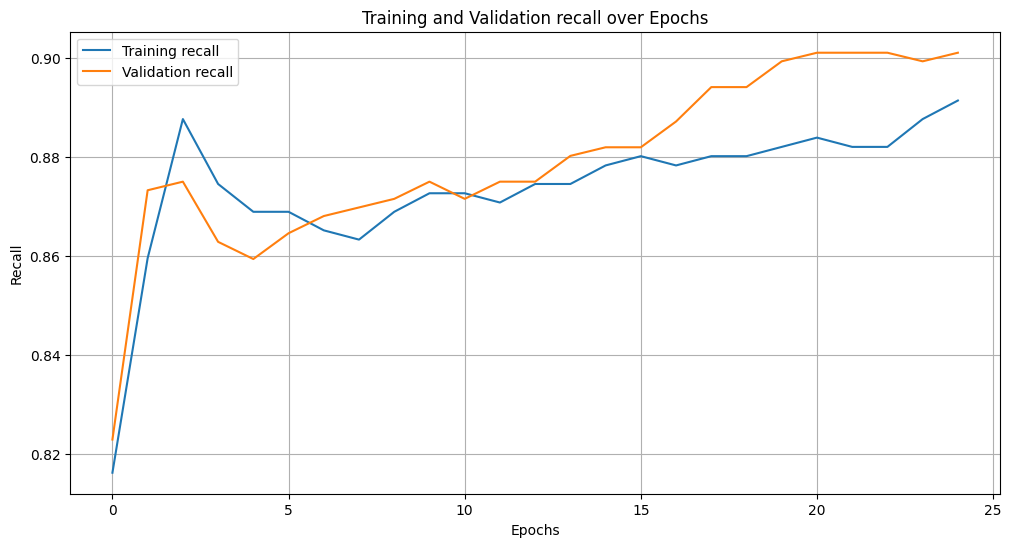

In [71]:
plot_training_history(history,'loss')
plot_training_history(history,'precision')
plot_training_history(history,'recall')

In [72]:
output = model_performance(model7, X_test, y_test)
output

156/156 [==============================] - 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.898577  0.898577   0.953981  0.917995

In [73]:
results.loc[7] = ['2','80,160','relu,relu',epochs,batch_size,'-','-','-',"Adam_LR(le-5)",end-start,history.history['loss'][-1],history.history['val_loss'][-1],
history.history['precision'][-1],history.history['val_precision'][-1],history.history['recall'][-1],history.history['val_recall'][-1]
                  ,output['Precision'][0],output['Recall'][0]]

results

hidden_layers neurons_HL activation_ftn_HL  epochs  batch_size Batch_Norm  \
0             -          -                 -      10        9982          -   
1             -          -                 -      25        9982          -   
2             -          -                 -      50        9982          -   
3             -          -                 -      25          32          -   
4             1         80              relu      25          32          -   
5             2     80,160         relu,relu      25          32          -   
6             2     80,160         relu,relu      25          32          -   
7             2     80,160         relu,relu      25          32          -   

  Weight_Ini dropout      optimizer  time(secs)  Train_loss  Validation_loss  \
0          -       -            SGD    1.234703    2.031547         1.695963   
1          -       -   SGD_LR(0.01)    3.018212    0.425082         0.430649   
2          -       -   SGD-LR(0.01)    2.985321    0.434529         0.493189   
3          -       -   SGD-LR(0.01)   27.868973    2.379025         2.360701   
4          -       -   SGD_LR(0.01)   41.567311    0.193805         0.144769   
5          -       -   SGD_LR(0.01)   41.894305    0.139635         0.115674   
6          -       -  Adam_LR(0.01)   42.051322    0.145135         0.133539   
7          -       -  Adam_LR(le-5)   31.487571    0.322984         0.313230   

   Train_Precision  Validation_Precision  Train_Recall  Validation_Recall  \
0         0.054343              0.056860      0.219101           0.189236   
1         0.402844              0.445483      0.318352           0.248264   
2         0.566038              0.598456      0.280899           0.269097   
3         0.022727              0.023452      0.046816           0.043403   
4         0.608861              0.707650      0.900749           0.899306   
5         0.714076              0.767407      0.911985           0.899306   
6         0.785032              0.840266      0.923221           0.876736   
7         0.305324              0.337232      0.891386           0.901042   

   Test_Precision  Test_Recall  
0        0.890782     0.764682  
1        0.928051     0.940469  
2        0.942613     0.951694  
3        0.888372     0.844257  
4        0.973761     0.970134  
5        0.978480     0.977551  
6        0.982125     0.981760  
7        0.953981     0.898577

##### Model 8

1. Two Hidden layer - ReLu activation function - 80 nodes, 160 nodes
2. Adam Optimizer - learning_rate = 1e-5
3. Loss function - Binary Cross entropy
4. Epochs - 25
5. Batch size - 32
6. Class weights taken into account
7. Output layer - Sigmoid Activaion Function
8. Drop out - 0.3

In [74]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model8 = Sequential([
    Dense(80, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Dropout layer with 30% dropout rate
    Dense(160, activation='relu'),
    Dropout(0.3),  # Dropout layer with 30% dropout rate
    Dense(1, activation='sigmoid')  # For binary classification
])
model8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3280      
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 160)               12960     
                                                                 
 dropout_1 (Dropout)         (None, 160)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 161       
                                                                 
Total params: 16401 (64.07 KB)
Trainable params: 16401 (64.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
#Add the necessary configurations and fit the model

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
model8.compile(optimizer=adam_optimizer,loss='binary_crossentropy',metrics=metrics)
epochs = 25
batch_size = 32
start = time.time()
history = model8.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_val,y_val),class_weight=class_weights)
end = time.time()

Epoch 1/25
312/312 [==============================] - 3s 6ms/step - loss: 0.7853 - precision: 0.1638 - recall: 0.5477 - val_loss: 0.6004 - val_precision: 0.0592 - val_recall: 0.1354
Epoch 2/25
312/312 [==============================] - 2s 5ms/step - loss: 0.7380 - precision: 0.0628 - recall: 0.3165 - val_loss: 0.6149 - val_precision: 0.0877 - val_recall: 0.3264
Epoch 3/25
312/312 [==============================] - 1s 4ms/step - loss: 0.6912 - precision: 0.0761 - recall: 0.4401 - val_loss: 0.6224 - val_precision: 0.1154 - val_recall: 0.5556
Epoch 4/25
312/312 [==============================] - 1s 4ms/step - loss: 0.6641 - precision: 0.0843 - recall: 0.5356 - val_loss: 0.6250 - val_precision: 0.1253 - val_recall: 0.7014
Epoch 5/25
312/312 [==============================] - 1s 4ms/step - loss: 0.6353 - precision: 0.0949 - recall: 0.6236 - val_loss: 0.6221 - val_precision: 0.1339 - val_recall: 0.8038
Epoch 6/25
312/312 [==============================] - 1s 3ms/step - loss: 0.6229 - precisi

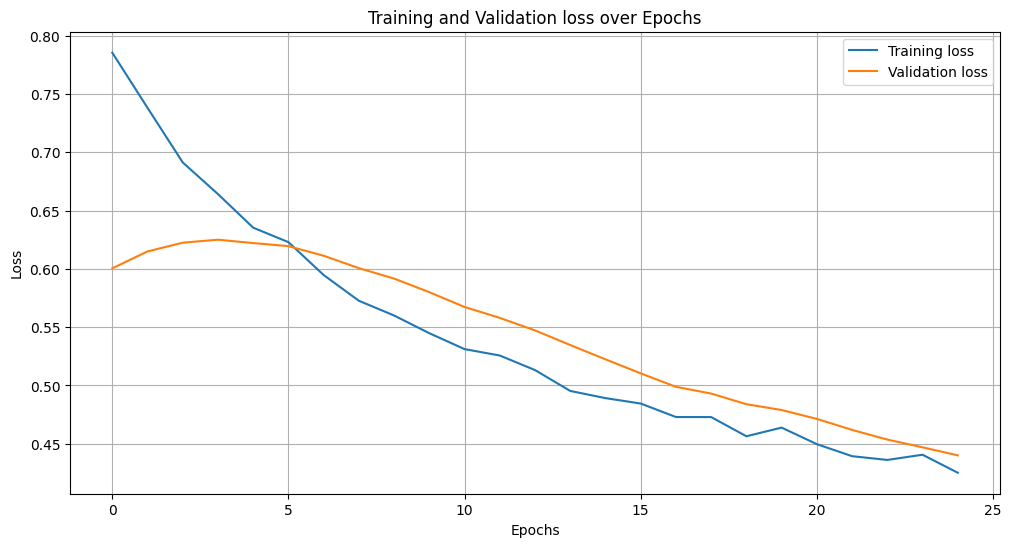

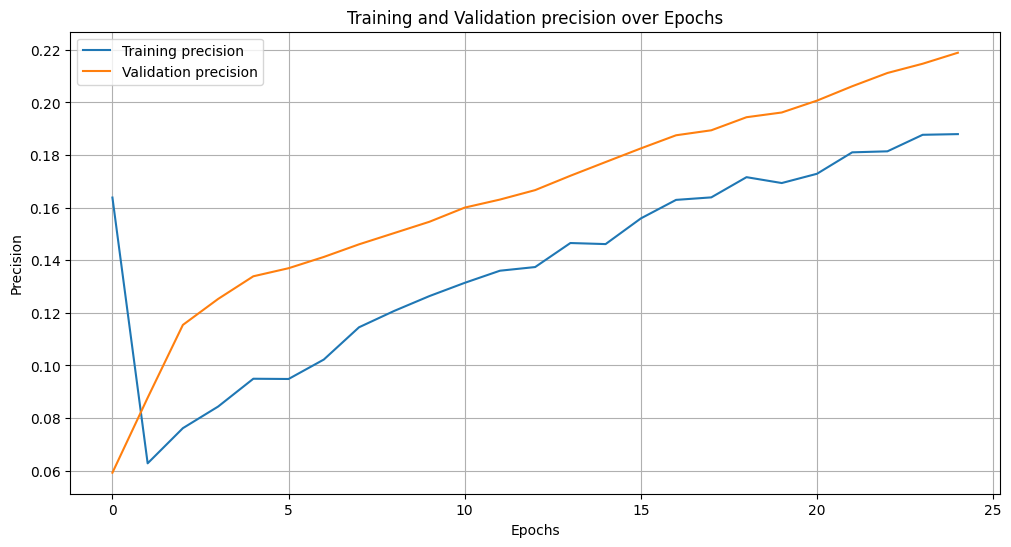

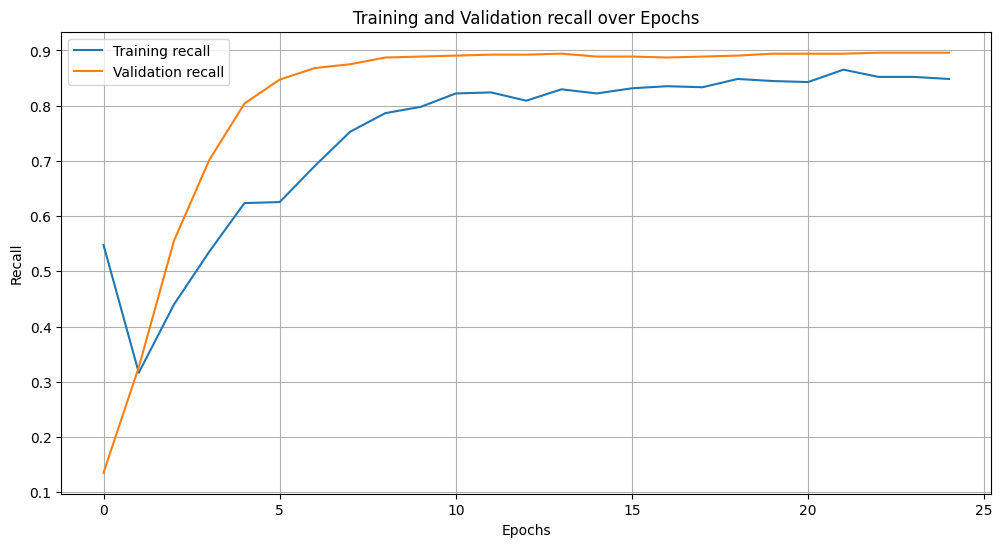

In [76]:
plot_training_history(history,'loss')
plot_training_history(history,'precision')
plot_training_history(history,'recall')

In [77]:
output = model_performance(model8, X_test, y_test)
output

156/156 [==============================] - 0s 2ms/step


Accuracy  Recall  Precision  F1 Score
0     0.818   0.818   0.946604  0.863412

In [78]:
results.loc[8] = ['2','80,160','relu,relu',epochs,batch_size,'-','-','0.3',"Adam_LR(le-5)",end-start,history.history['loss'][-1],history.history['val_loss'][-1],
history.history['precision'][-1],history.history['val_precision'][-1],history.history['recall'][-1],history.history['val_recall'][-1]
                  ,output['Precision'][0],output['Recall'][0]]

results

hidden_layers neurons_HL activation_ftn_HL  epochs  batch_size Batch_Norm  \
0             -          -                 -      10        9982          -   
1             -          -                 -      25        9982          -   
2             -          -                 -      50        9982          -   
3             -          -                 -      25          32          -   
4             1         80              relu      25          32          -   
5             2     80,160         relu,relu      25          32          -   
6             2     80,160         relu,relu      25          32          -   
7             2     80,160         relu,relu      25          32          -   
8             2     80,160         relu,relu      25          32          -   

  Weight_Ini dropout      optimizer  time(secs)  Train_loss  Validation_loss  \
0          -       -            SGD    1.234703    2.031547         1.695963   
1          -       -   SGD_LR(0.01)    3.018212    0.425082         0.430649   
2          -       -   SGD-LR(0.01)    2.985321    0.434529         0.493189   
3          -       -   SGD-LR(0.01)   27.868973    2.379025         2.360701   
4          -       -   SGD_LR(0.01)   41.567311    0.193805         0.144769   
5          -       -   SGD_LR(0.01)   41.894305    0.139635         0.115674   
6          -       -  Adam_LR(0.01)   42.051322    0.145135         0.133539   
7          -       -  Adam_LR(le-5)   31.487571    0.322984         0.313230   
8          -     0.3  Adam_LR(le-5)   42.194058    0.425188         0.440071   

   Train_Precision  Validation_Precision  Train_Recall  Validation_Recall  \
0         0.054343              0.056860      0.219101           0.189236   
1         0.402844              0.445483      0.318352           0.248264   
2         0.566038              0.598456      0.280899           0.269097   
3         0.022727              0.023452      0.046816           0.043403   
4         0.608861              0.707650      0.900749           0.899306   
5         0.714076              0.767407      0.911985           0.899306   
6         0.785032              0.840266      0.923221           0.876736   
7         0.305324              0.337232      0.891386           0.901042   
8         0.187967              0.218922      0.848315           0.895833   

   Test_Precision  Test_Recall  
0        0.890782     0.764682  
1        0.928051     0.940469  
2        0.942613     0.951694  
3        0.888372     0.844257  
4        0.973761     0.970134  
5        0.978480     0.977551  
6        0.982125     0.981760  
7        0.953981     0.898577  
8        0.946604     0.818000

##### Model 9

1. Two Hidden layer - ReLu activation function - 80 nodes, 160 nodes
2. Adam Optimizer - learning_rate = 1e-5
3. Loss function - Binary Cross entropy
4. Epochs - 25
5. Batch size - 32
6. Class weights taken into account
7. Output layer - Sigmoid Activaion Function
8. Drop out - 0.3
9. Batch Normalization added

In [79]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model9 = Sequential([
    Dense(80, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),  # Dropout layer with 30% dropout rate
    Dense(160, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),  # Dropout layer with 30% dropout rate
    Dense(1, activation='sigmoid')  # For binary classification
])
model9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3280      
                                                                 
 batch_normalization (Batch  (None, 80)                320       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 160)               12960     
                                                                 
 batch_normalization_1 (Bat  (None, 160)               640       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 160)               0

In [80]:
#Add the necessary configurations and fit the model

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
model9.compile(optimizer=adam_optimizer,loss='binary_crossentropy',metrics=metrics)
epochs = 25
batch_size = 32
start = time.time()
history = model9.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_val,y_val),class_weight=class_weights)
end = time.time()

Epoch 1/25
312/312 [==============================] - 3s 5ms/step - loss: 0.9218 - precision: 0.1141 - recall: 0.7595 - val_loss: 0.7801 - val_precision: 0.0820 - val_recall: 0.7031
Epoch 2/25
312/312 [==============================] - 2s 5ms/step - loss: 0.8392 - precision: 0.0732 - recall: 0.6873 - val_loss: 0.7897 - val_precision: 0.0940 - val_recall: 0.7847
Epoch 3/25
312/312 [==============================] - 2s 6ms/step - loss: 0.7696 - precision: 0.0799 - recall: 0.7322 - val_loss: 0.7539 - val_precision: 0.1054 - val_recall: 0.8281
Epoch 4/25
312/312 [==============================] - 3s 9ms/step - loss: 0.7185 - precision: 0.0837 - recall: 0.7715 - val_loss: 0.7420 - val_precision: 0.1118 - val_recall: 0.8663
Epoch 5/25
312/312 [==============================] - 2s 7ms/step - loss: 0.7302 - precision: 0.0850 - recall: 0.7509 - val_loss: 0.7191 - val_precision: 0.1195 - val_recall: 0.8819
Epoch 6/25
312/312 [==============================] - 2s 6ms/step - loss: 0.6561 - precisi

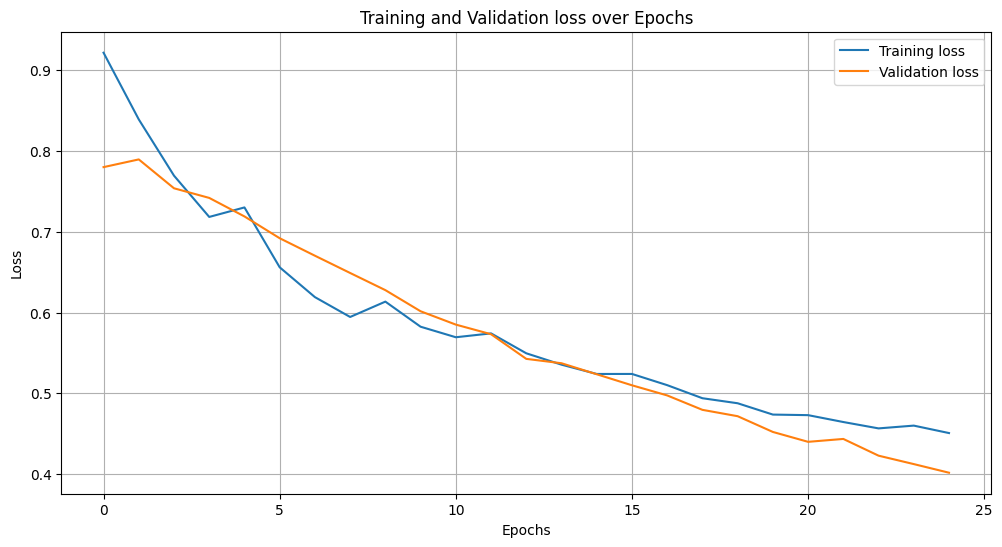

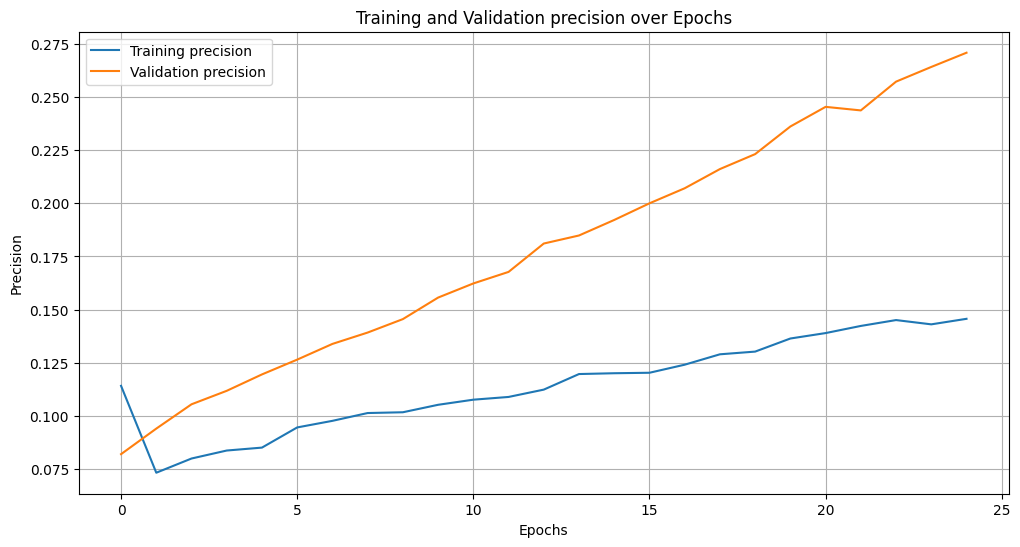

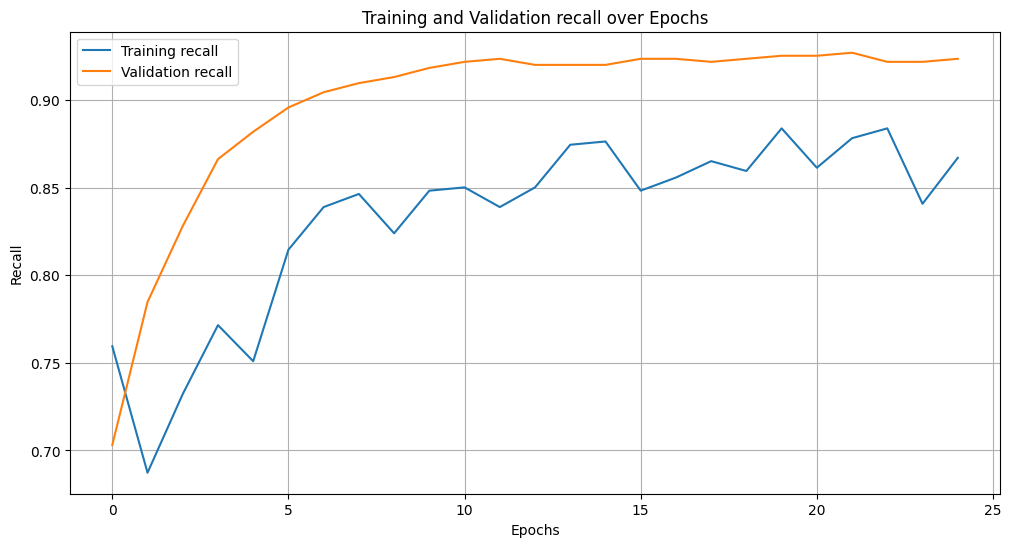

In [81]:
plot_training_history(history,'loss')
plot_training_history(history,'precision')
plot_training_history(history,'recall')

In [82]:
output = model_performance(model9, X_test, y_test)
output

156/156 [==============================] - 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.854279  0.854279   0.951479  0.888202

In [83]:
results.loc[9] = ['2','80,160','relu,relu',epochs,batch_size,'yes','-','0.3',"Adam_LR(le-5)",end-start,history.history['loss'][-1],history.history['val_loss'][-1],
history.history['precision'][-1],history.history['val_precision'][-1],history.history['recall'][-1],history.history['val_recall'][-1]
                  ,output['Precision'][0],output['Recall'][0]]

results

hidden_layers neurons_HL activation_ftn_HL  epochs  batch_size Batch_Norm  \
0             -          -                 -      10        9982          -   
1             -          -                 -      25        9982          -   
2             -          -                 -      50        9982          -   
3             -          -                 -      25          32          -   
4             1         80              relu      25          32          -   
5             2     80,160         relu,relu      25          32          -   
6             2     80,160         relu,relu      25          32          -   
7             2     80,160         relu,relu      25          32          -   
8             2     80,160         relu,relu      25          32          -   
9             2     80,160         relu,relu      25          32        yes   

  Weight_Ini dropout      optimizer  time(secs)  Train_loss  Validation_loss  \
0          -       -            SGD    1.234703    2.031547         1.695963   
1          -       -   SGD_LR(0.01)    3.018212    0.425082         0.430649   
2          -       -   SGD-LR(0.01)    2.985321    0.434529         0.493189   
3          -       -   SGD-LR(0.01)   27.868973    2.379025         2.360701   
4          -       -   SGD_LR(0.01)   41.567311    0.193805         0.144769   
5          -       -   SGD_LR(0.01)   41.894305    0.139635         0.115674   
6          -       -  Adam_LR(0.01)   42.051322    0.145135         0.133539   
7          -       -  Adam_LR(le-5)   31.487571    0.322984         0.313230   
8          -     0.3  Adam_LR(le-5)   42.194058    0.425188         0.440071   
9          -     0.3  Adam_LR(le-5)   42.708833    0.450809         0.401692   

   Train_Precision  Validation_Precision  Train_Recall  Validation_Recall  \
0         0.054343              0.056860      0.219101           0.189236   
1         0.402844              0.445483      0.318352           0.248264   
2         0.566038              0.598456      0.280899           0.269097   
3         0.022727              0.023452      0.046816           0.043403   
4         0.608861              0.707650      0.900749           0.899306   
5         0.714076              0.767407      0.911985           0.899306   
6         0.785032              0.840266      0.923221           0.876736   
7         0.305324              0.337232      0.891386           0.901042   
8         0.187967              0.218922      0.848315           0.895833   
9         0.145643              0.270876      0.867041           0.923611   

   Test_Precision  Test_Recall  
0        0.890782     0.764682  
1        0.928051     0.940469  
2        0.942613     0.951694  
3        0.888372     0.844257  
4        0.973761     0.970134  
5        0.978480     0.977551  
6        0.982125     0.981760  
7        0.953981     0.898577  
8        0.946604     0.818000  
9        0.951479     0.854279

##### Model 10

1. Two Hidden layer - ReLu activation function - 80 nodes, 160 nodes
2. Adam Optimizer - learning_rate = 1e-5
3. Loss function - Binary Cross entropy
4. Epochs - 25
5. Batch size - 32
6. Class weights taken into account
7. Output layer - Sigmoid Activaion Function
8. Drop out - 0.3
9. Batch Normalization added
10. Weight Initialization done - He (HL1), Glorot (HL2), RandomNormal (Output)

In [84]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model10 = Sequential([
    Dense(80, activation='relu', kernel_initializer=HeNormal(), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),  # Dropout layer with 30% dropout rate
    Dense(160, activation='relu', kernel_initializer=GlorotUniform()),
    BatchNormalization(),
    Dropout(0.3),  # Dropout layer with 30% dropout rate
    Dense(1, activation='sigmoid', kernel_initializer=RandomNormal())  # For binary classification
])
model10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3280      
                                                                 
 batch_normalization (Batch  (None, 80)                320       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 160)               12960     
                                                                 
 batch_normalization_1 (Bat  (None, 160)               640       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 160)               0

In [85]:
#Add the necessary configurations and fit the model

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
model10.compile(optimizer=adam_optimizer,loss='binary_crossentropy',metrics=metrics)
epochs = 25
batch_size = 32
start = time.time()
history = model10.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_val,y_val),class_weight=class_weights)
end = time.time()

Epoch 1/25
312/312 [==============================] - 3s 5ms/step - loss: 0.7269 - precision: 0.1210 - recall: 0.7658 - val_loss: 0.7111 - val_precision: 0.0803 - val_recall: 0.7170
Epoch 2/25
312/312 [==============================] - 1s 4ms/step - loss: 0.6642 - precision: 0.0736 - recall: 0.6948 - val_loss: 0.7010 - val_precision: 0.0942 - val_recall: 0.8507
Epoch 3/25
312/312 [==============================] - 1s 5ms/step - loss: 0.6309 - precision: 0.0831 - recall: 0.7865 - val_loss: 0.6854 - val_precision: 0.1016 - val_recall: 0.8906
Epoch 4/25
312/312 [==============================] - 1s 4ms/step - loss: 0.5977 - precision: 0.0886 - recall: 0.8221 - val_loss: 0.6756 - val_precision: 0.1084 - val_recall: 0.9045
Epoch 5/25
312/312 [==============================] - 2s 5ms/step - loss: 0.5854 - precision: 0.0906 - recall: 0.8258 - val_loss: 0.6626 - val_precision: 0.1170 - val_recall: 0.9184
Epoch 6/25
312/312 [==============================] - 2s 6ms/step - loss: 0.5702 - precisi

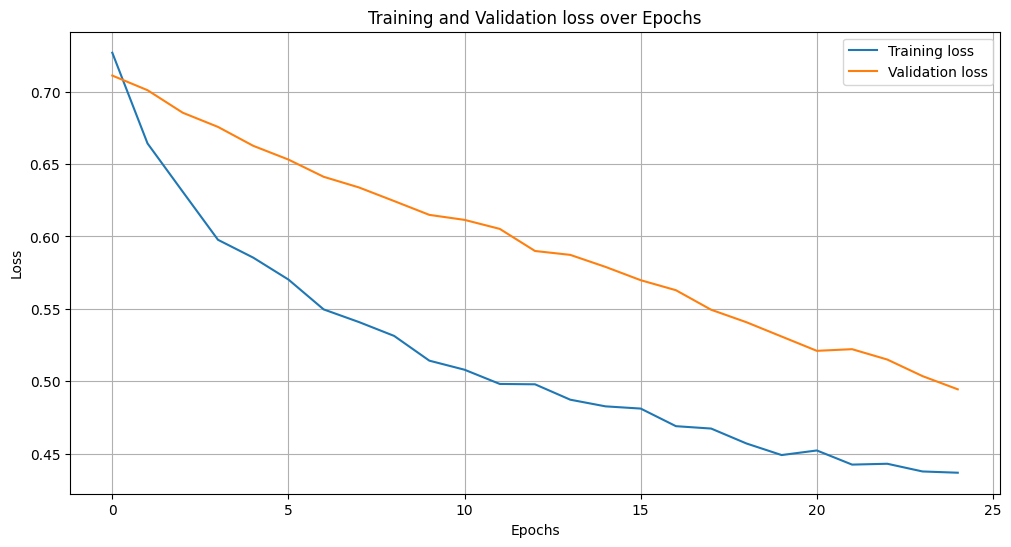

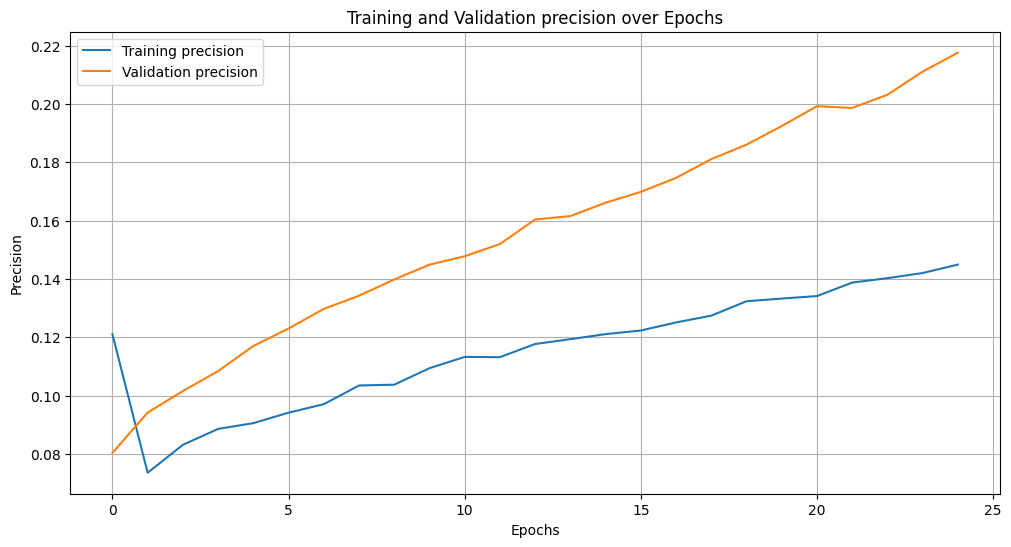

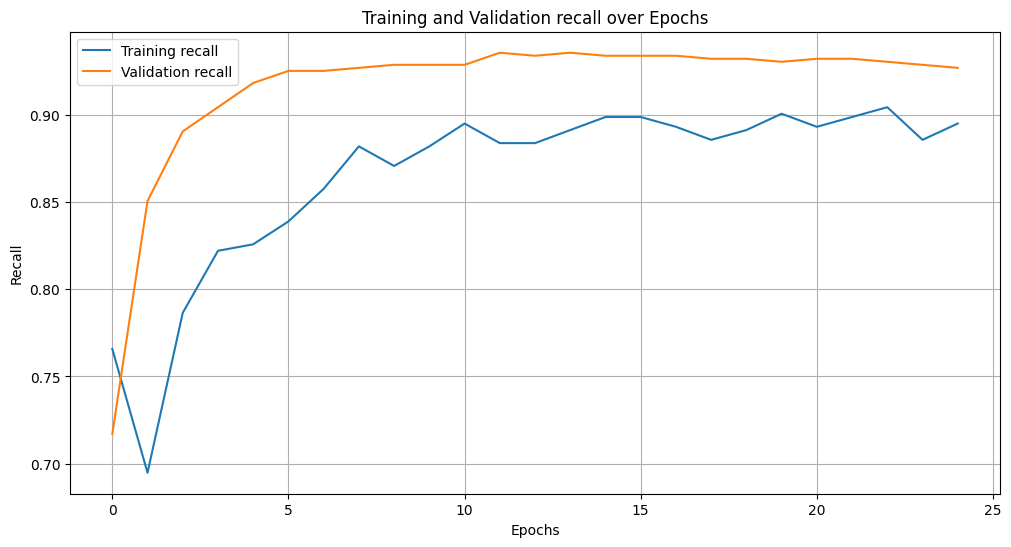

In [86]:
plot_training_history(history,'loss')
plot_training_history(history,'precision')
plot_training_history(history,'recall')

In [87]:
output = model_performance(model10, X_test, y_test)
output

156/156 [==============================] - 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.801764  0.801764   0.948019  0.852611

In [88]:
results.loc[10] = ['2','80,160','relu,relu',epochs,batch_size,'yes','he/glorot/randnorm','0.3',"Adam_LR(le-5)",end-start,history.history['loss'][-1],history.history['val_loss'][-1],
history.history['precision'][-1],history.history['val_precision'][-1],history.history['recall'][-1],history.history['val_recall'][-1]
                   ,output['Precision'][0],output['Recall'][0]]

results

hidden_layers neurons_HL activation_ftn_HL  epochs  batch_size Batch_Norm  \
0              -          -                 -      10        9982          -   
1              -          -                 -      25        9982          -   
2              -          -                 -      50        9982          -   
3              -          -                 -      25          32          -   
4              1         80              relu      25          32          -   
5              2     80,160         relu,relu      25          32          -   
6              2     80,160         relu,relu      25          32          -   
7              2     80,160         relu,relu      25          32          -   
8              2     80,160         relu,relu      25          32          -   
9              2     80,160         relu,relu      25          32        yes   
10             2     80,160         relu,relu      25          32        yes   

            Weight_Ini dropout      optimizer  time(secs)  Train_loss  \
0                    -       -            SGD    1.234703    2.031547   
1                    -       -   SGD_LR(0.01)    3.018212    0.425082   
2                    -       -   SGD-LR(0.01)    2.985321    0.434529   
3                    -       -   SGD-LR(0.01)   27.868973    2.379025   
4                    -       -   SGD_LR(0.01)   41.567311    0.193805   
5                    -       -   SGD_LR(0.01)   41.894305    0.139635   
6                    -       -  Adam_LR(0.01)   42.051322    0.145135   
7                    -       -  Adam_LR(le-5)   31.487571    0.322984   
8                    -     0.3  Adam_LR(le-5)   42.194058    0.425188   
9                    -     0.3  Adam_LR(le-5)   42.708833    0.450809   
10  he/glorot/randnorm     0.3  Adam_LR(le-5)   37.227174    0.436856   

    Validation_loss  Train_Precision  Validation_Precision  Train_Recall  \
0          1.695963         0.054343              0.056860      0.219101   
1          0.430649         0.402844              0.445483      0.318352   
2          0.493189         0.566038              0.598456      0.280899   
3          2.360701         0.022727              0.023452      0.046816   
4          0.144769         0.608861              0.707650      0.900749   
5          0.115674         0.714076              0.767407      0.911985   
6          0.133539         0.785032              0.840266      0.923221   
7          0.313230         0.305324              0.337232      0.891386   
8          0.440071         0.187967              0.218922      0.848315   
9          0.401692         0.145643              0.270876      0.867041   
10         0.494443         0.144936              0.217604      0.895131   

    Validation_Recall  Test_Precision  Test_Recall  
0            0.189236        0.890782     0.764682  
1            0.248264        0.928051     0.940469  
2            0.269097        0.942613     0.951694  
3            0.043403        0.888372     0.844257  
4            0.899306        0.973761     0.970134  
5            0.899306        0.978480     0.977551  
6            0.876736        0.982125     0.981760  
7            0.901042        0.953981     0.898577  
8            0.895833        0.946604     0.818000  
9            0.923611        0.951479     0.854279  
10           0.927083        0.948019     0.801764

##### Model 11

1. Two Hidden layer - ReLu activation function - 80 nodes, 160 nodes
2. Adam Optimizer - learning_rate = 1e-5
3. Loss function - Binary Cross entropy
4. Epochs - 25
5. Batch size - 32
6. Class weights taken into account
7. Output layer - Sigmoid Activaion Function
8. Drop out - 0.3
9. Batch Normalization added
10. Weight Initialization done - He (HL1), Glorot (HL2), RandomNormal (Output)
11. Regularization - L1 and L2

In [89]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model11 = Sequential([
    Dense(80, activation='relu', kernel_initializer=HeNormal(),kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),  # Dropout layer with 30% dropout rate
    Dense(160, activation='relu', kernel_initializer=GlorotUniform(), kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    Dropout(0.3),  # Dropout layer with 30% dropout rate
    Dense(1, activation='sigmoid', kernel_initializer=RandomNormal(), kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))  # For binary classification
])
model11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3280      
                                                                 
 batch_normalization (Batch  (None, 80)                320       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 160)               12960     
                                                                 
 batch_normalization_1 (Bat  (None, 160)               640       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 160)               0

In [90]:
#Add the necessary configurations and fit the model

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
model11.compile(optimizer=adam_optimizer,loss='binary_crossentropy',metrics=metrics)
epochs = 25
batch_size = 32
start = time.time()
history = model11.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_val,y_val),class_weight=class_weights)
end = time.time()

Epoch 1/25
312/312 [==============================] - 3s 6ms/step - loss: 0.7786 - precision: 0.1103 - recall: 0.7459 - val_loss: 0.7860 - val_precision: 0.0763 - val_recall: 0.7517
Epoch 2/25
312/312 [==============================] - 1s 4ms/step - loss: 0.7263 - precision: 0.0701 - recall: 0.6573 - val_loss: 0.7735 - val_precision: 0.0867 - val_recall: 0.8264
Epoch 3/25
312/312 [==============================] - 1s 5ms/step - loss: 0.6839 - precision: 0.0802 - recall: 0.7472 - val_loss: 0.7607 - val_precision: 0.0961 - val_recall: 0.8698
Epoch 4/25
312/312 [==============================] - 1s 4ms/step - loss: 0.6414 - precision: 0.0883 - recall: 0.7921 - val_loss: 0.7482 - val_precision: 0.1061 - val_recall: 0.8924
Epoch 5/25
312/312 [==============================] - 1s 5ms/step - loss: 0.6184 - precision: 0.0943 - recall: 0.8333 - val_loss: 0.7419 - val_precision: 0.1114 - val_recall: 0.9010
Epoch 6/25
312/312 [==============================] - 2s 7ms/step - loss: 0.5992 - precisi

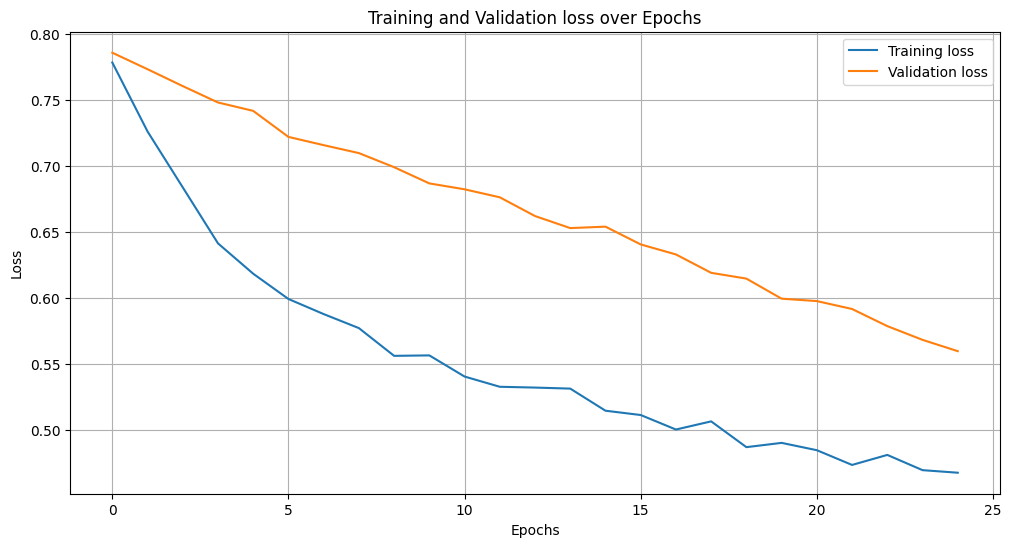

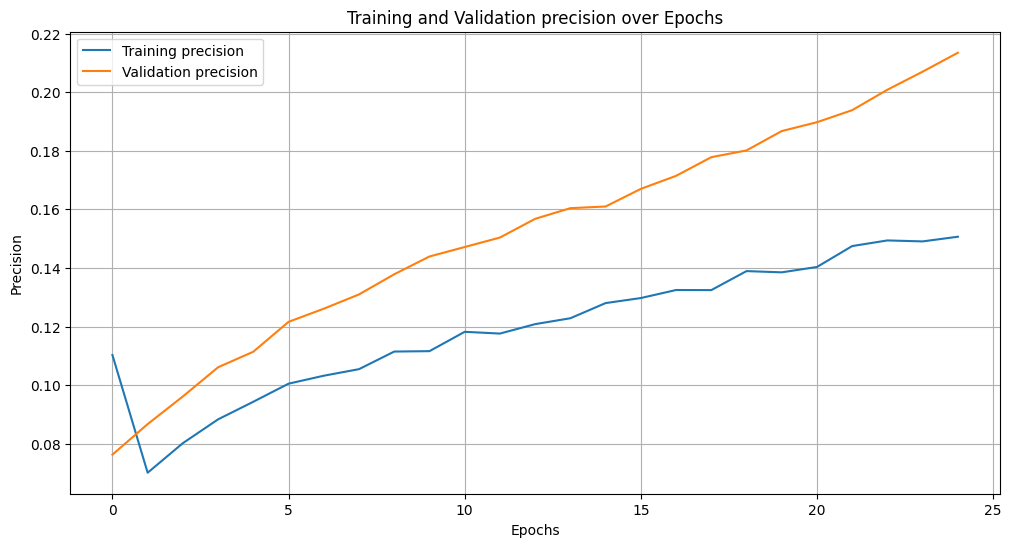

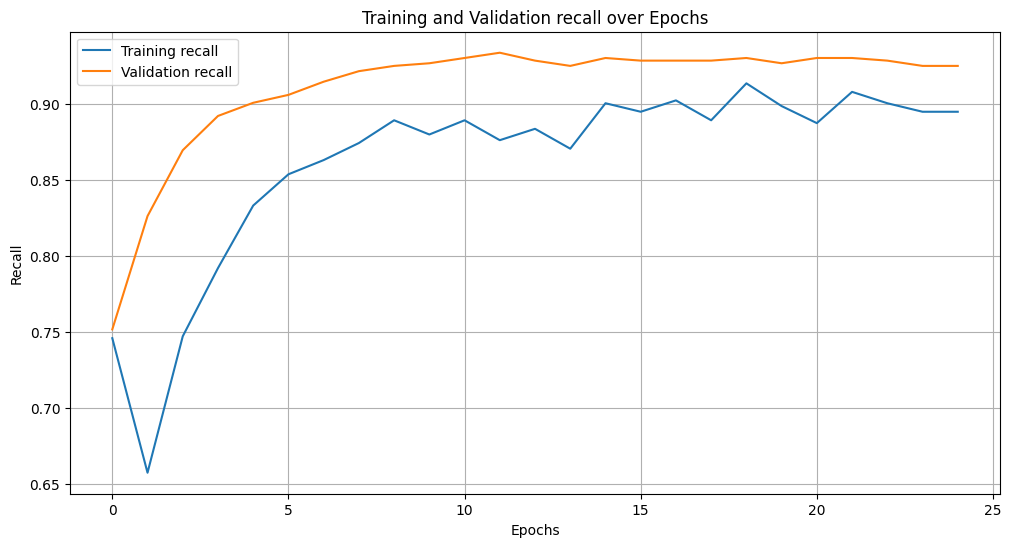

In [91]:
plot_training_history(history,'loss')
plot_training_history(history,'precision')
plot_training_history(history,'recall')

In [92]:
output = model_performance(model11, X_test, y_test)
print(output)
output_1 = model_performance(model11, X_train, y_train)
print(output_1)

156/156 [==============================] - 0s 1ms/step
   Accuracy    Recall  Precision  F1 Score
0  0.797354  0.797354   0.946944  0.849524
312/312 [==============================] - 0s 1ms/step
   Accuracy    Recall  Precision  F1 Score
0  0.794931  0.794931   0.951182  0.849408


In [93]:
results.loc[11] = ['2','80,160','relu,relu',epochs,batch_size,'yes','he/glorot/randnorm','0.3',"Adam_LR(le-5)/L1,L2",end-start,history.history['loss'][-1],history.history['val_loss'][-1],
history.history['precision'][-1],history.history['val_precision'][-1],history.history['recall'][-1],history.history['val_recall'][-1]
                   ,output['Precision'][0],output['Recall'][0]]

results

hidden_layers neurons_HL activation_ftn_HL  epochs  batch_size Batch_Norm  \
0              -          -                 -      10        9982          -   
1              -          -                 -      25        9982          -   
2              -          -                 -      50        9982          -   
3              -          -                 -      25          32          -   
4              1         80              relu      25          32          -   
5              2     80,160         relu,relu      25          32          -   
6              2     80,160         relu,relu      25          32          -   
7              2     80,160         relu,relu      25          32          -   
8              2     80,160         relu,relu      25          32          -   
9              2     80,160         relu,relu      25          32        yes   
10             2     80,160         relu,relu      25          32        yes   
11             2     80,160         relu,relu      25          32        yes   

            Weight_Ini dropout            optimizer  time(secs)  Train_loss  \
0                    -       -                  SGD    1.234703    2.031547   
1                    -       -         SGD_LR(0.01)    3.018212    0.425082   
2                    -       -         SGD-LR(0.01)    2.985321    0.434529   
3                    -       -         SGD-LR(0.01)   27.868973    2.379025   
4                    -       -         SGD_LR(0.01)   41.567311    0.193805   
5                    -       -         SGD_LR(0.01)   41.894305    0.139635   
6                    -       -        Adam_LR(0.01)   42.051322    0.145135   
7                    -       -        Adam_LR(le-5)   31.487571    0.322984   
8                    -     0.3        Adam_LR(le-5)   42.194058    0.425188   
9                    -     0.3        Adam_LR(le-5)   42.708833    0.450809   
10  he/glorot/randnorm     0.3        Adam_LR(le-5)   37.227174    0.436856   
11  he/glorot/randnorm     0.3  Adam_LR(le-5)/L1,L2   42.635221    0.467466   

    Validation_loss  Train_Precision  Validation_Precision  Train_Recall  \
0          1.695963         0.054343              0.056860      0.219101   
1          0.430649         0.402844              0.445483      0.318352   
2          0.493189         0.566038              0.598456      0.280899   
3          2.360701         0.022727              0.023452      0.046816   
4          0.144769         0.608861              0.707650      0.900749   
5          0.115674         0.714076              0.767407      0.911985   
6          0.133539         0.785032              0.840266      0.923221   
7          0.313230         0.305324              0.337232      0.891386   
8          0.440071         0.187967              0.218922      0.848315   
9          0.401692         0.145643              0.270876      0.867041   
10         0.494443         0.144936              0.217604      0.895131   
11         0.559652         0.150646              0.213456      0.895131   

    Validation_Recall  Test_Precision  Test_Recall  
0            0.189236        0.890782     0.764682  
1            0.248264        0.928051     0.940469  
2            0.269097        0.942613     0.951694  
3            0.043403        0.888372     0.844257  
4            0.899306        0.973761     0.970134  
5            0.899306        0.978480     0.977551  
6            0.876736        0.982125     0.981760  
7            0.901042        0.953981     0.898577  
8            0.895833        0.946604     0.818000  
9            0.923611        0.951479     0.854279  
10           0.927083        0.948019     0.801764  
11           0.925347        0.946944     0.797354

##### Model 12

1. Two Hidden layer - ReLu activation function - 80 nodes, 160 nodes
2. AdaGrad Optimizer - learning_rate = 0.01
3. Loss function - Binary Cross entropy
4. Epochs - 25
5. Batch size - 32
6. Class weights taken into account
7. Output layer - Sigmoid Activaion Function
8. Drop out - 0.3
9. Batch Normalization added
10. Weight Initialization done - He (HL1), Glorot (HL2), RandomNormal (Output)
11. Regularization - L1 and L2

In [94]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model12 = Sequential([
    Dense(80, activation='relu', kernel_initializer=HeNormal(),kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),  # Dropout layer with 30% dropout rate
    Dense(160, activation='relu', kernel_initializer=GlorotUniform(), kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    Dropout(0.3),  # Dropout layer with 30% dropout rate
    Dense(1, activation='sigmoid', kernel_initializer=RandomNormal(), kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))  # For binary classification
])
model12.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3280      
                                                                 
 batch_normalization (Batch  (None, 80)                320       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 160)               12960     
                                                                 
 batch_normalization_1 (Bat  (None, 160)               640       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 160)               0

In [95]:
#Add the necessary configurations and fit the model

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
# Customize AdaGrad optimizer
adagrad_optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
model12.compile(optimizer=adagrad_optimizer,loss='binary_crossentropy',metrics=metrics)
epochs = 25
batch_size = 32
start = time.time()
history = model12.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_val,y_val),class_weight=class_weights)
end = time.time()

Epoch 1/25
312/312 [==============================] - 3s 5ms/step - loss: 0.5063 - precision: 0.1732 - recall: 0.8964 - val_loss: 0.4447 - val_precision: 0.3110 - val_recall: 0.9028
Epoch 2/25
312/312 [==============================] - 1s 4ms/step - loss: 0.4198 - precision: 0.2149 - recall: 0.8727 - val_loss: 0.3382 - val_precision: 0.4240 - val_recall: 0.8958
Epoch 3/25
312/312 [==============================] - 1s 4ms/step - loss: 0.3685 - precision: 0.2667 - recall: 0.8801 - val_loss: 0.2859 - val_precision: 0.5129 - val_recall: 0.8958
Epoch 4/25
312/312 [==============================] - 2s 8ms/step - loss: 0.3500 - precision: 0.3031 - recall: 0.8652 - val_loss: 0.2550 - val_precision: 0.5677 - val_recall: 0.8958
Epoch 5/25
312/312 [==============================] - 2s 5ms/step - loss: 0.3295 - precision: 0.3433 - recall: 0.8801 - val_loss: 0.2303 - val_precision: 0.6273 - val_recall: 0.8941
Epoch 6/25
312/312 [==============================] - 1s 4ms/step - loss: 0.3162 - precisi

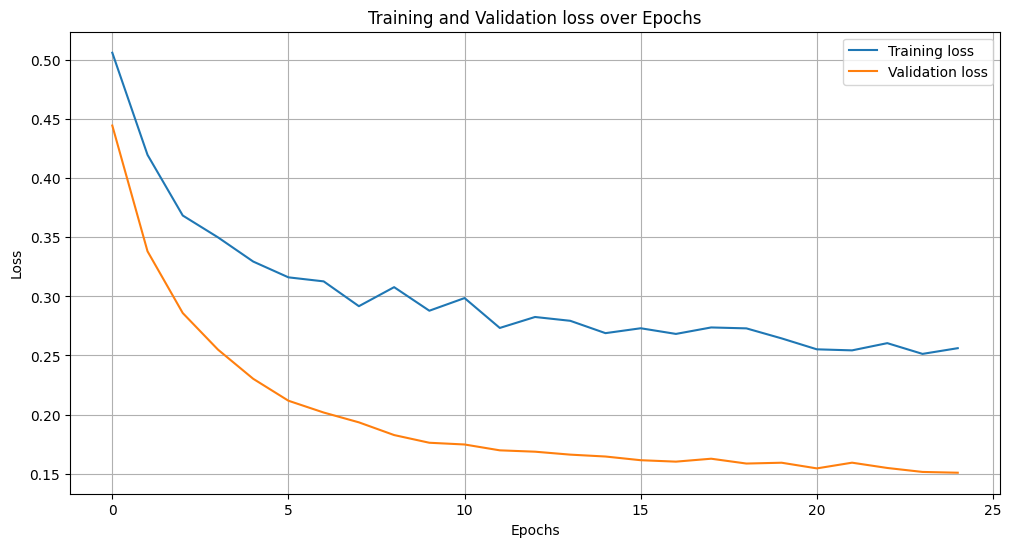

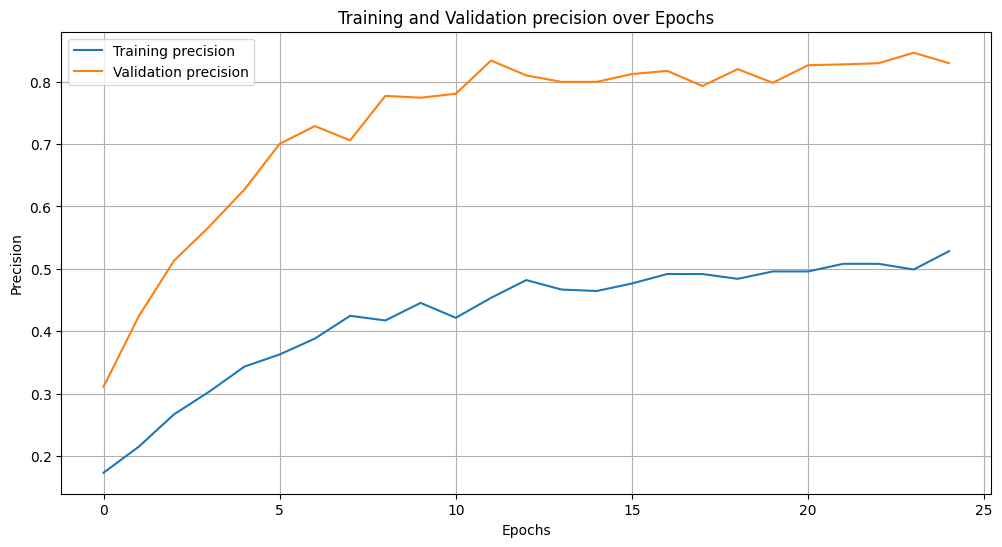

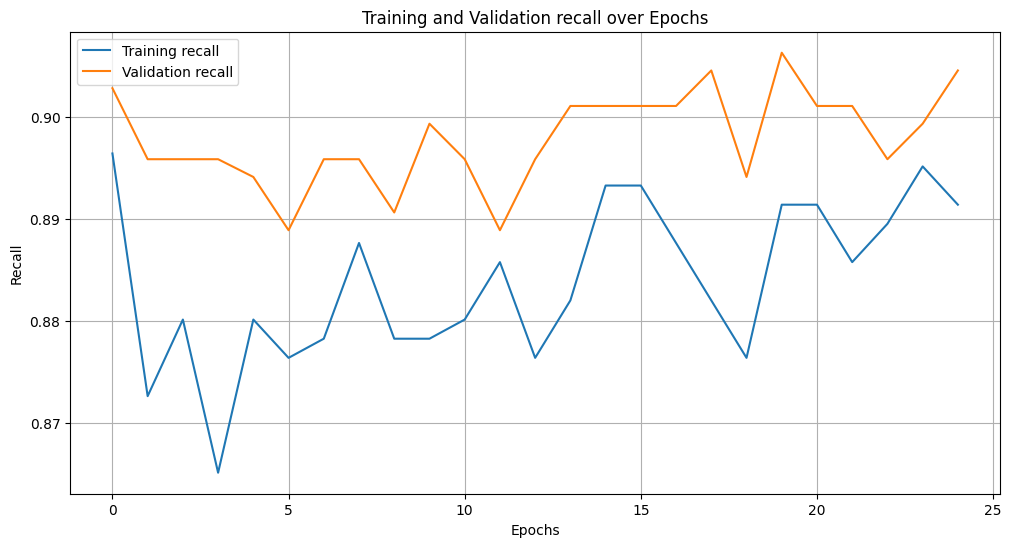

In [96]:
plot_training_history(history,'loss')
plot_training_history(history,'precision')
plot_training_history(history,'recall')

In [97]:
output = model_performance(model12, X_test, y_test)
print(output)
output_1 = model_performance(model12, X_train, y_train)
print(output_1)

156/156 [==============================] - 0s 1ms/step
   Accuracy    Recall  Precision  F1 Score
0  0.980758  0.980758   0.981178  0.980946
312/312 [==============================] - 0s 1ms/step
   Accuracy   Recall  Precision  F1 Score
0   0.98317  0.98317   0.984289  0.983591


In [98]:
results.loc[12] = ['2','80,160','relu,relu',epochs,batch_size,'yes','he/glorot/randnorm','0.3',"Adagrad_LR(0.01)/L1,L2",end-start,history.history['loss'][-1],history.history['val_loss'][-1],
history.history['precision'][-1],history.history['val_precision'][-1],history.history['recall'][-1],history.history['val_recall'][-1]
                   ,output['Precision'][0],output['Recall'][0]]

results

hidden_layers neurons_HL activation_ftn_HL  epochs  batch_size Batch_Norm  \
0              -          -                 -      10        9982          -   
1              -          -                 -      25        9982          -   
2              -          -                 -      50        9982          -   
3              -          -                 -      25          32          -   
4              1         80              relu      25          32          -   
5              2     80,160         relu,relu      25          32          -   
6              2     80,160         relu,relu      25          32          -   
7              2     80,160         relu,relu      25          32          -   
8              2     80,160         relu,relu      25          32          -   
9              2     80,160         relu,relu      25          32        yes   
10             2     80,160         relu,relu      25          32        yes   
11             2     80,160         relu,relu      25          32        yes   
12             2     80,160         relu,relu      25          32        yes   

            Weight_Ini dropout               optimizer  time(secs)  \
0                    -       -                     SGD    1.234703   
1                    -       -            SGD_LR(0.01)    3.018212   
2                    -       -            SGD-LR(0.01)    2.985321   
3                    -       -            SGD-LR(0.01)   27.868973   
4                    -       -            SGD_LR(0.01)   41.567311   
5                    -       -            SGD_LR(0.01)   41.894305   
6                    -       -           Adam_LR(0.01)   42.051322   
7                    -       -           Adam_LR(le-5)   31.487571   
8                    -     0.3           Adam_LR(le-5)   42.194058   
9                    -     0.3           Adam_LR(le-5)   42.708833   
10  he/glorot/randnorm     0.3           Adam_LR(le-5)   37.227174   
11  he/glorot/randnorm     0.3     Adam_LR(le-5)/L1,L2   42.635221   
12  he/glorot/randnorm     0.3  Adagrad_LR(0.01)/L1,L2   37.517705   

    Train_loss  Validation_loss  Train_Precision  Validation_Precision  \
0     2.031547         1.695963         0.054343              0.056860   
1     0.425082         0.430649         0.402844              0.445483   
2     0.434529         0.493189         0.566038              0.598456   
3     2.379025         2.360701         0.022727              0.023452   
4     0.193805         0.144769         0.608861              0.707650   
5     0.139635         0.115674         0.714076              0.767407   
6     0.145135         0.133539         0.785032              0.840266   
7     0.322984         0.313230         0.305324              0.337232   
8     0.425188         0.440071         0.187967              0.218922   
9     0.450809         0.401692         0.145643              0.270876   
10    0.436856         0.494443         0.144936              0.217604   
11    0.467466         0.559652         0.150646              0.213456   
12    0.256188         0.150753         0.528302              0.829618   

    Train_Recall  Validation_Recall  Test_Precision  Test_Recall  
0       0.219101           0.189236        0.890782     0.764682  
1       0.318352           0.248264        0.928051     0.940469  
2       0.280899           0.269097        0.942613     0.951694  
3       0.046816           0.043403        0.888372     0.844257  
4       0.900749           0.899306        0.973761     0.970134  
5       0.911985           0.899306        0.978480     0.977551  
6       0.923221           0.876736        0.982125     0.981760  
7       0.891386           0.901042        0.953981     0.898577  
8       0.848315           0.895833        0.946604     0.818000  
9       0.867041           0.923611        0.951479     0.854279  
10      0.895131           0.927083        0.948019     0.801764  
11      0.895131           0.925347        0.946944     0.79

##### Model 13 (Model 11 with epoch change)

1. Two Hidden layer - ReLu activation function - 80 nodes, 160 nodes
2. Adam Optimizer - learning_rate = 1e-5
3. Loss function - Binary Cross entropy
4. Epochs - 50
5. Batch size - 32
6. Class weights taken into account
7. Output layer - Sigmoid Activaion Function
8. Drop out - 0.3
9. Batch Normalization added
10. Weight Initialization done - He (HL1), Glorot (HL2), RandomNormal (Output)
11. Regularization - L1 and L2

In [99]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model13 = Sequential([
    Dense(80, activation='relu', kernel_initializer=HeNormal(),kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),  # Dropout layer with 30% dropout rate
    Dense(160, activation='relu', kernel_initializer=GlorotUniform(), kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    Dropout(0.3),  # Dropout layer with 30% dropout rate
    Dense(1, activation='sigmoid', kernel_initializer=RandomNormal(), kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))  # For binary classification
])
model13.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3280      
                                                                 
 batch_normalization (Batch  (None, 80)                320       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 160)               12960     
                                                                 
 batch_normalization_1 (Bat  (None, 160)               640       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 160)               0

In [100]:
#Add the necessary configurations and fit the model

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
model13.compile(optimizer=adam_optimizer,loss='binary_crossentropy',metrics=metrics)
epochs = 50
batch_size = 32
start = time.time()
history = model13.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_val,y_val),class_weight=class_weights)
end = time.time()

Epoch 1/50
312/312 [==============================] - 3s 5ms/step - loss: 0.7501 - precision: 0.1531 - recall: 0.7432 - val_loss: 0.7247 - val_precision: 0.1000 - val_recall: 0.7743
Epoch 2/50
312/312 [==============================] - 1s 5ms/step - loss: 0.6894 - precision: 0.0792 - recall: 0.7022 - val_loss: 0.7073 - val_precision: 0.1127 - val_recall: 0.8438
Epoch 3/50
312/312 [==============================] - 1s 5ms/step - loss: 0.6539 - precision: 0.0890 - recall: 0.7715 - val_loss: 0.6970 - val_precision: 0.1222 - val_recall: 0.8837
Epoch 4/50
312/312 [==============================] - 2s 6ms/step - loss: 0.6177 - precision: 0.0930 - recall: 0.8015 - val_loss: 0.6867 - val_precision: 0.1295 - val_recall: 0.8976
Epoch 5/50
312/312 [==============================] - 2s 6ms/step - loss: 0.6159 - precision: 0.0959 - recall: 0.8109 - val_loss: 0.6764 - val_precision: 0.1375 - val_recall: 0.9149
Epoch 6/50
312/312 [==============================] - 2s 5ms/step - loss: 0.5910 - precisi

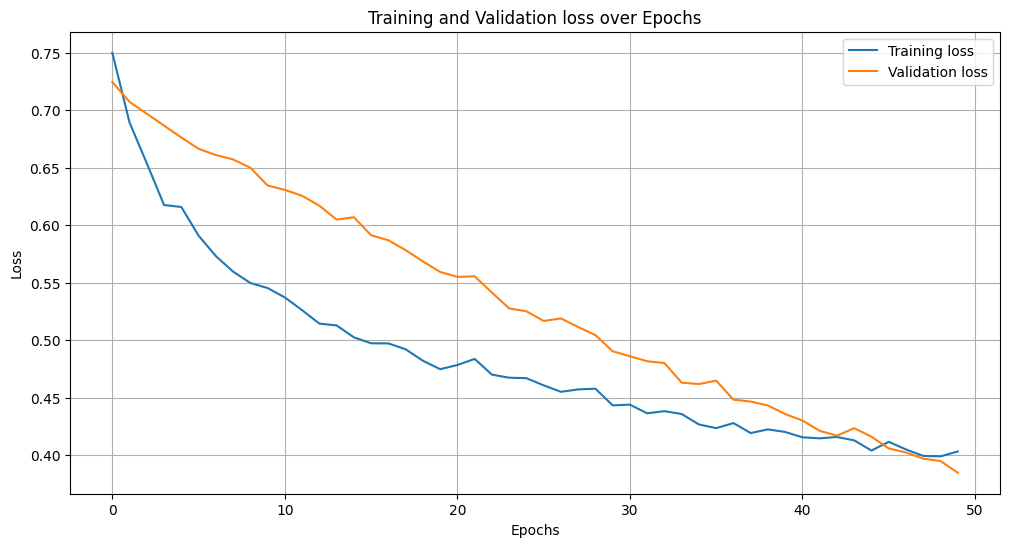

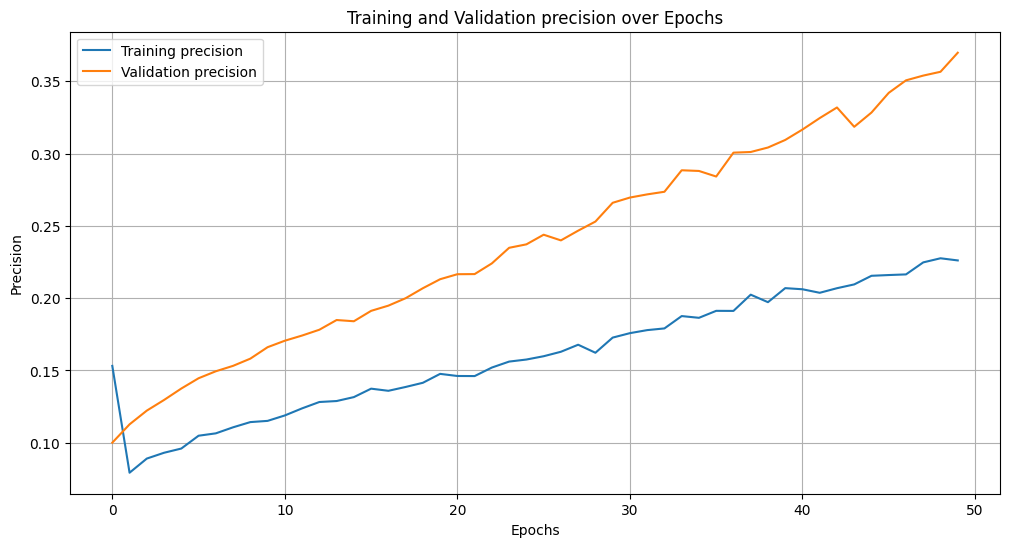

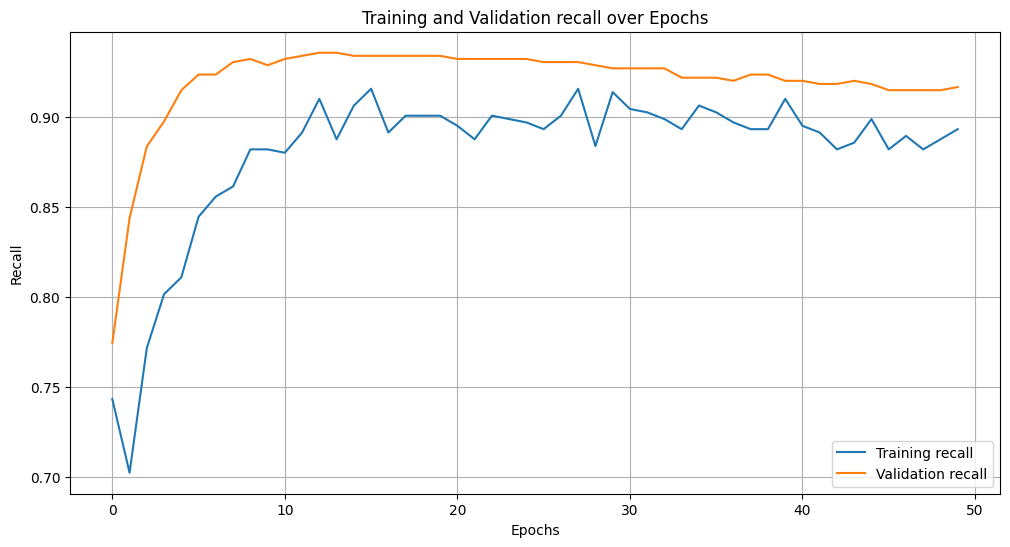

In [101]:
plot_training_history(history,'loss')
plot_training_history(history,'precision')
plot_training_history(history,'recall')

In [102]:
output = model_performance(model13, X_test, y_test)
print(output)
output_1 = model_performance(model13, X_train, y_train)
print(output_1)

156/156 [==============================] - 0s 1ms/step
   Accuracy    Recall  Precision  F1 Score
0  0.906394  0.906394   0.956138  0.923622
312/312 [==============================] - 0s 1ms/step
   Accuracy    Recall  Precision  F1 Score
0  0.906231  0.906231   0.959188  0.924512


In [103]:
results.loc[13] = ['2','80,160','relu,relu',epochs,batch_size,'yes','he/glorot/randnorm','0.3',"Adam_LR(le-5)/L1,L2",end-start,history.history['loss'][-1],history.history['val_loss'][-1],
history.history['precision'][-1],history.history['val_precision'][-1],history.history['recall'][-1],history.history['val_recall'][-1]
                   ,output['Precision'][0],output['Recall'][0]]

results

hidden_layers neurons_HL activation_ftn_HL  epochs  batch_size Batch_Norm  \
0              -          -                 -      10        9982          -   
1              -          -                 -      25        9982          -   
2              -          -                 -      50        9982          -   
3              -          -                 -      25          32          -   
4              1         80              relu      25          32          -   
5              2     80,160         relu,relu      25          32          -   
6              2     80,160         relu,relu      25          32          -   
7              2     80,160         relu,relu      25          32          -   
8              2     80,160         relu,relu      25          32          -   
9              2     80,160         relu,relu      25          32        yes   
10             2     80,160         relu,relu      25          32        yes   
11             2     80,160         relu,relu      25          32        yes   
12             2     80,160         relu,relu      25          32        yes   
13             2     80,160         relu,relu      50          32        yes   

            Weight_Ini dropout               optimizer  time(secs)  \
0                    -       -                     SGD    1.234703   
1                    -       -            SGD_LR(0.01)    3.018212   
2                    -       -            SGD-LR(0.01)    2.985321   
3                    -       -            SGD-LR(0.01)   27.868973   
4                    -       -            SGD_LR(0.01)   41.567311   
5                    -       -            SGD_LR(0.01)   41.894305   
6                    -       -           Adam_LR(0.01)   42.051322   
7                    -       -           Adam_LR(le-5)   31.487571   
8                    -     0.3           Adam_LR(le-5)   42.194058   
9                    -     0.3           Adam_LR(le-5)   42.708833   
10  he/glorot/randnorm     0.3           Adam_LR(le-5)   37.227174   
11  he/glorot/randnorm     0.3     Adam_LR(le-5)/L1,L2   42.635221   
12  he/glorot/randnorm     0.3  Adagrad_LR(0.01)/L1,L2   37.517705   
13  he/glorot/randnorm     0.3     Adam_LR(le-5)/L1,L2   83.503170   

    Train_loss  Validation_loss  Train_Precision  Validation_Precision  \
0     2.031547         1.695963         0.054343              0.056860   
1     0.425082         0.430649         0.402844              0.445483   
2     0.434529         0.493189         0.566038              0.598456   
3     2.379025         2.360701         0.022727              0.023452   
4     0.193805         0.144769         0.608861              0.707650   
5     0.139635         0.115674         0.714076              0.767407   
6     0.145135         0.133539         0.785032              0.840266   
7     0.322984         0.313230         0.305324              0.337232   
8     0.425188         0.440071         0.187967              0.218922   
9     0.450809         0.401692         0.145643              0.270876   
10    0.436856         0.494443         0.144936              0.217604   
11    0.467466         0.559652         0.150646              0.213456   
12    0.256188         0.150753         0.528302              0.829618   
13    0.403283         0.384788         0.226066              0.369748   

    Train_Recall  Validation_Recall  Test_Precision  Test_Recall  
0       0.219101           0.189236        0.890782     0.764682  
1       0.318352           0.248264        0.928051     0.940469  
2       0.280899           0.269097        0.942613     0.951694  
3       0.046816           0.043403        0.888372     0.844257  
4       0.900749           0.899306        0.973761     0.970134  
5       0.911985           0.899306        0.978480     0.977551  
6       0.923221           0.876736        0.982125     0.981760  
7       0.891386           0.901042        0.953981     0.898577  
8       0.848315           0.895833  

#### Actionable Insights & Buisiness Recommendations


***Actionable Insights:***

1. The model with best performance was Model13 with Recall metrics of importance as follows,

**Testing** - Recall -  0.906394

**Training** - Recall - 0.906231

2. Configuration used for Model13 is as follows,

*   Two Hidden layer - ReLu activation function - 80 nodes, 160 nodes, Output layer - Sigmoid Activaion Function
*   Adam Optimizer - learning_rate = 1e-5
*   Loss function - Binary Cross entropy
*   Epochs - 50 / Batch size - 32
*   Class weights taken into account
*   Drop out - 0.3 / Batch Normalization added
*   Weight Initialization done - He (HL1), Glorot (HL2), RandomNormal (Output)
*   Regularization - L1 and L2

3. Started working with shallow Networks and then worked my way by increasing the epochs first and then batch size. Increasing the epoch got the smoothness to the metrics curve.

4. Adam Optimizer proved to be a better choice compared to standard SGD and Adagrad. Adam with a slower learning rate worked better.

5. Other techniques like Batch normalization, dropout of 30%, various weight initialization and L1,L2 regularization techniques helped a lot in improving and smoothening the gap between the Training and Testing Metrics.


***Buisiness Recommendations:***

1. Features V7,V11,V15,V16,V21,V28,V34 have the most impact on determining whether a windmill will fail or not.¶
2. The company should focus on improving the important features so they can reduce the number of failures and the amount of money spent on repairs and replacements.